## <font color=brown> Problem Statement </font>
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## <font color=brown> Data Understanding </font>

In [1]:
# Importing neccessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the Dataset
telecom = pd.read_csv('/Users/shweta/Downloads/telecom_churn_data.csv')


In [3]:
# Checking dataframe head
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
# Checking dataframe shape
telecom.shape

(99999, 226)

In [5]:
# Setting maximum visible columns to 300 
pd.set_option("display.max_columns", 300)

In [6]:
# Checking dataframe info and datatypes 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
pd.set_option("display.max_columns", 300)
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
# Checking dataframe statistics 
pd.set_option("display.max_columns", 300)
telecom.describe(include = 'all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

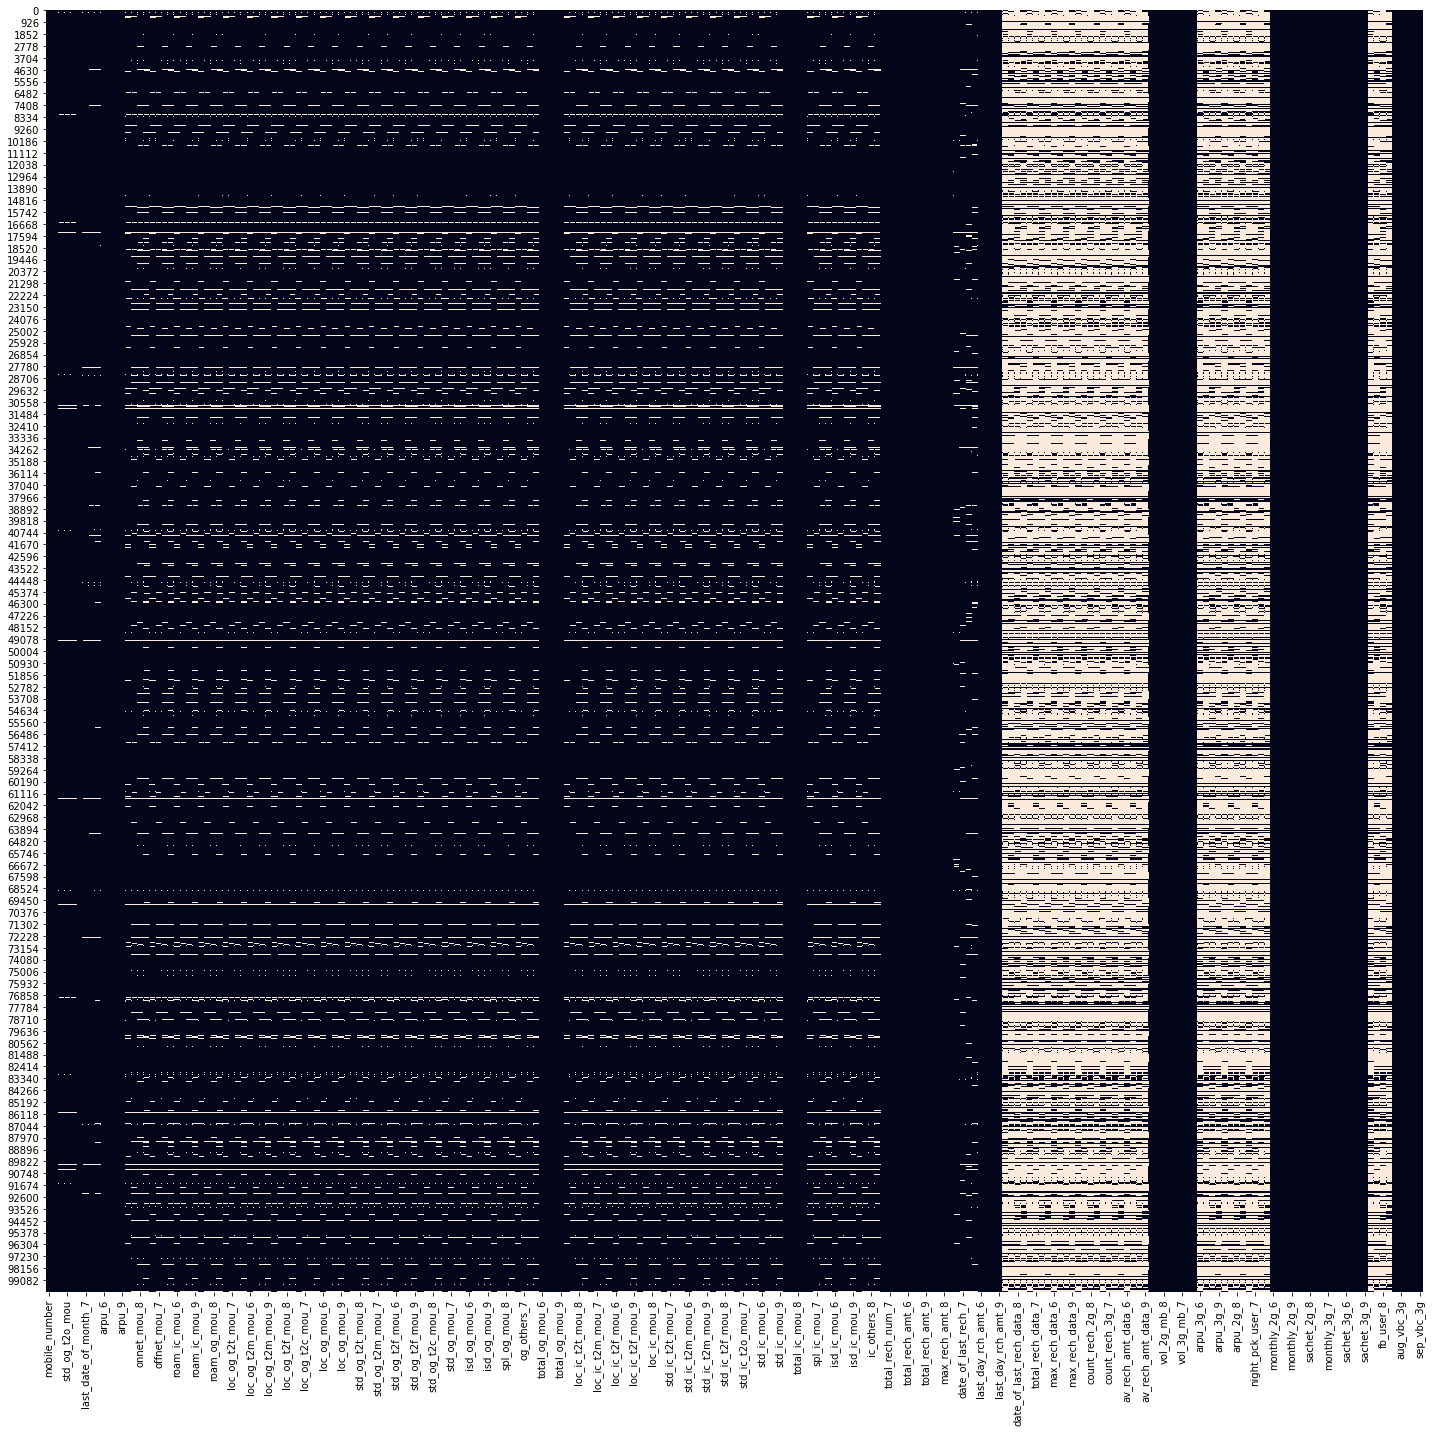

In [9]:
# Checking null values 
pd.set_option("display.max_columns", 300)
plt.figure(figsize=(20,20))
sns.heatmap(telecom.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [10]:
# Checking percentage of missing values in each column 
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [11]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

## <font color=brown> Data Cleaning </font>

In [12]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)

telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero)

print('----------------------------------------')

telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one)

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
----------------------------------------
Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_6    1
last_date_of_month_8    1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
loc_og_t2o_mou          1
circle_id               1
last_date_of_month_7    1
std_og_t2c_mou_6        1
last_date_of_month_9    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
dtype: int64


#### Dropping the columns with low variance 

In [13]:
col = ['last_date_of_month_6','last_date_of_month_8','loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','circle_id','last_date_of_month_7','std_og_t2c_mou_6','last_date_of_month_9','std_ic_t2o_mou_7','std_og_t2c_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_og_t2c_mou_9','std_og_t2c_mou_8','std_ic_t2o_mou_6']

In [14]:
telecom.drop(col, axis=1, inplace = True)

In [15]:
telecom.shape

(99999, 210)

In [16]:
pd.set_option("display.max_columns", 300)
telecom.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

#### Missing value imputation

In [17]:
pd.set_option("display.max_columns", 300)
telecom.describe(include = 'all')

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count    9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
unique            NaN           NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN           NaN   
mean     7.001207e+09    282.987358    278.536648    279.154731    261.645069   
std      6.956694e+05    328.439770    338.156291    344.474791    341.998630   
min      7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%      7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%      7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%      7.001812e+09    371.060000    365.344500    369.370500    353.466500   
max      7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count   96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      132.395875    133.670805    133.018098    130.302327    197.935577   
std       297.207406    308.794148    308.951589    308.477668    316.851613   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.380000      6.660000      6.460000      5.330000     34.730000   
50%        34.310000     32.330000     32.360000     29.840000     96.310000   
75%       118.740000    115.595000    115.860000    112.130000    231.860000   
max      7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

        offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
count   96140.000000  94621.000000  92254.000000   96062.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean      197.045133    196.574803    190.337222       9.950013   
std       325.862803    327.170662    319.396092      72.825411   
min         0.000000      0.000000      0.000000       0.000000   
25%        32.190000     31.630000     27.130000       0.000000   
50%        91.735000     92.140000     87.290000       0.000000   
75%       226.815000    228.260000    220.505000       0.000000   
max      9667.130000  14007.340000  10310.760000   13724.380000   

        roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
count    96140.000000   94621.000000   92254.000000   96062.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.149898       7.292981       6.343841      13.911337   
std         73.447948      68.402466      57.137537      71.443196   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max      15371.040000   13095.360000    8464.030000    3775.110000   

        roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
count    96140.000000   94621.000000   92254.000000      96062.000000   
unique            NaN            NaN            NaN               NaN   
top               NaN            NaN            NaN               NaN   
freq              NaN            NaN            NaN               NaN   
mean         9.818732       9.971890       8.555519         47.

The columns total_rech_data_* have minimum value of 1 and columns av_rech_amt_data_* has minimum value of 0.5

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

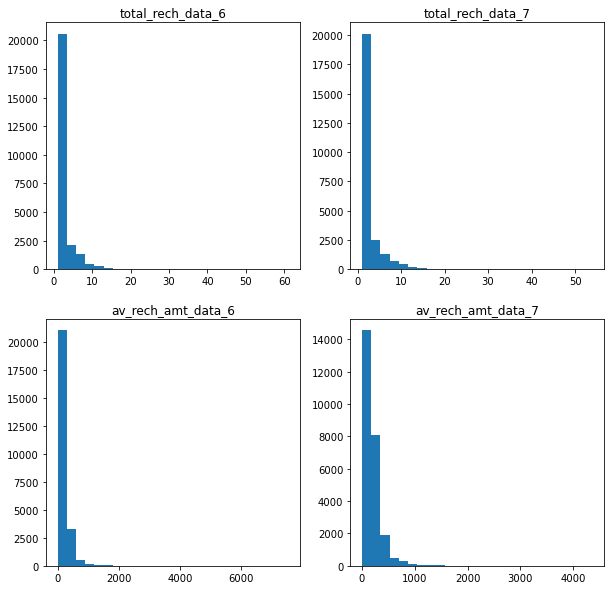

In [18]:
# Let us look at the distribution to find out the value to fill total_rech_data_6, total_rech_data_7
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# Let us look at the distribution to find out the value to fill av_rech_amt_data_6 and av_rech_amt_data_7
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

1. We can observe from the statistics of the dataframe and above graphs that minimum value for total_rech_data_* is 1 and for av_rech_amt_data_* is 0.5 <br>
2. Rows with missing values also have the 'dates of recharge' columns missing which indicates that no recharge was done in this month.<br>
3. Hence, we decide to impute missing values with 0 for these columns.

In [19]:
# Imputing missing values with 0 for total_rech_data_* and av_rech_amt_data_* columns 
telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [20]:
# Check if missing values are replaced with zero for total_rech_data_* and av_rech_amt_data_* columns
null = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
null[null >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7     

We can observe that missing values are replaced with zero for total_rech_data_* and av_rech_amt_data_* columns as they are not present in the above results.

In [21]:
telecom.shape

(99999, 210)

#### Derive new features 

In [22]:
# Derive new Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

In [23]:
telecom.shape

(99999, 214)

In [24]:
# Drop total_rech_data_* and av_rech_amt_data_* and only keep the derived columns 

drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom.drop(drop_data_columns, axis=1, inplace=True)

In [25]:
telecom.shape

(99999, 206)

### Filtering High Value Customers (HVC)

In [26]:
# Filter high-value customers

avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0

amt_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amt_70_pc)

hvc = telecom[avg_rech_amt_6_7 >= amt_70_pc]
print('Dataframe Shape: ', hvc.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 206)


In [27]:
hvc

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0         7000842753   197.385   214.816   213.803   21.100          NaN   
7         7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8         7001524846   378.721   492.223   137.362  166.787       413.69   
21        7002124215   514.453   597.753   637.760  578.596       102.41   
23        7000887461    74.350   193.897   366.966  811.480        48.96   
...              ...       ...       ...       ...      ...          ...   
99981     7000630859   384.316   255.405   393.474   94.080        78.68   
99984     7000661676   328.594   202.966   118.707  324.143       423.99   
99986     7001729035   644.973   455.228   564.334  267.451       806.73   
99988     7002111859   312.558   512.932   402.080  533.502       199.89   
99997     7000498689   322.991   303.386   606.817  731.010         0.00   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0              NaN         0.00          NaN           NaN           NaN   
7            54.68        52.29          NaN        453.43        567.16   
8           351.03        35.08        33.46         94.66         80.63   
21          132.11        85.14       161.63        757.93        896.68   
23           50.66        33.58        15.74         85.41         89.36   
...            ...          ...          ...           ...           ...   
99981        29.04       103.24        34.38         56.13         28.09   
99984       181.83         5.71         5.03         39.51         39.81   
99986       549.36       775.41       692.63        784.76        617.13   
99988       174.46         2.46         7.16        175.88        277.01   
99997         0.00         0.00         0.00          0.00          0.00   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00           NaN            NaN            NaN   
7            325.91           NaN          16.23          33.49   
8            136.48        108.71           0.00           0.00   
21           983.39        869.89           0.00           0.00   
23           205.89        111.88           0.00           0.00   
...             ...           ...            ...            ...   
99981         61.44         29.83           0.00           0.00   
99984         18.26          9.41           0.00           0.00   
99986        595.44        378.93           0.00           0.00   
99988        248.33        217.44           0.00           0.00   
99997          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00            NaN            NaN            NaN   
7              31.64            NaN          23.74          12.59   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00          63.96           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0               0.00            NaN               NaN               NaN   
7              38.06            NaN             51.39             31.38   
8               0.00           0.00            297.13            217.59   
21              0.00           0.00              4.48              6.16   
23              0.00           0.00             48.96             50.66   
...              ...            ...               ...               ...   
99981           0.00  

We have finally got the dataframe with High value customers with 30001 records and 206 features.

In [28]:
hvc.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'total_rech_data_amt_9'],
      dtype='object', length=206)

In [29]:
hvc.shape

(30001, 206)

In [30]:
# Checking columns with object datatype (Categorical columns)
cat_col = hvc.loc[:, hvc.dtypes == 'object']
cat_col.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [31]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 206 entries, mobile_number to total_rech_data_amt_9
dtypes: float64(164), int64(34), object(8)
memory usage: 47.4+ MB


### Identify and Tag Churners 

In [32]:
# Identify Churn
X = hvc["total_ic_mou_9"] + hvc["total_og_mou_9"] + hvc["vol_2g_mb_9"] + hvc["vol_3g_mb_9"]
hvc["churn"] = np.where(X, 0, 1)
hvc["churn"].head(10)

0     1
7     1
8     0
21    0
23    0
33    0
38    0
41    0
48    0
53    0
Name: churn, dtype: int64

In [33]:
hvc.shape

(30001, 207)

In [34]:
list(hvc)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [35]:
# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(hvc) if hdr.endswith("_9")]
hvc.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', hvc.shape)

Number of columns droped here  =  50
Dataframe Shape:  (30001, 157)


In [36]:
# Checking null values again
pd.set_option("display.max_rows", 300)
round(100*(hvc.isnull().sum()/len(hvc.index)), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7  

#### Derive new features 

In [37]:
cat = hvc.loc[:, hvc.dtypes == 'object']
cat.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [38]:
columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']

In [39]:
# Changing the format from object to date-time type
hvc[columns]=hvc[columns].apply(lambda x:pd.to_datetime(x))   

In [40]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 157 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(124), int64(27)
memory usage: 36.2 MB


In [41]:
# Create new days columns, instead of date for date_of_last_rech_* columns 
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

hvc["rech_days_left_6"]      = (last_date_of_month_6 - hvc.date_of_last_rech_6).astype('timedelta64[D]')
hvc["rech_days_left_7"]      = (last_date_of_month_7 - hvc.date_of_last_rech_7).astype('timedelta64[D]')
hvc["rech_days_left_8"]      = (last_date_of_month_8 - hvc.date_of_last_rech_8).astype('timedelta64[D]')

In [42]:
hvc.shape

(30001, 160)

In [43]:
# Create new days columns, instead of date for date_of_last_rech_data_* columns
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

hvc["rech_days_left_data_6"]      = (last_date_of_month_6 - hvc.date_of_last_rech_data_6).astype('timedelta64[D]')
hvc["rech_days_left_data_7"]      = (last_date_of_month_7 - hvc.date_of_last_rech_data_7).astype('timedelta64[D]')
hvc["rech_days_left_data_8"]      = (last_date_of_month_8 - hvc.date_of_last_rech_data_8).astype('timedelta64[D]')

In [44]:
hvc.shape

(30001, 163)

In [45]:
col_drop = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']

In [46]:
hvc.drop(col_drop, axis=1, inplace=True)

In [47]:
hvc.shape

(30001, 157)

In [48]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 157 entries, mobile_number to rech_days_left_data_8
dtypes: float64(130), int64(27)
memory usage: 36.2 MB


In [49]:
# Checking dataframe statistics 
hvc.describe(include='all')

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  29456.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    265.618262   
std     6.908784e+05    460.640461    479.776947    501.961981    462.493645   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     19.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     88.060000   
75%     7.001804e+09    699.943000    698.315000    661.491000    297.415000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean     272.700470    243.646938    380.608111    384.994337    348.723294   
std      482.972367    465.200856    484.257474    500.807874    486.918550   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.155000     14.255000     78.575000     76.040000     58.670000   
50%       86.885000     72.930000    229.635000    227.120000    197.590000   
75%      298.087500    255.025000    494.780000    500.365000    455.385000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29456.000000   29464.000000   28827.000000   29456.000000   
mean       16.408431      12.872921      13.009645      27.063178   
std        76.973057      76.454034      75.575865     117.218920   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29464.000000   28827.000000      29456.000000      29464.000000   
mean       20.519370      20.674656         86.047905         87.235755   
std        96.933381     106.751862        230.609510        242.427257   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.030000          5.280000   
50%         0.000000       0.000000         25.580000         25.780000   
75%         0.000000       0.000000         79.765000         80.282500   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28827.000000      29456.000000      29464.000000      28827.000000   
mean          81.256858        166.263652        165.980922        157.937216   
std          231.399901        251.423301        242.754684        236.315181   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.830000         21.137500         22.910000         17.530000   
50%           23.240000         80.240000         81.685000         74.540000   
75%           76.040000        212.417500        211.745000        205.860000   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      29456.000000      29464.000000      28827.000000      29456.000000   
mean           6.461494          6.540759          6.126112          1.604247   
std           22.310305         22.125961         19.858510          6.357757   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.110000          0.210000          0.000000 

#### Drop few columns with missing values more than 44%


In [50]:
pd.set_option("display.max_rows", 300)
round(100*(hvc.isnull().sum()/len(hvc.index)), 2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
onnet_mou_6               1.82
onnet_mou_7               1.79
onnet_mou_8               3.91
offnet_mou_6              1.82
offnet_mou_7              1.79
offnet_mou_8              3.91
roam_ic_mou_6             1.82
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_og_mou_6             1.82
roam_og_mou_7             1.79
roam_og_mou_8             3.91
loc_og_t2t_mou_6          1.82
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2m_mou_6          1.82
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2f_mou_6          1.82
loc_og_t2f_mou_7          1.79
loc_og_t2f_mou_8          3.91
loc_og_t2c_mou_6          1.82
loc_og_t2c_mou_7          1.79
loc_og_t2c_mou_8          3.91
loc_og_mou_6              1.82
loc_og_mou_7              1.79
loc_og_mou_8              3.91
std_og_t2t_mou_6          1.82
std_og_t

In [51]:
drop_col = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [52]:
hvc.drop(drop_col, axis=1, inplace=True)

In [53]:
hvc.shape

(30001, 136)

In [54]:
pd.set_option("display.max_rows", 300)
round(100*(hvc.isnull().sum()/len(hvc.index)), 2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
onnet_mou_6               1.82
onnet_mou_7               1.79
onnet_mou_8               3.91
offnet_mou_6              1.82
offnet_mou_7              1.79
offnet_mou_8              3.91
roam_ic_mou_6             1.82
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_og_mou_6             1.82
roam_og_mou_7             1.79
roam_og_mou_8             3.91
loc_og_t2t_mou_6          1.82
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2m_mou_6          1.82
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2f_mou_6          1.82
loc_og_t2f_mou_7          1.79
loc_og_t2f_mou_8          3.91
loc_og_t2c_mou_6          1.82
loc_og_t2c_mou_7          1.79
loc_og_t2c_mou_8          3.91
loc_og_mou_6              1.82
loc_og_mou_7              1.79
loc_og_mou_8              3.91
std_og_t2t_mou_6          1.82
std_og_t

#### Imputing remaining missing values with median 

In [55]:
# Imputing missing with median
missing_cols = hvc.columns[hvc.isnull().sum()>0]
for col in missing_cols:
    hvc[col].fillna((hvc[col].median()), inplace=True)

In [56]:
pd.set_option("display.max_rows", 300)
round(100*(hvc.isnull().sum()/len(hvc.index)), 2)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou

In [57]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 136 entries, mobile_number to rech_days_left_data_8
dtypes: float64(109), int64(27)
memory usage: 31.4 MB


#### Plot correlation matrix

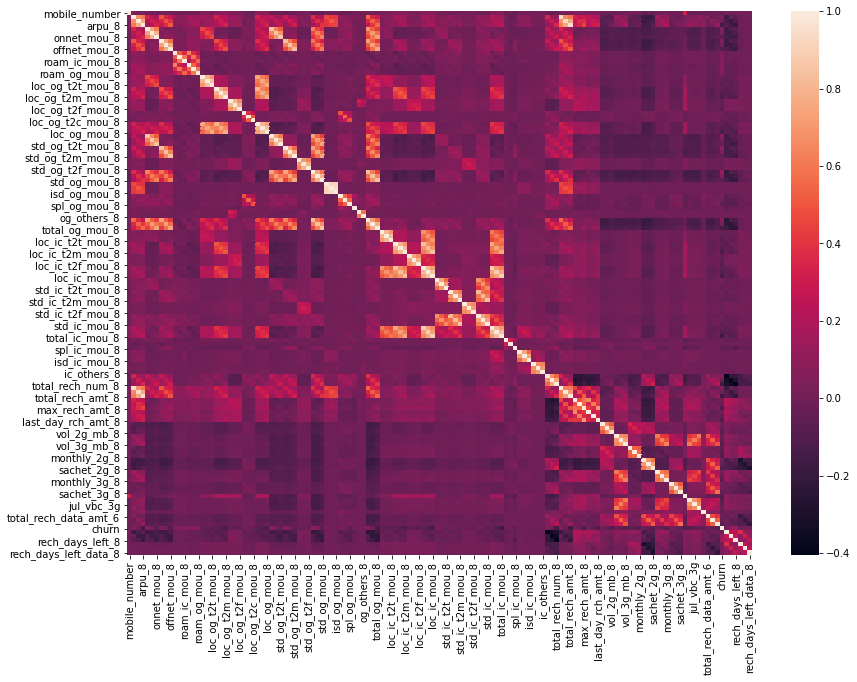

In [58]:
# Visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(hvc.corr())
plt.show()

In [59]:
# Observing pairs with high correlation
hvc.corr().unstack().sort_values(ascending=False).drop_duplicates().head(20)

rech_days_left_data_8  rech_days_left_data_8    1.000000
arpu_8                 total_rech_amt_8         0.955351
total_rech_amt_6       arpu_6                   0.946125
arpu_7                 total_rech_amt_7         0.943588
isd_og_mou_7           isd_og_mou_8             0.943120
isd_og_mou_8           isd_og_mou_6             0.918187
isd_og_mou_6           isd_og_mou_7             0.915247
loc_ic_mou_6           total_ic_mou_6           0.893839
loc_ic_mou_8           total_ic_mou_8           0.890640
loc_ic_mou_7           total_ic_mou_7           0.881717
std_og_t2t_mou_8       onnet_mou_8              0.860668
onnet_mou_7            std_og_t2t_mou_7         0.860299
onnet_mou_6            std_og_t2t_mou_6         0.859392
std_og_t2m_mou_7       offnet_mou_7             0.854824
std_og_t2m_mou_8       offnet_mou_8             0.851756
total_og_mou_8         std_og_mou_8             0.850509
total_og_mou_7         std_og_mou_7             0.849098
loc_ic_t2m_mou_8       loc_ic_m

We can observe that few pairs have more than 85% of correlation. Hence we can drop few features and reduce multicollinearity in our Dataset.

#### Drop highly collinear features 

In [60]:
multicol_col = ['arpu_8','arpu_6','arpu_7','isd_og_mou_6','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','onnet_mou_8','onnet_mou_7','onnet_mou_6','offnet_mou_7','offnet_mou_8']

In [61]:
hvc.drop(multicol_col, axis=1, inplace=True)

In [62]:
hvc.shape

(30001, 124)

#### Features Selection Using Information Gain/Mutual Information 

In [63]:
X = hvc.drop(['churn'], axis=1)
X.head()

mobile_number  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      7000842753       229.635           0.00           0.00           0.00   
7      7000701601       453.430          16.23          33.49          31.64   
8      7001524846        94.660           0.00           0.00           0.00   
21     7002124215       757.930           0.00           0.00           0.00   
23     7000887461        85.410           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00             25.58   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              25.78              0.00             80.24            81.685   
7              31.38             40.28            308.63           447.380   
8             217.59             12.49             80.96            70.580   
21              6.16             23.34             91.81            87.930   
23             50.66             33.58             82.94            83.010   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.11              0.21              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00        129.35   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0         50.035          0.00          0.00          0.00          0.31   
7         75.140         77.84          0.18         10.01          4.50   
8        143.480         98.28          0.00          0.00          0.00   
21       934.690        938.79          0.00          0.00          0.00   
23        

In [64]:
X.shape

(30001, 123)

In [65]:
Y = hvc['churn']
Y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [66]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X,Y)
mutual_info

array([8.44879336e-04, 6.69014559e-03, 8.27254279e-04, 8.43960491e-03,
       1.31703667e-02, 4.53977433e-03, 8.47725507e-03, 1.40208779e-02,
       5.57404596e-03, 1.67488760e-02, 6.72464144e-02, 5.07885304e-03,
       1.58279902e-02, 7.49619511e-02, 7.61697532e-03, 1.20412598e-02,
       2.22887611e-02, 0.00000000e+00, 1.36238957e-03, 5.16456313e-03,
       8.32430229e-03, 1.80346812e-02, 7.50683919e-02, 8.20731339e-03,
       8.64100213e-03, 4.61071944e-02, 8.18255292e-03, 8.75586116e-03,
       5.14308383e-02, 7.89300131e-04, 2.75815261e-03, 8.48318202e-03,
       9.07744933e-03, 1.02737915e-02, 5.34807285e-02, 0.00000000e+00,
       0.00000000e+00, 4.52321985e-03, 5.21040711e-03, 4.93130971e-02,
       4.88372886e-05, 2.37009577e-04, 1.25954483e-03, 7.62454176e-03,
       1.07305348e-02, 6.14198531e-02, 5.61980263e-03, 1.56991606e-02,
       7.69014175e-02, 5.71048746e-03, 2.11210318e-02, 8.43044156e-02,
       8.31389160e-03, 1.74080275e-02, 6.35770831e-02, 6.44024382e-03,
      

In [67]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

total_ic_mou_8           0.085741
loc_ic_t2m_mou_8         0.084304
loc_ic_t2t_mou_8         0.076901
loc_og_mou_8             0.075068
loc_og_t2m_mou_8         0.074962
loc_og_t2t_mou_8         0.067246
max_rech_amt_8           0.064092
loc_ic_t2f_mou_8         0.063577
total_rech_amt_8         0.063056
total_og_mou_8           0.061420
std_ic_mou_8             0.060178
std_og_mou_8             0.053481
std_ic_t2m_mou_8         0.051566
std_og_t2m_mou_8         0.051431
spl_og_mou_8             0.049313
std_ic_t2t_mou_8         0.048583
last_day_rch_amt_8       0.047755
std_og_t2t_mou_8         0.046107
total_rech_num_8         0.032836
rech_days_left_8         0.029294
total_rech_data_amt_8    0.027909
rech_days_left_data_8    0.026966
vol_2g_mb_8              0.023216
loc_og_t2f_mou_8         0.022289
loc_ic_t2m_mou_7         0.021121
loc_og_mou_7             0.018035
loc_ic_t2f_mou_7         0.017408
total_ic_mou_7           0.017297
loc_og_t2t_mou_7         0.016749
loc_og_t2m_mou

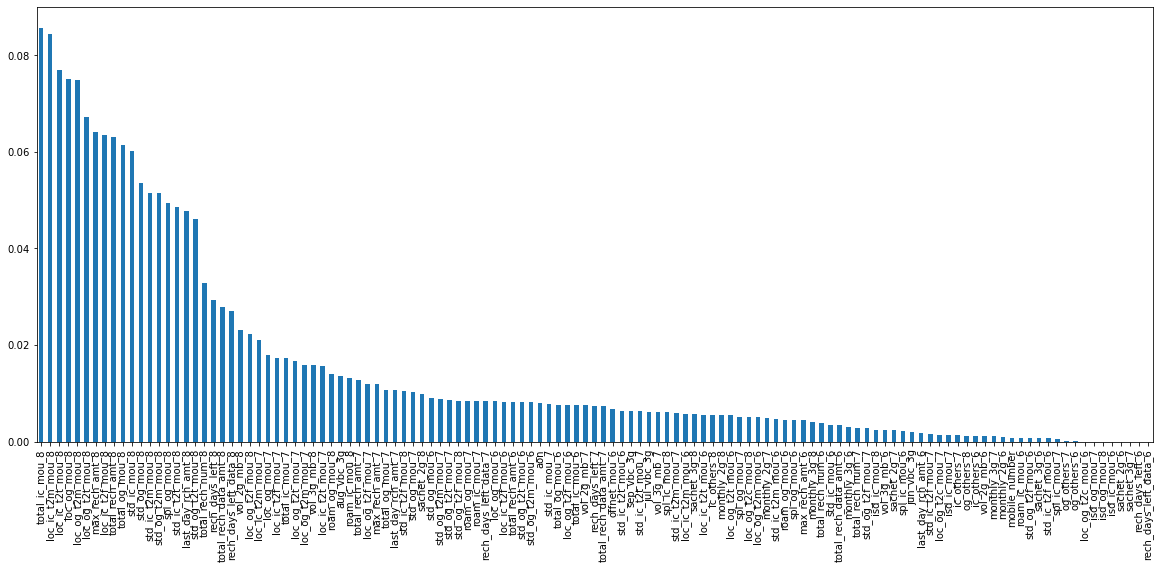

In [68]:
# Let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [69]:
from sklearn.feature_selection import SelectKBest

In [70]:
# We Will select the  top 100 important features out of 123 independent features present 
sel_100_cols = SelectKBest(mutual_info_classif, k=100)
sel_100_cols.fit(X,Y)
X.columns[sel_100_cols.get_support()]

Index(['offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', '

In [71]:
# We Will select the  top 30 important features for EDA 
sel_30_cols = SelectKBest(mutual_info_classif, k=30)
sel_30_cols.fit(X,Y)
X.columns[sel_30_cols.get_support()]

Index(['roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_data_amt_8', 'rech_days_left_8',
       'rech_days_left_data_8'],
      dtype='object')

In [72]:
# top_100 contains top 100 features along with target variable 'churn'
top_100 = ['offnet_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'rech_days_left_7',
       'rech_days_left_8', 'rech_days_left_data_7', 'rech_days_left_data_8', 'churn']


In [73]:
hvc_100 = hvc[top_100]

In [74]:
hvc_100.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0        229.635           0.00           0.00           0.00           0.00   
7        453.430          33.49          31.64          23.74          12.59   
8         94.660           0.00           0.00           0.00           0.00   
21       757.930           0.00           0.00           0.00           0.00   
23        85.410           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             25.58             25.78              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              80.24            81.685              0.00              0.11   
7             308.63           447.380            162.28             62.13   
8              80.96            70.580             50.54              0.00   
21             91.81            87.930            104.81              0.75   
23             82.94            83.010            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.21              0.00              0.00        129.35   
7              55.14             53.23              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              1.58              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         50.035          0.00          0.31          0.81          0.00   
7         75.140         77.84          4.50          0.00          6.50   
8        143.480         98.28          0.00          0.00         10.23   
21       934.690        938.79          0.00          0.00          0.00   
23         6.350         39.61          0.10          0.00         17.71   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0             0.00            0.00            0.00             26.03   
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
21          860.34         1028.79         1068.54              2.48   
23    

In [75]:
hvc_100.shape

(30001, 101)

## <font color=brown> Data Visualisation </font>

In [76]:
hvc_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 101 entries, offnet_mou_6 to churn
dtypes: float64(80), int64(21)
memory usage: 23.3 MB


In [77]:
# Top 30 important features obtained with Selecting Features Using Information Gain/Mutual Information.
top_30 = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'total_rech_data_amt_8', 'rech_days_left_8', 'rech_days_left_data_8']

### <font color=black> Univariate Analysis </font>

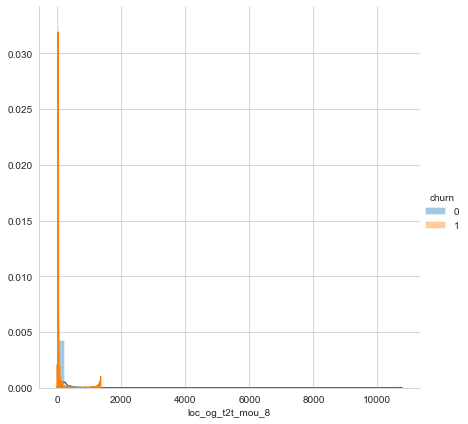

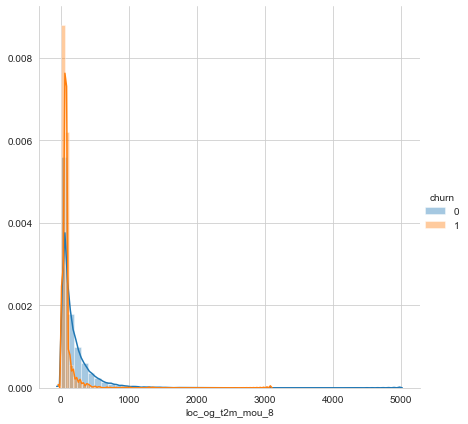

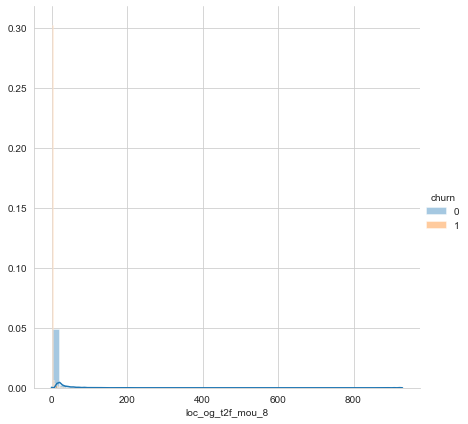

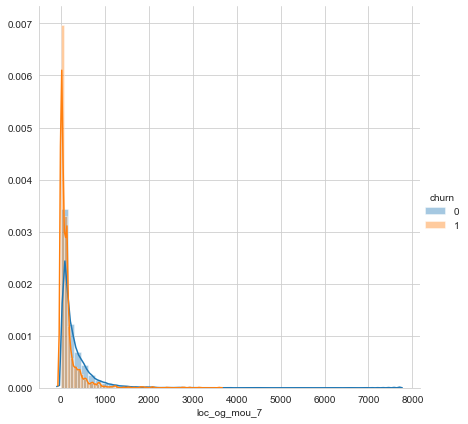

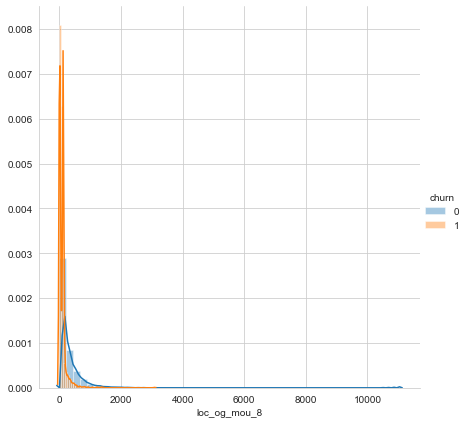

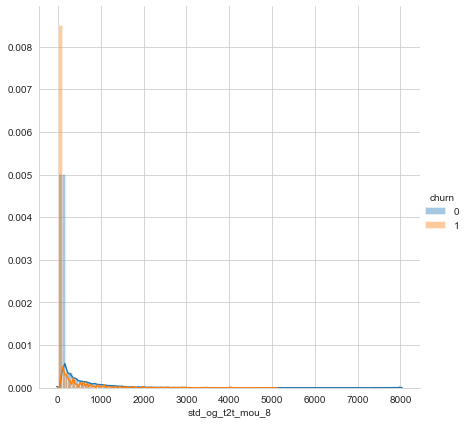

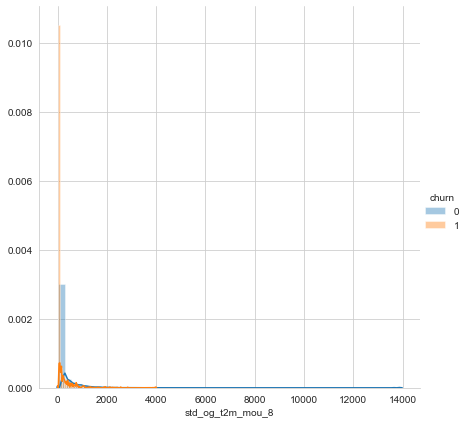

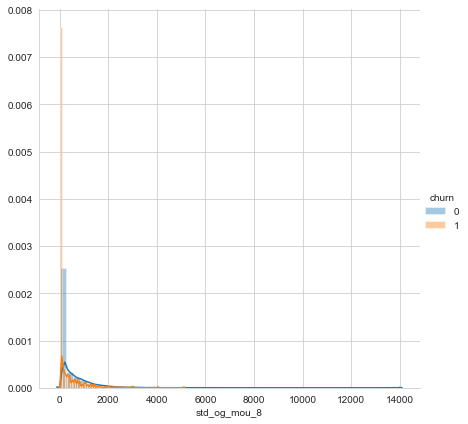

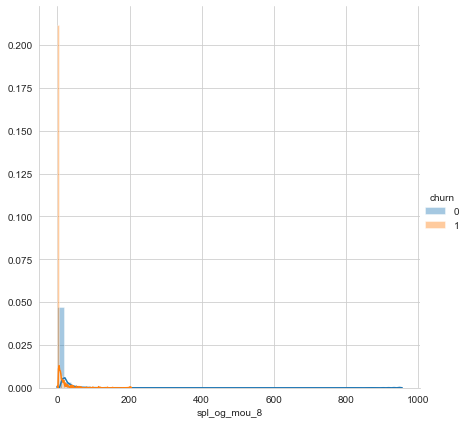

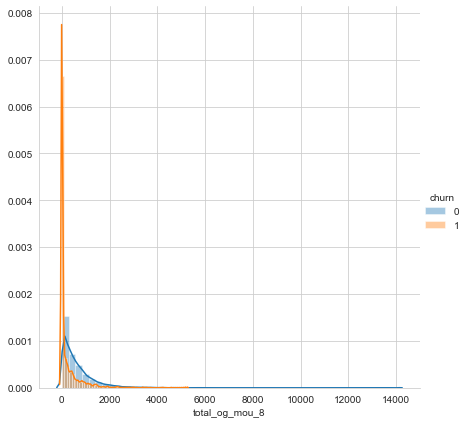

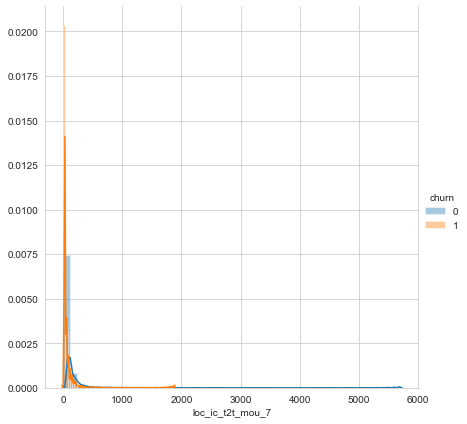

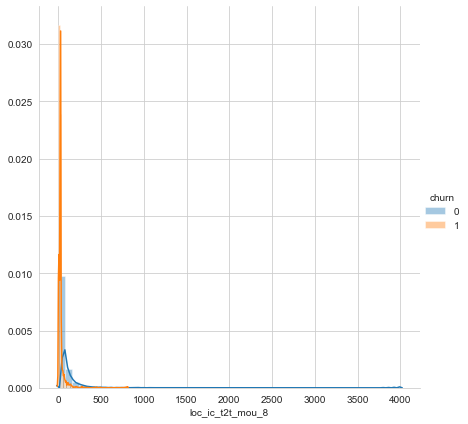

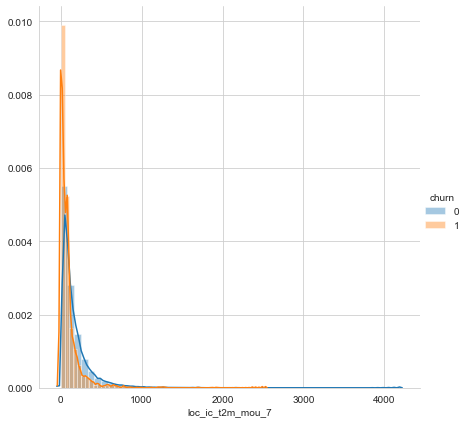

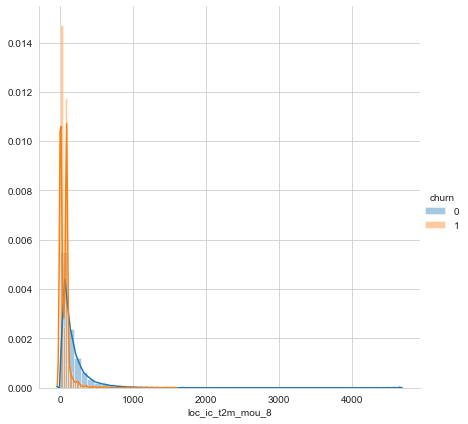

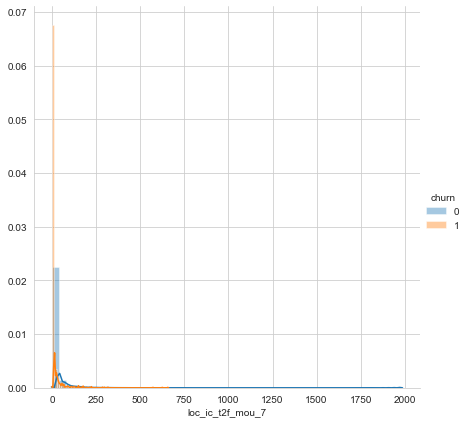

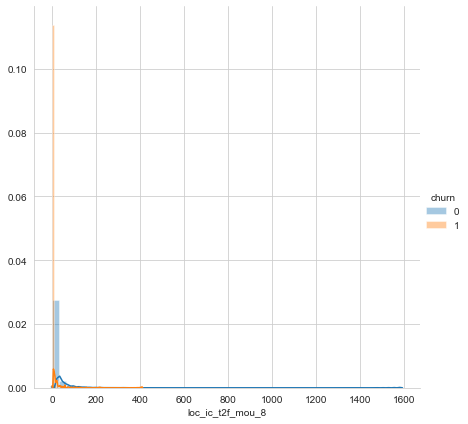

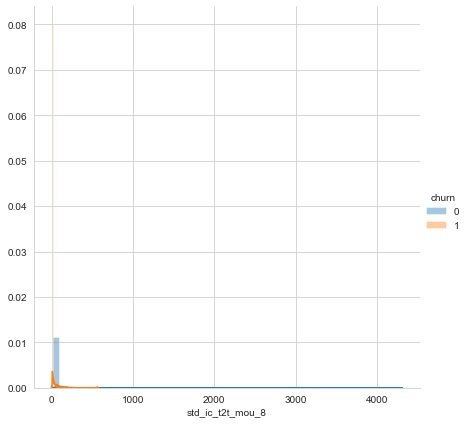

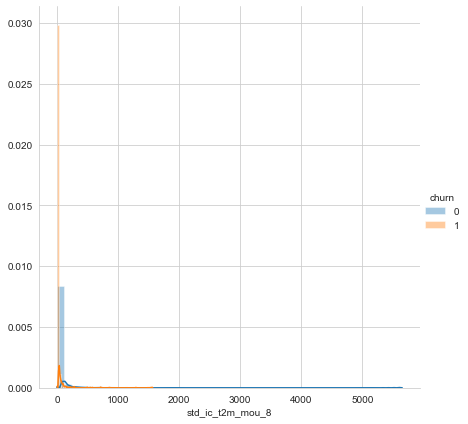

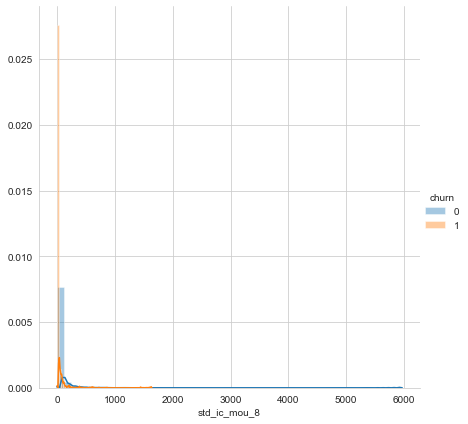

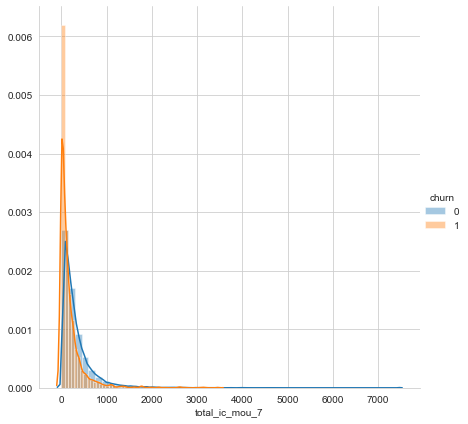

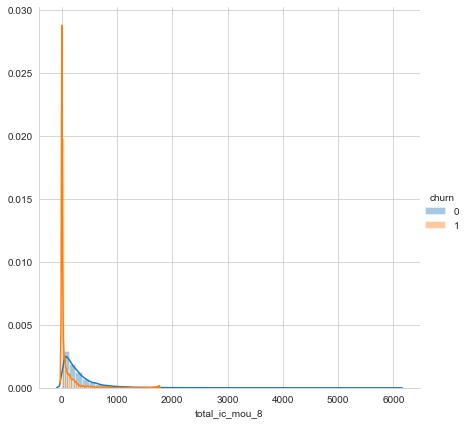

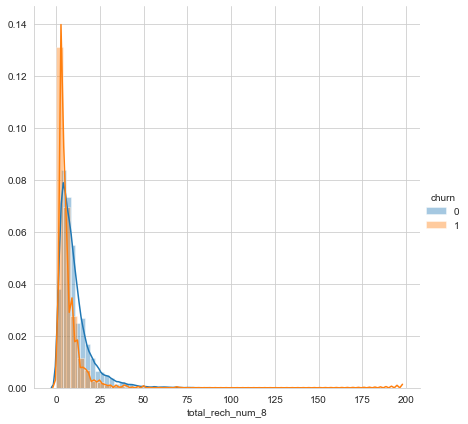

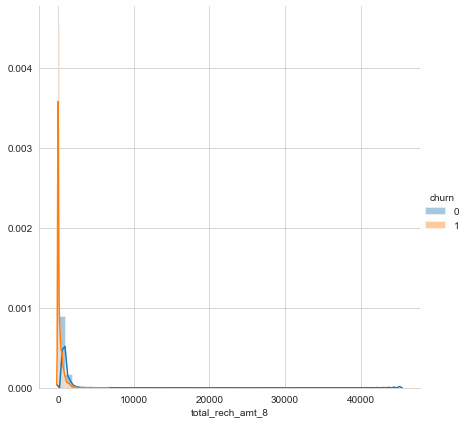

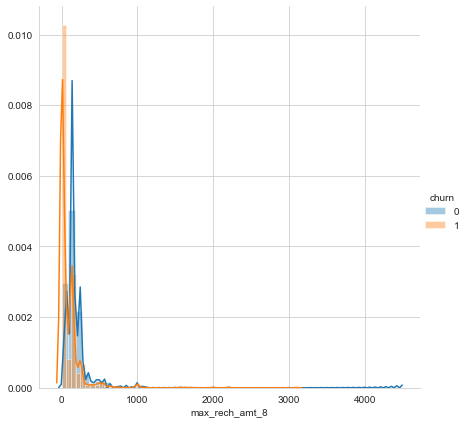

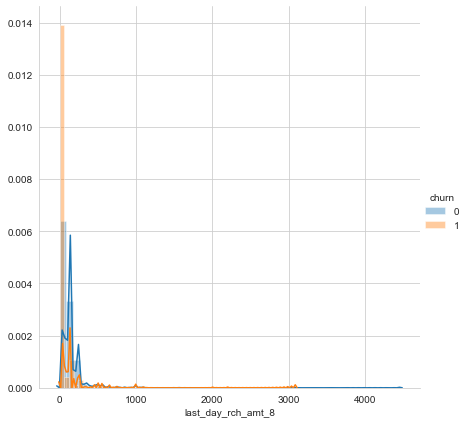

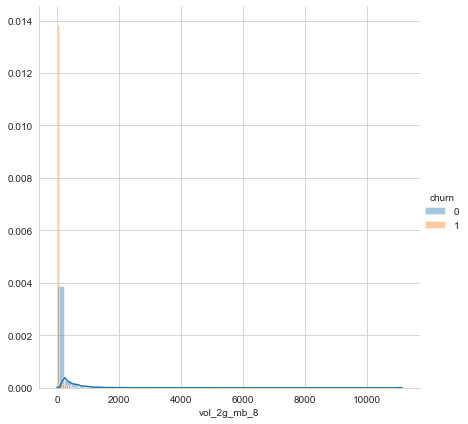

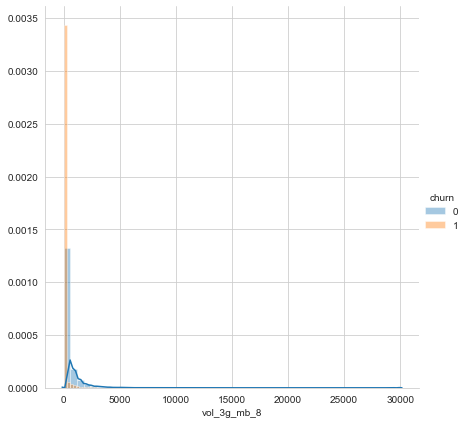

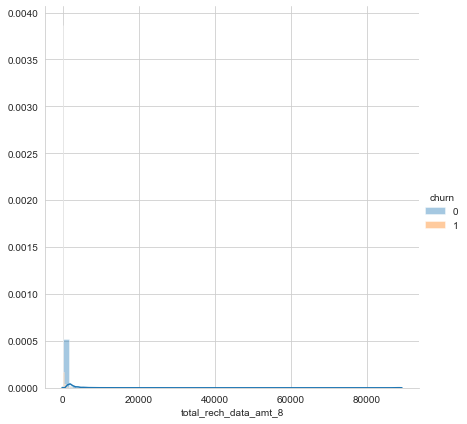

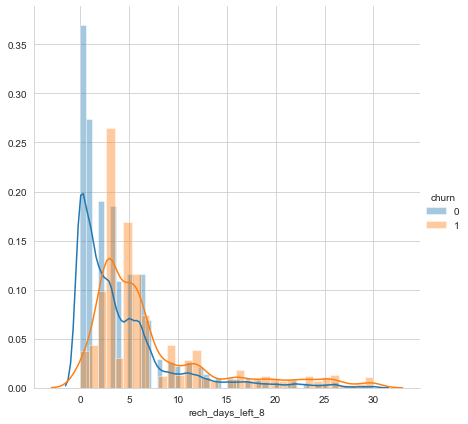

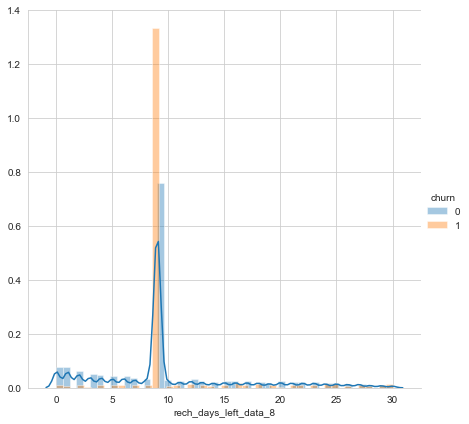

In [78]:
# Univariate analysis for top 30 features selected using Information Gain/Mutual Information.
for col in top_30:
    sns.set_style('whitegrid')
    sns.FacetGrid(hvc_100,hue='churn',size=6).map(sns.distplot,col).add_legend()
    plt.show()

### Observations for Univariate Analysis of top 30 important features <br>
1. As minutes of usage (mou) decreases, the user is most likely to churn.<br>
2. For the users who have done less total number of recharges is planning to switch to another operator services and hence is likely to churn.<br>
3. If total recharge amount, max reacharge amount, last day recharge amount is low for the user then we can say that they are likely to churn.<br>
4. Churn rate is more for the people using less 2g and 3g data services. We can monitor the recharge amount of the user for the data services and identify the churning possibility.<br>
5. People who have recharged recently are less prone to churn. Where as people who have recharged their services long ago and if there is no recent activity then they are more likely to churn. <br>
6. Interesting insights can be observed from the columns related to 8th month.<br> 


### <font color=black> Bivariate Analysis </font>

In [79]:
# With some domain expertise, choosing few distinct columns from Top30 features for performing Bivariate Analysis.
bi_ana = ['loc_og_t2t_mou_8', 'std_og_t2t_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8','std_ic_t2t_mou_8', 'total_ic_mou_8','total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8','total_rech_data_amt_8', 'rech_days_left_8', 'rech_days_left_data_8']

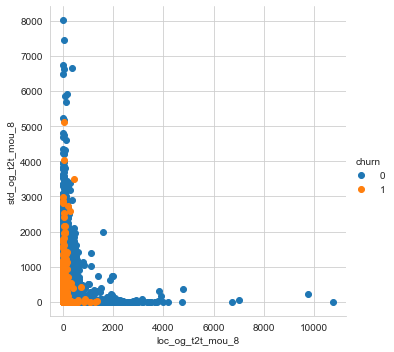

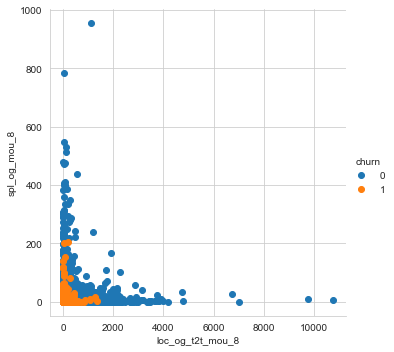

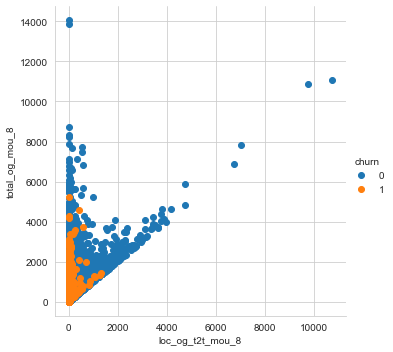

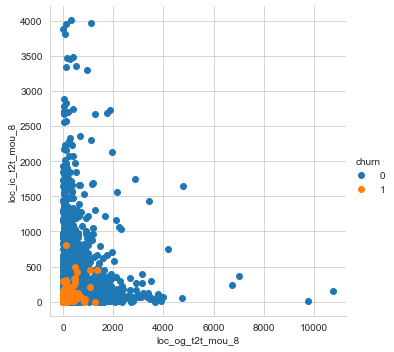

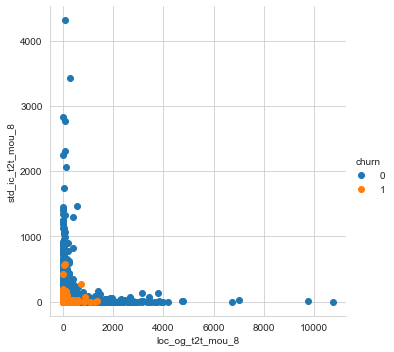

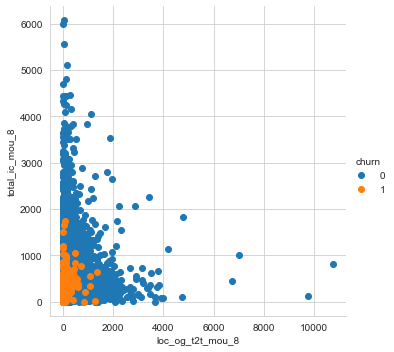

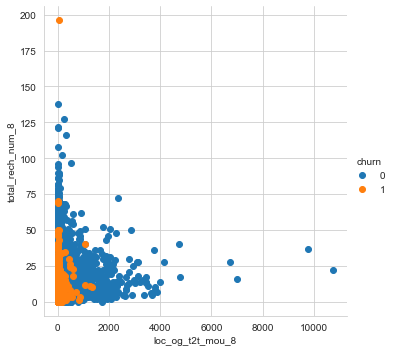

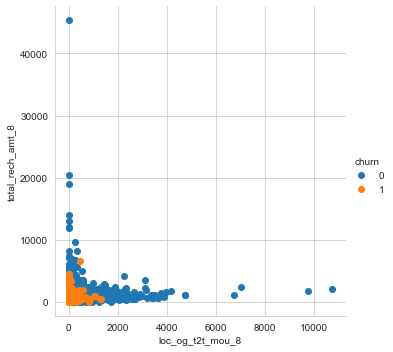

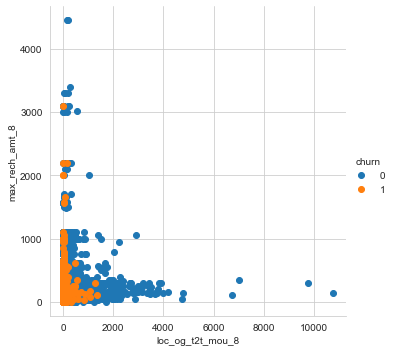

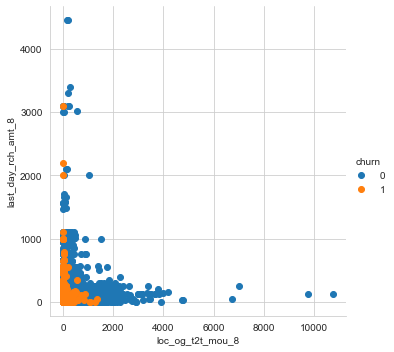

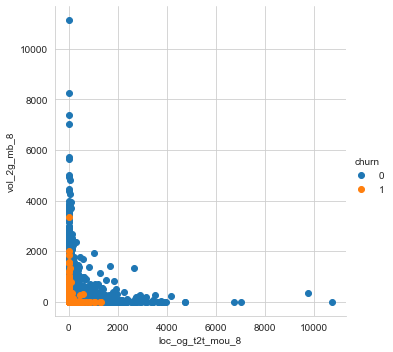

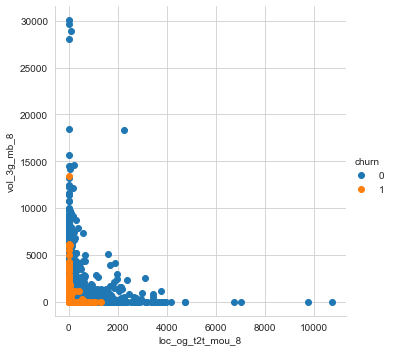

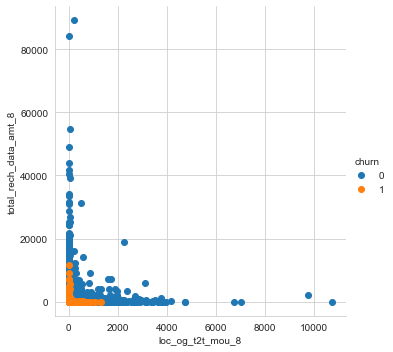

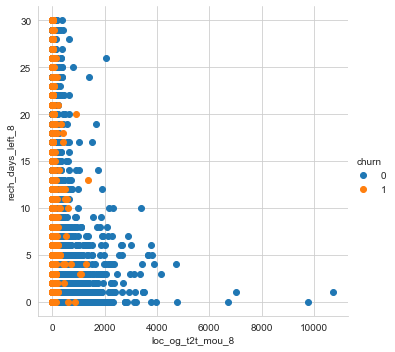

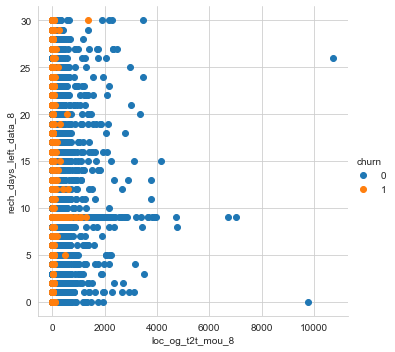

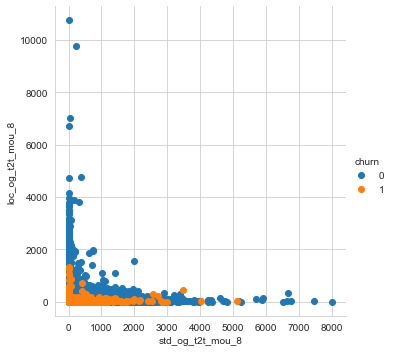

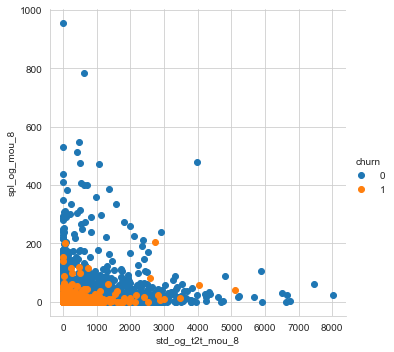

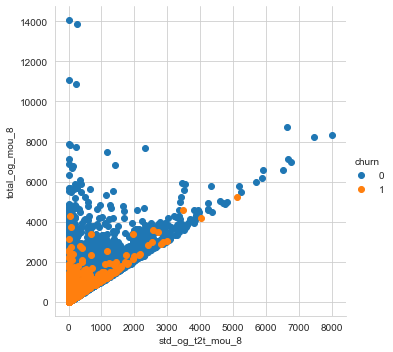

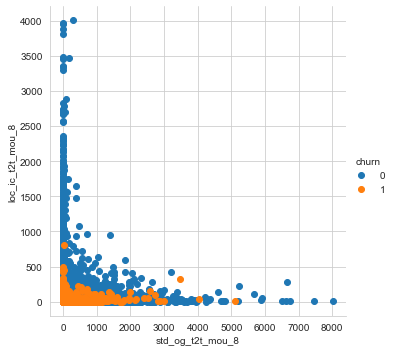

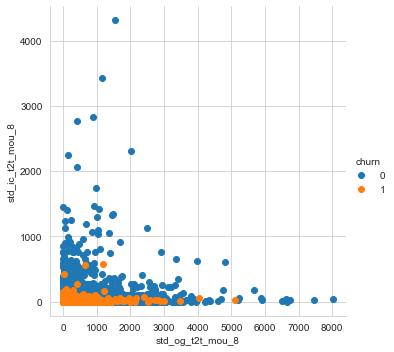

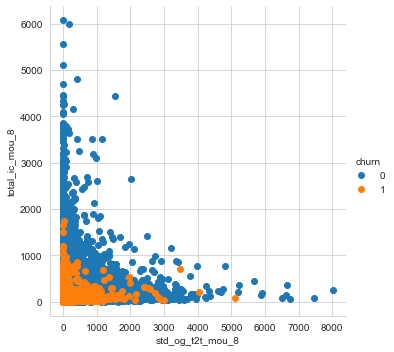

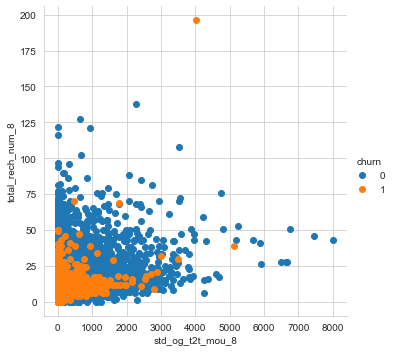

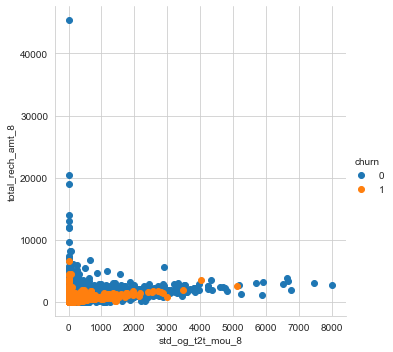

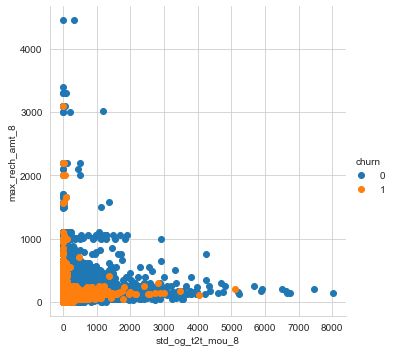

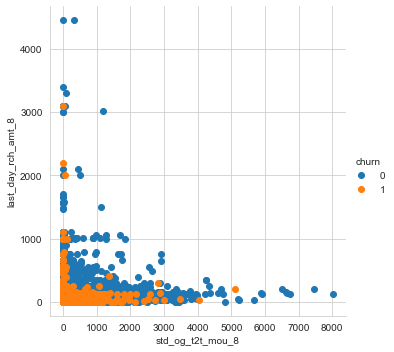

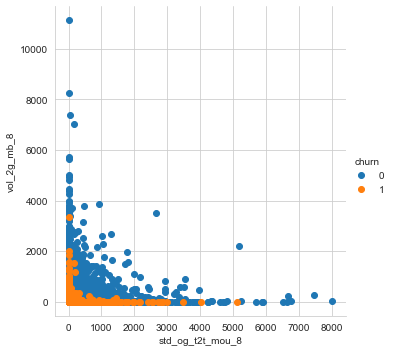

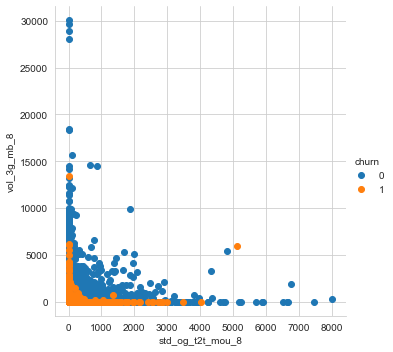

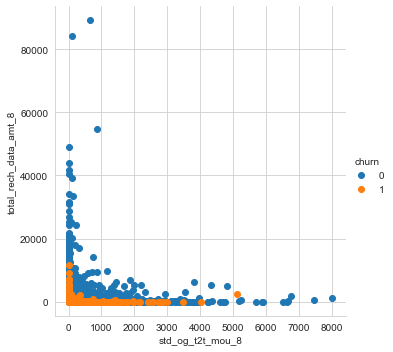

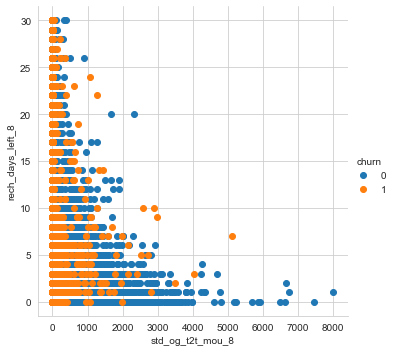

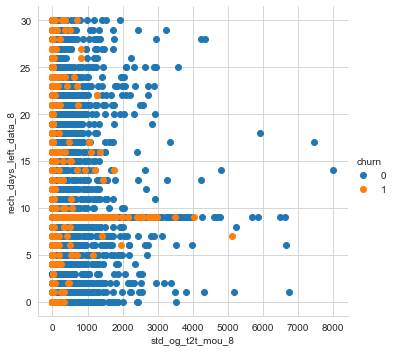

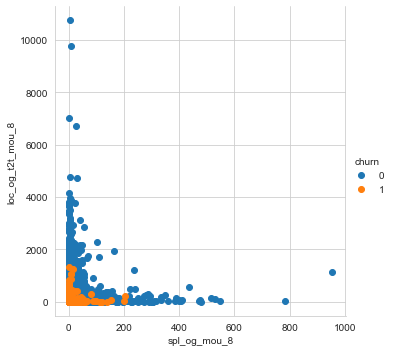

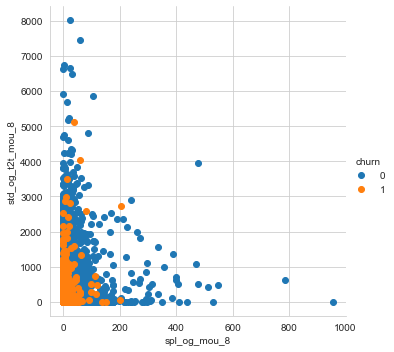

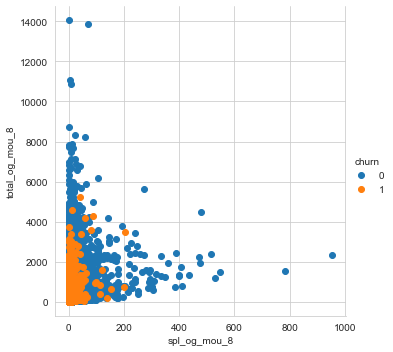

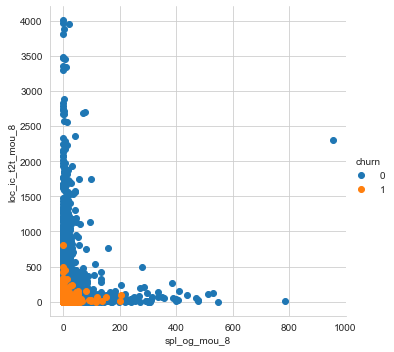

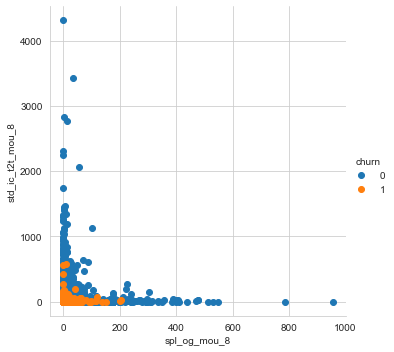

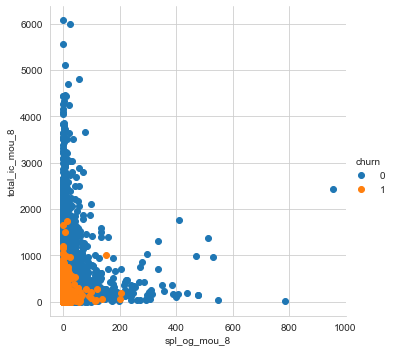

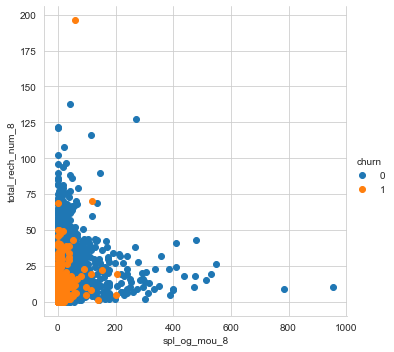

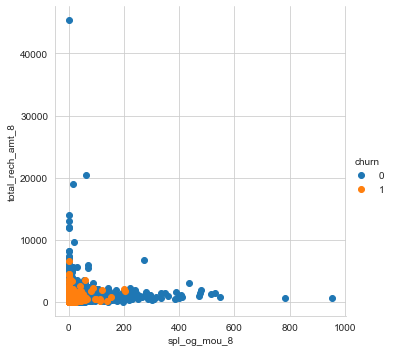

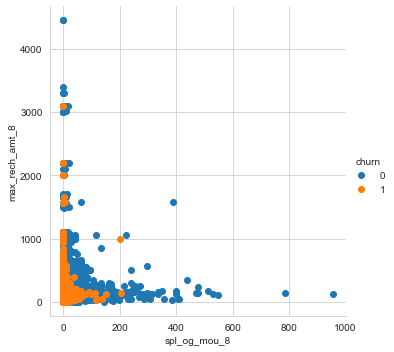

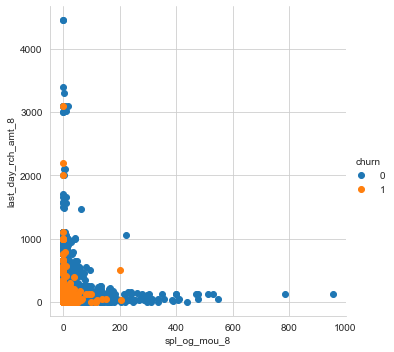

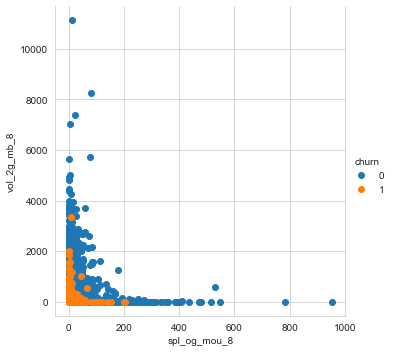

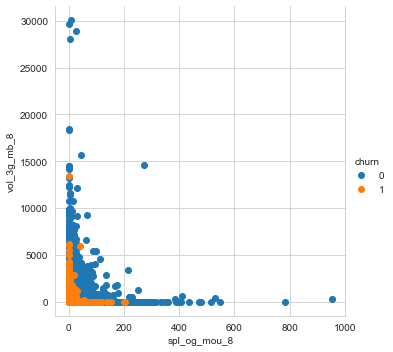

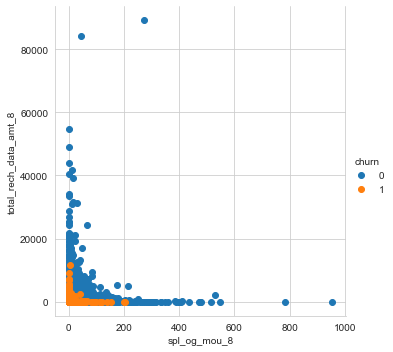

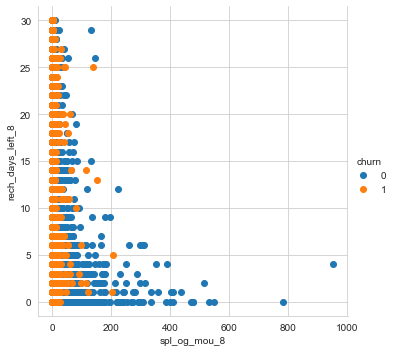

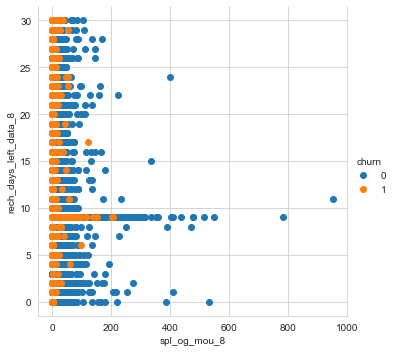

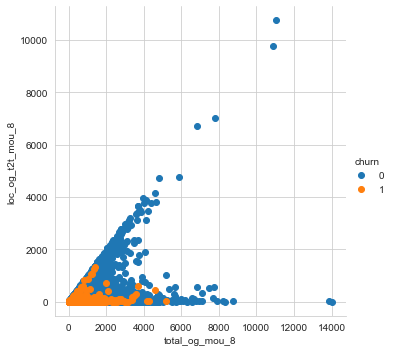

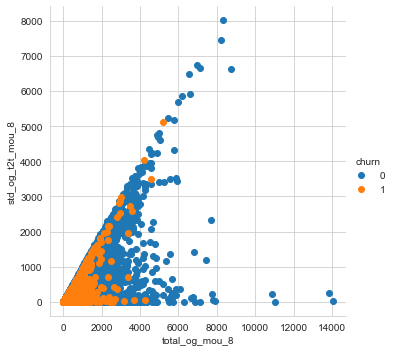

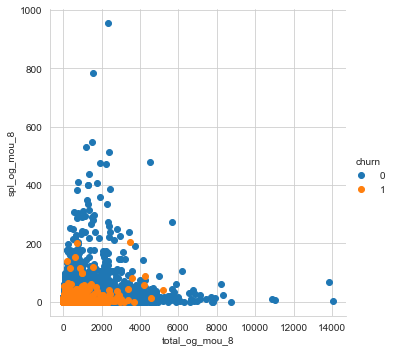

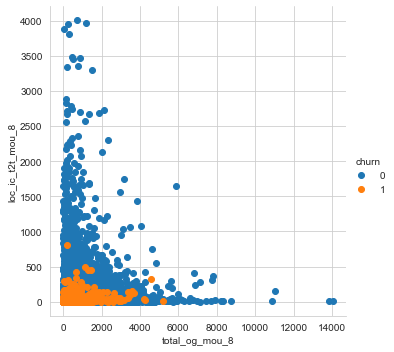

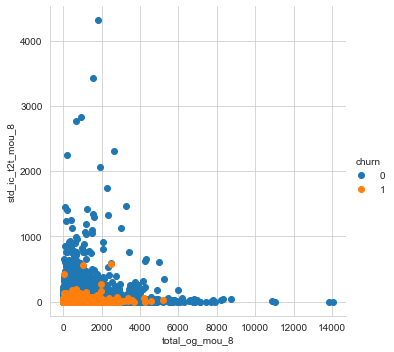

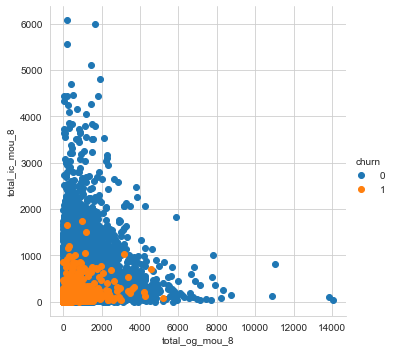

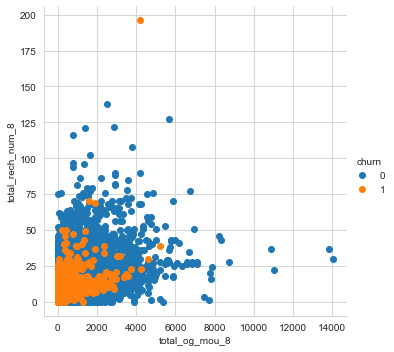

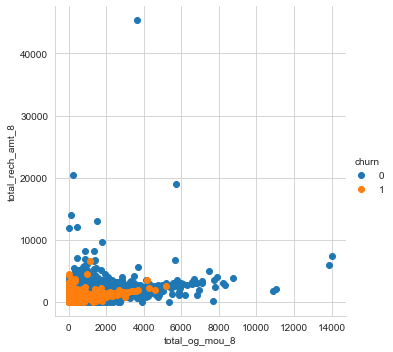

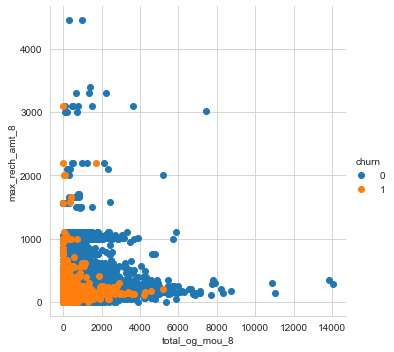

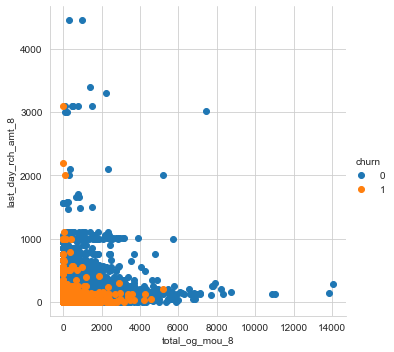

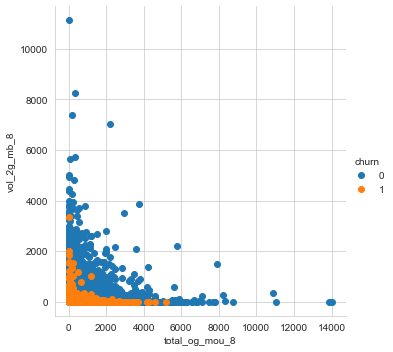

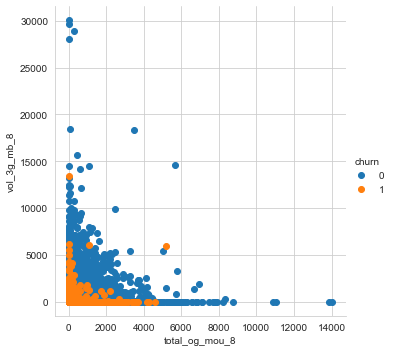

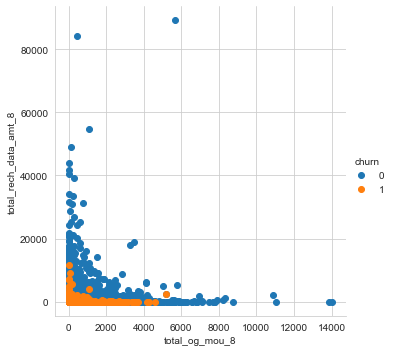

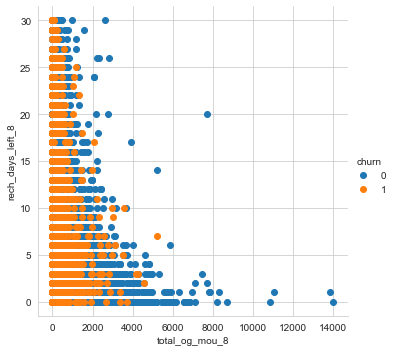

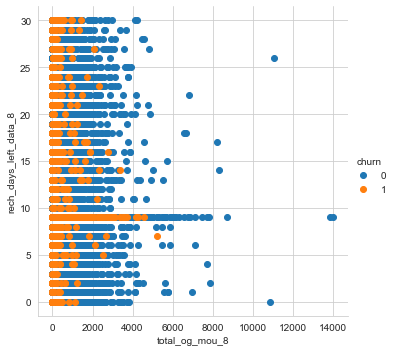

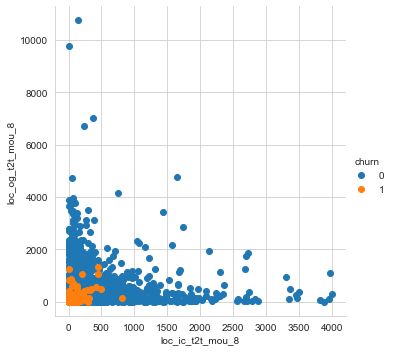

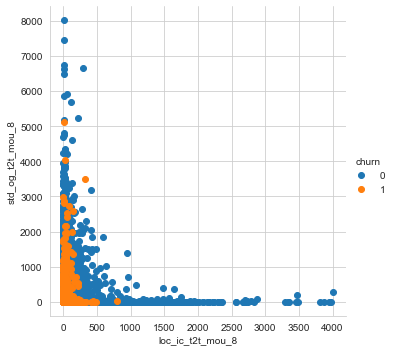

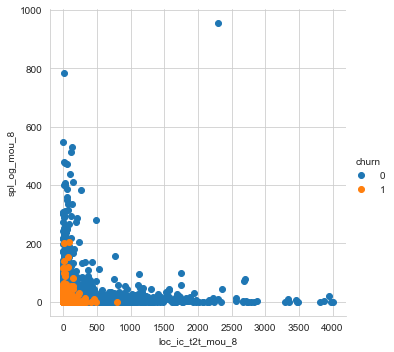

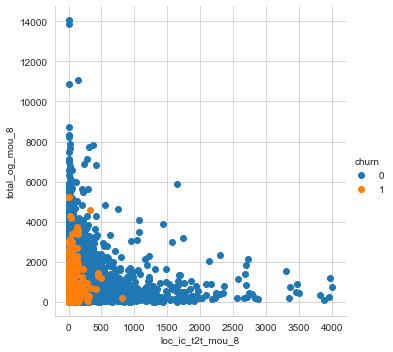

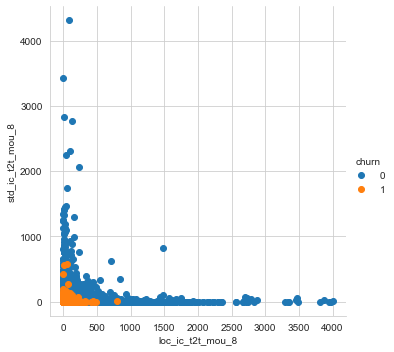

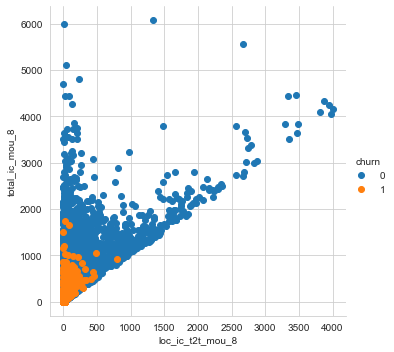

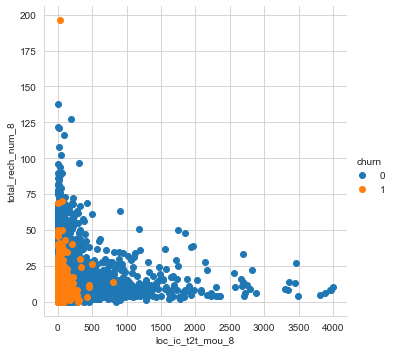

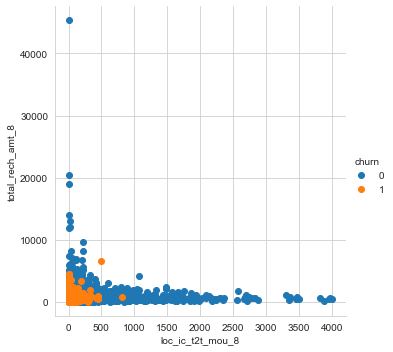

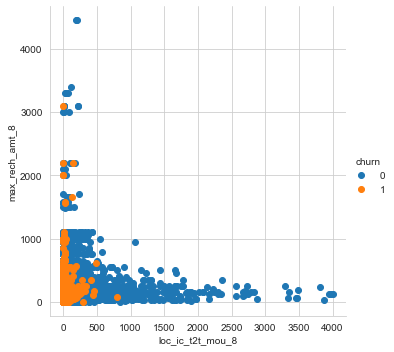

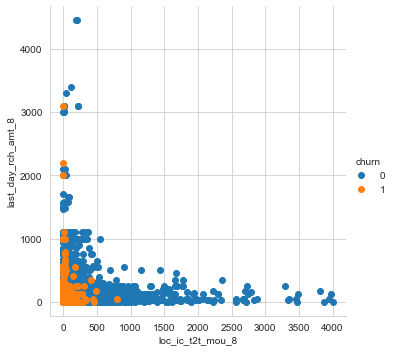

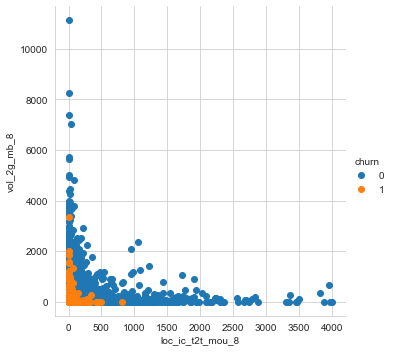

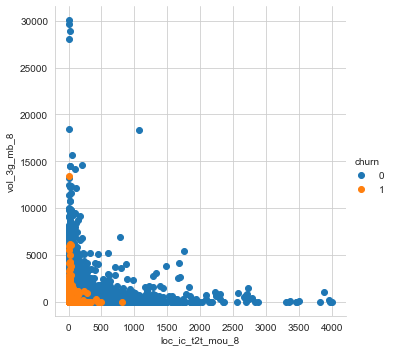

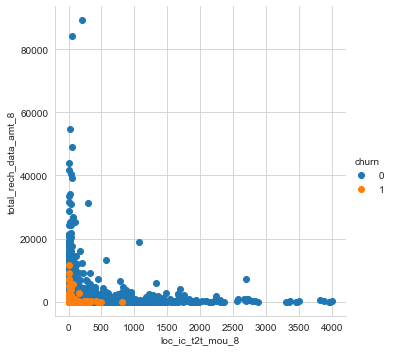

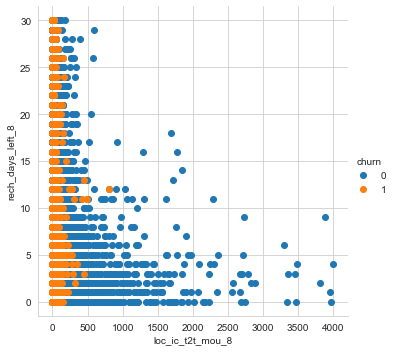

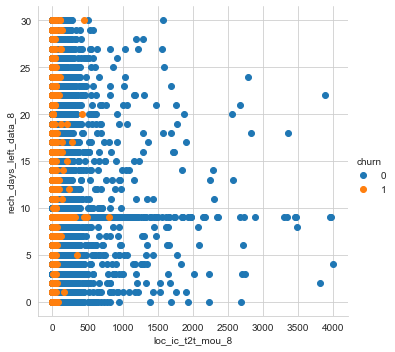

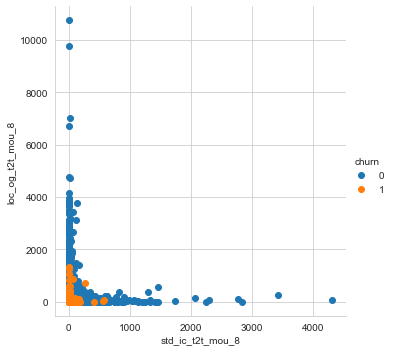

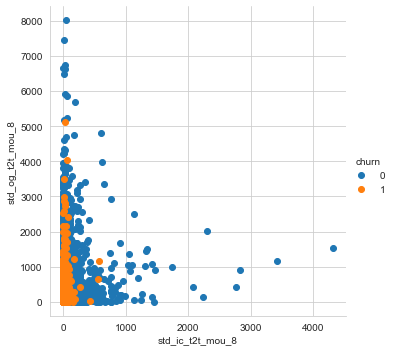

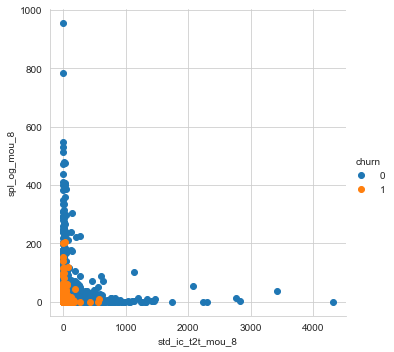

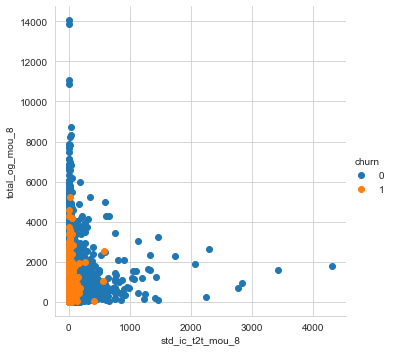

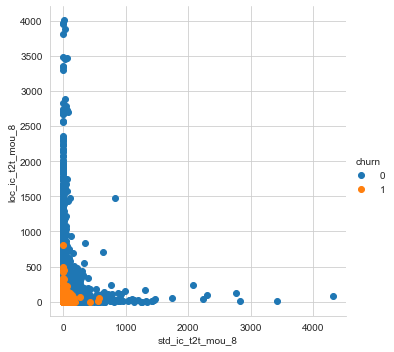

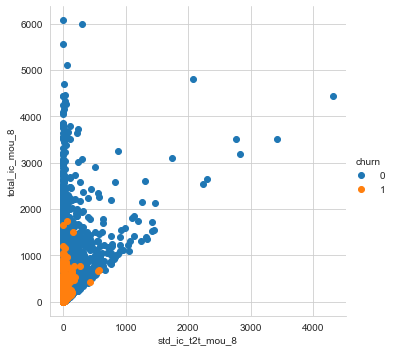

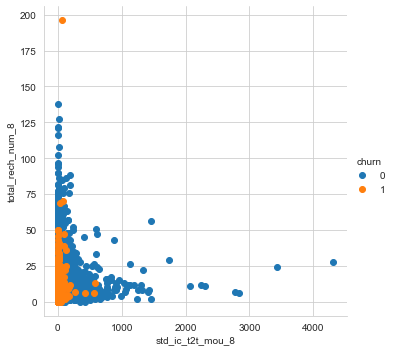

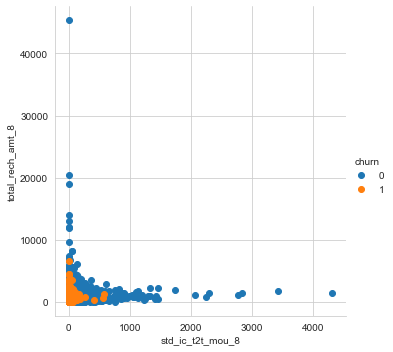

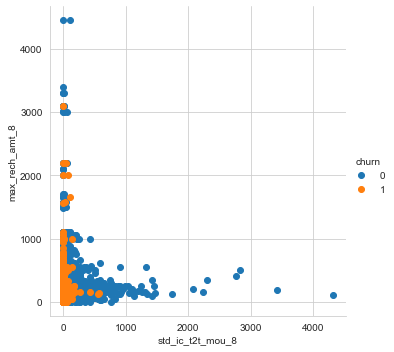

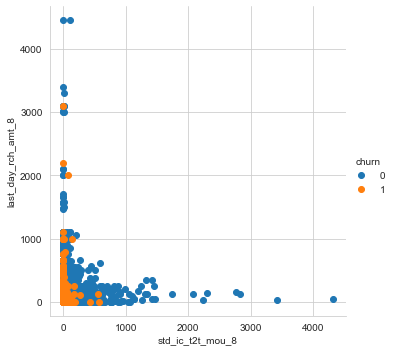

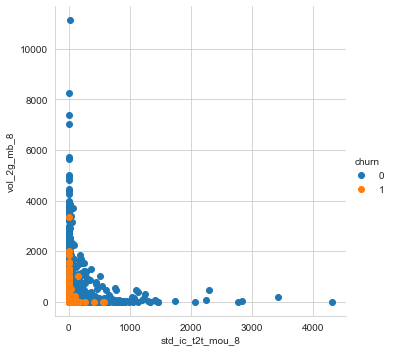

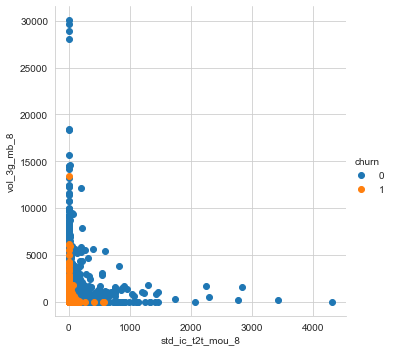

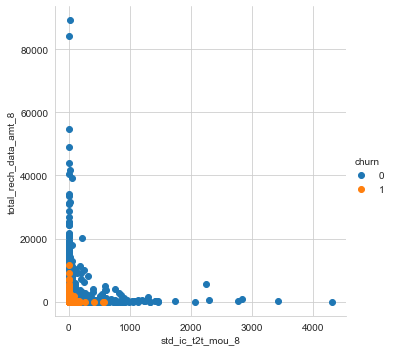

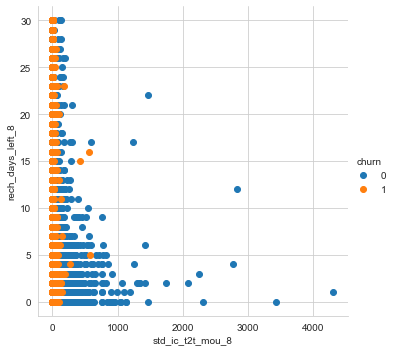

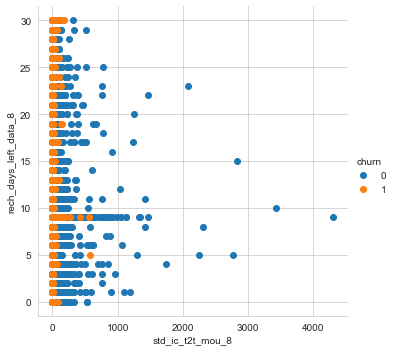

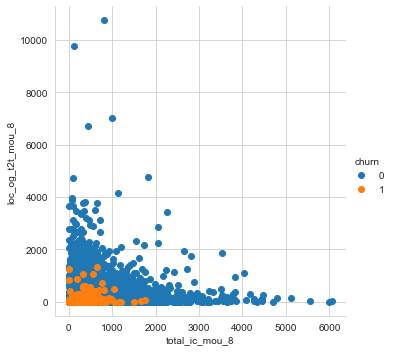

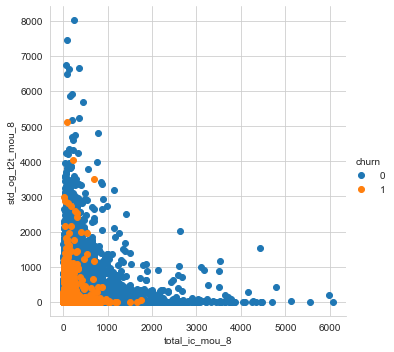

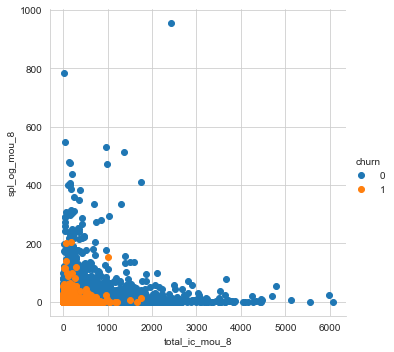

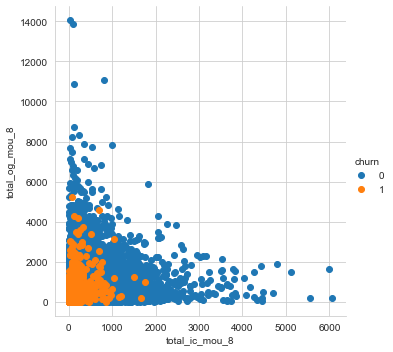

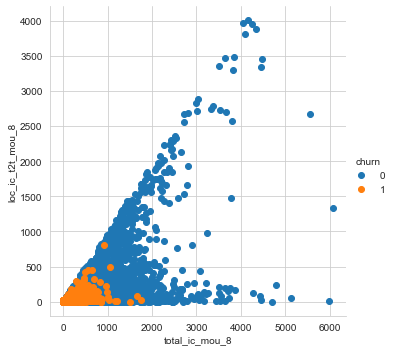

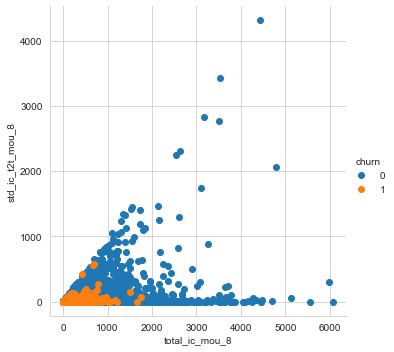

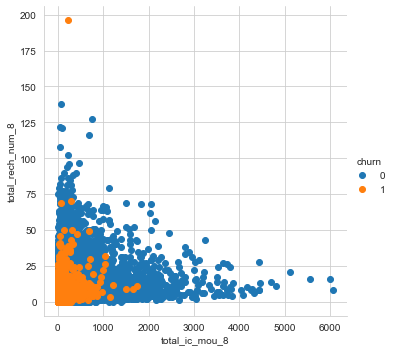

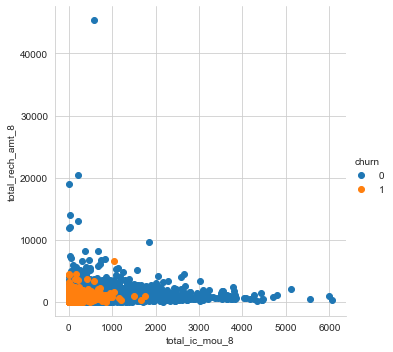

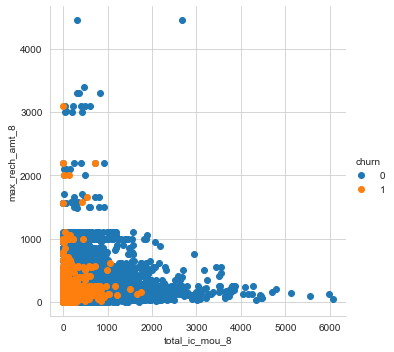

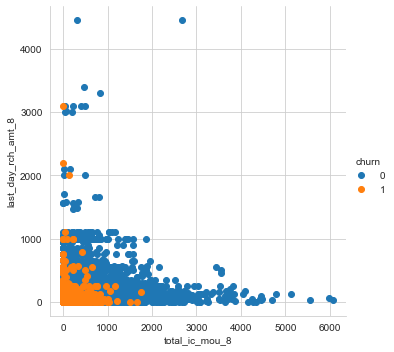

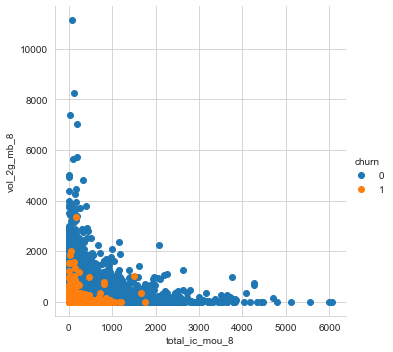

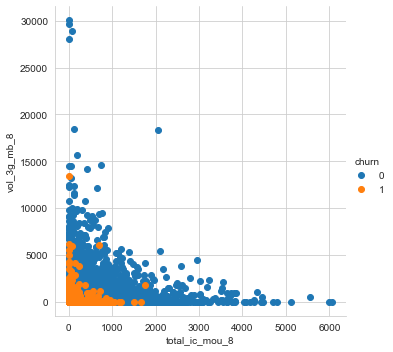

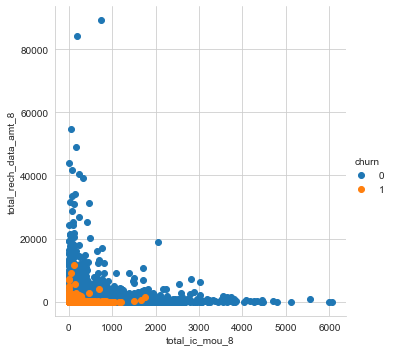

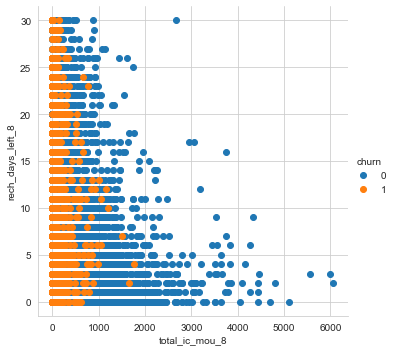

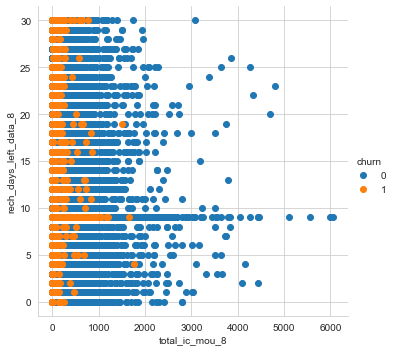

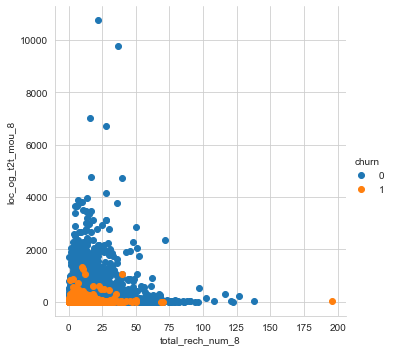

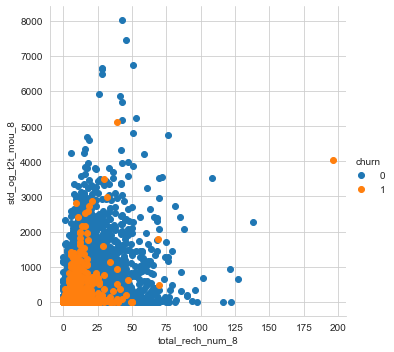

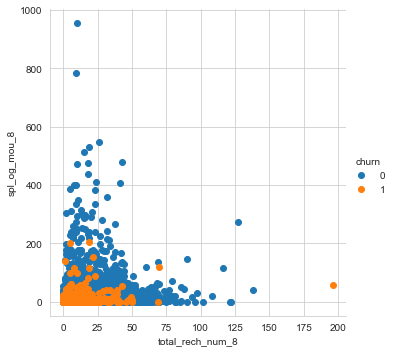

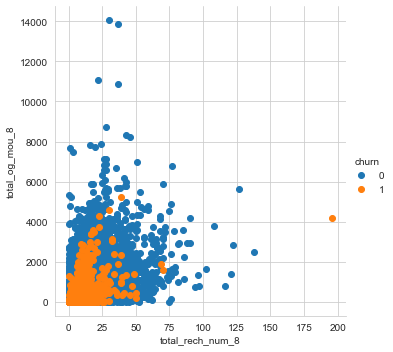

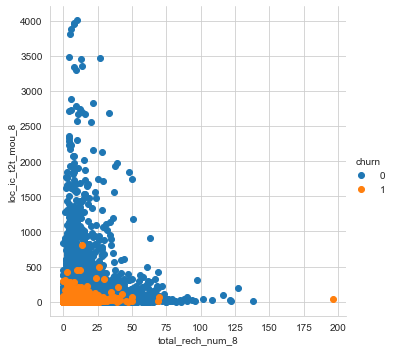

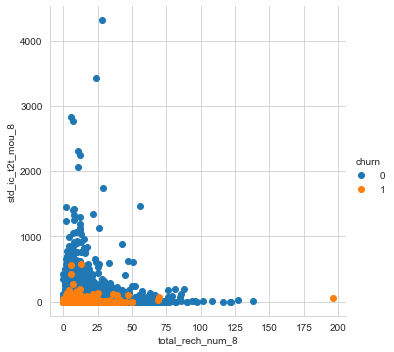

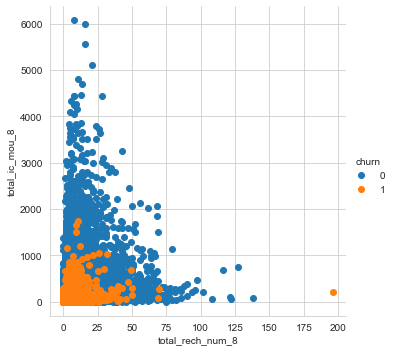

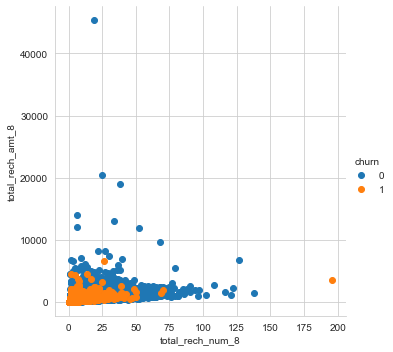

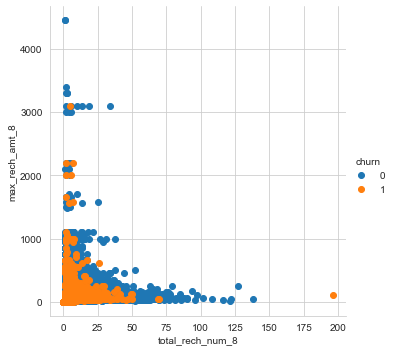

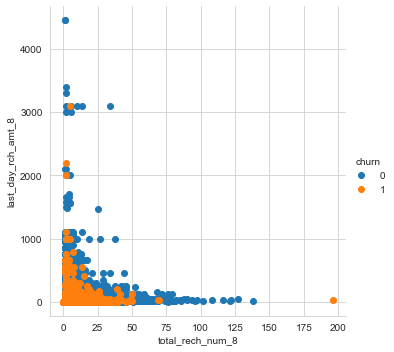

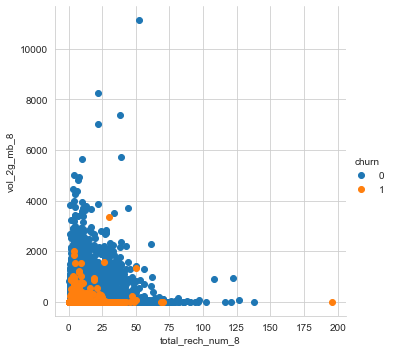

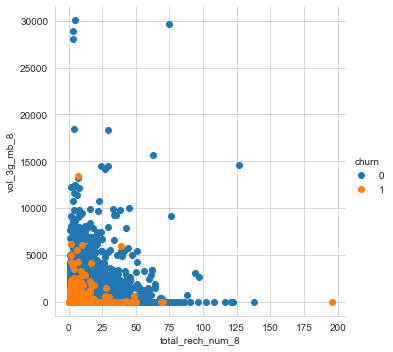

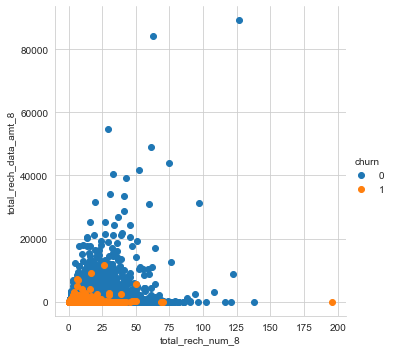

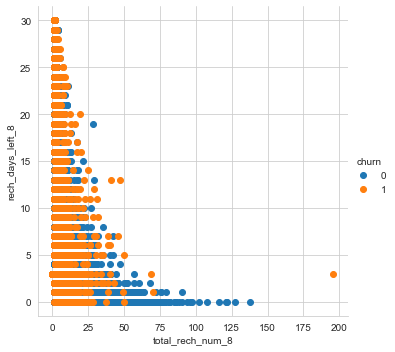

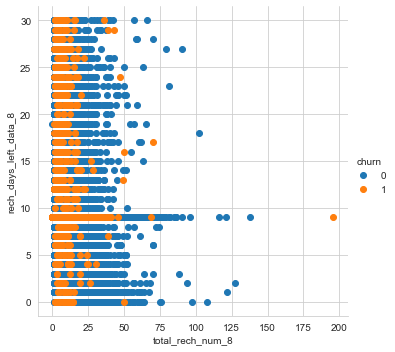

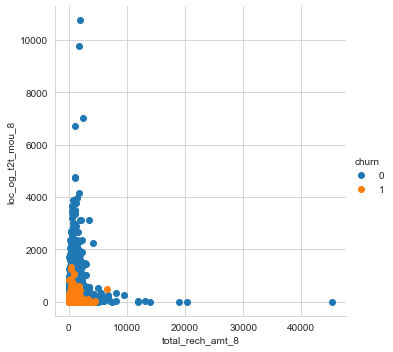

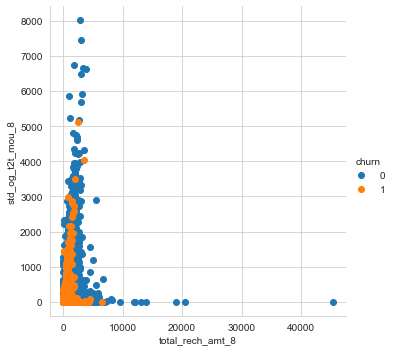

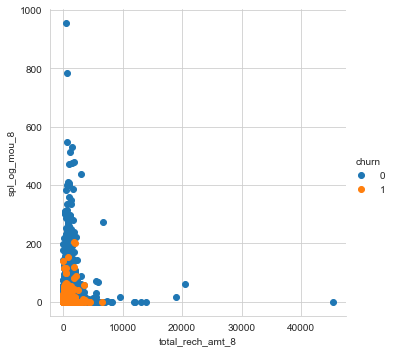

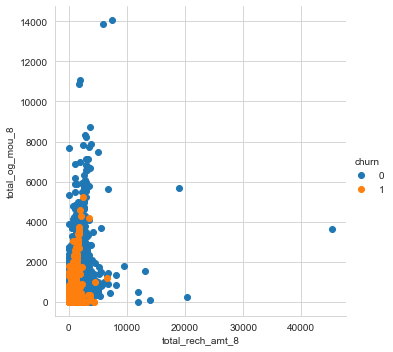

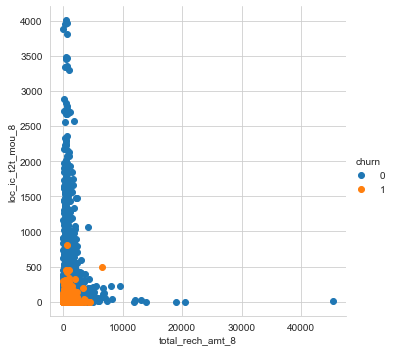

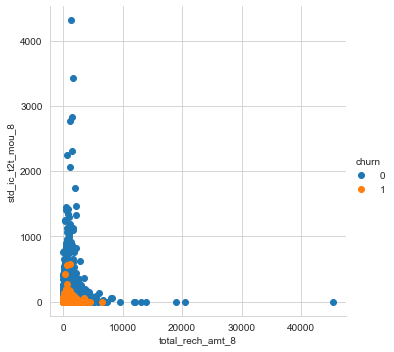

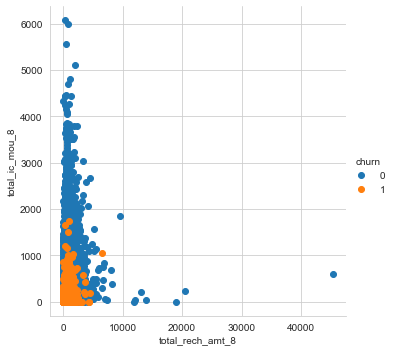

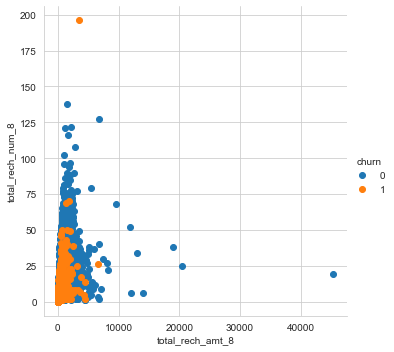

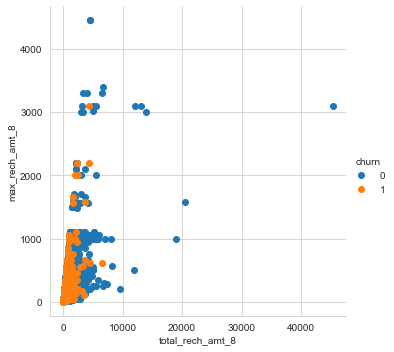

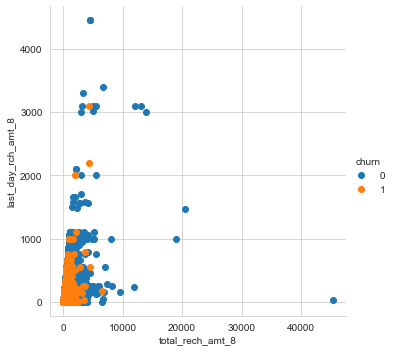

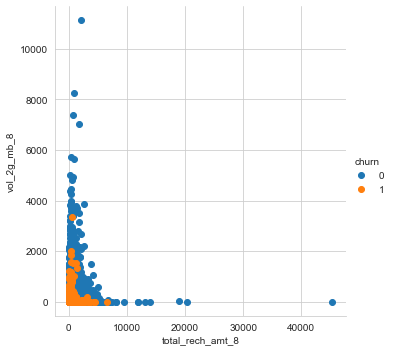

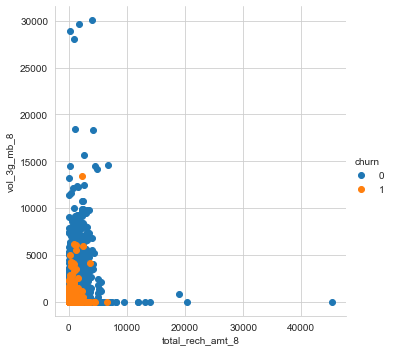

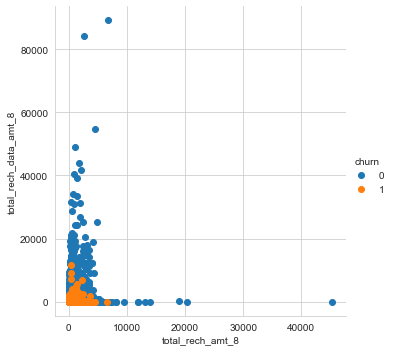

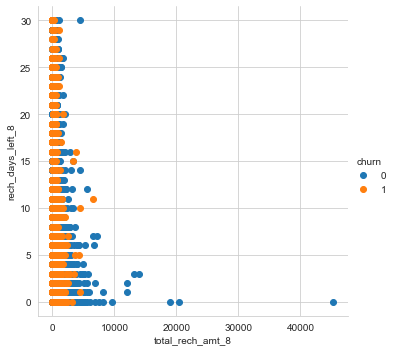

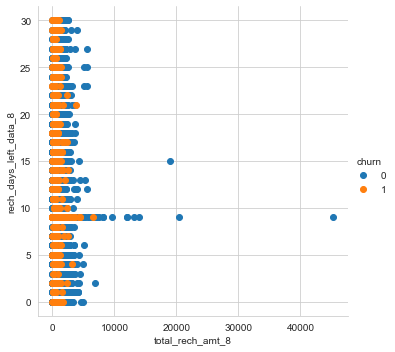

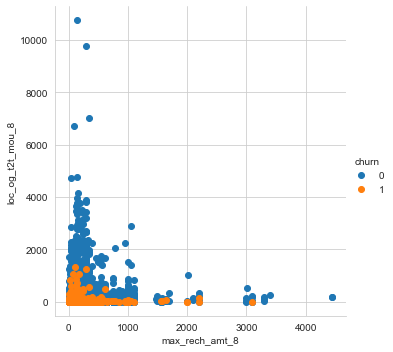

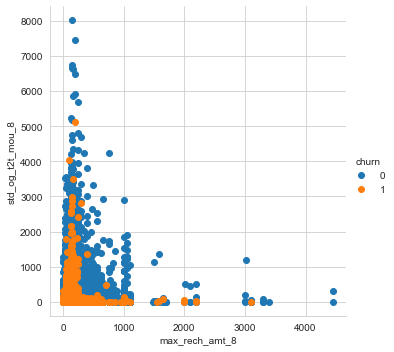

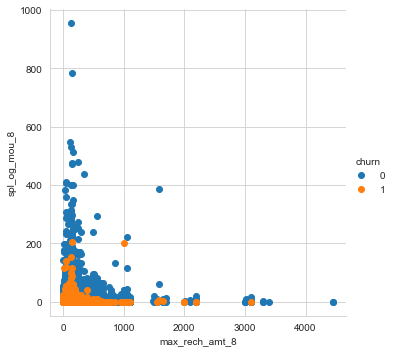

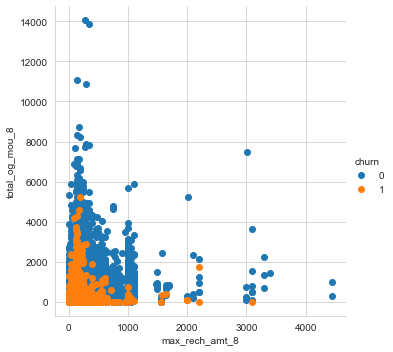

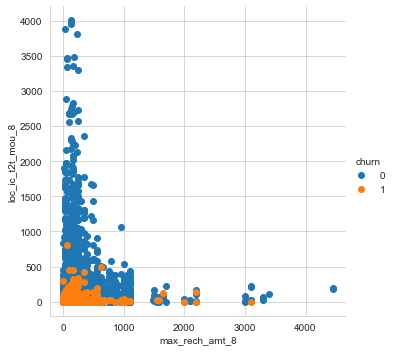

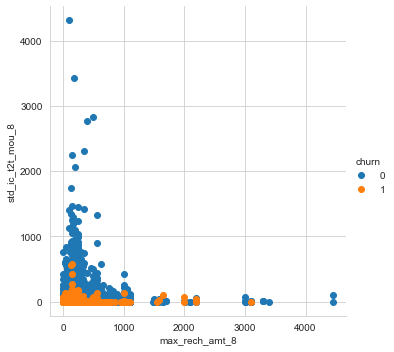

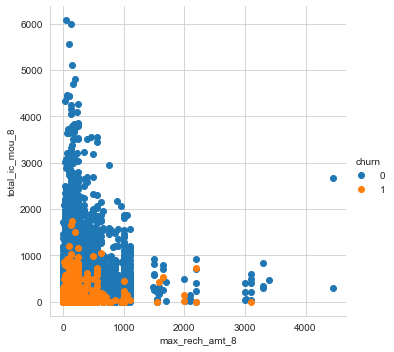

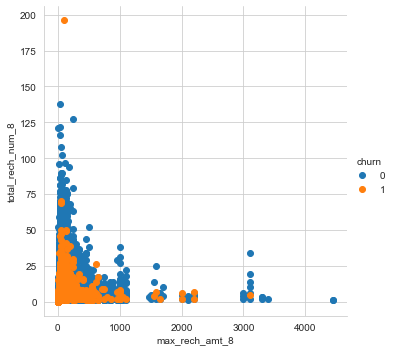

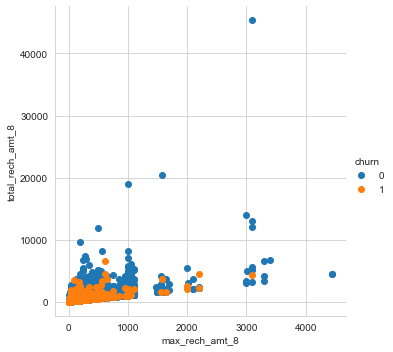

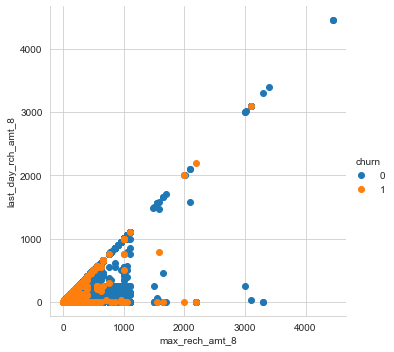

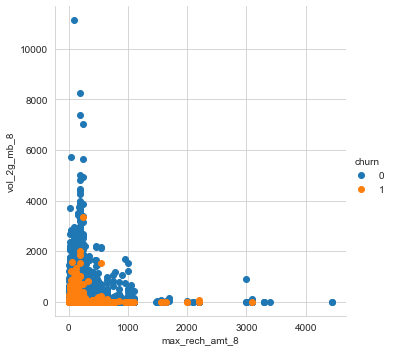

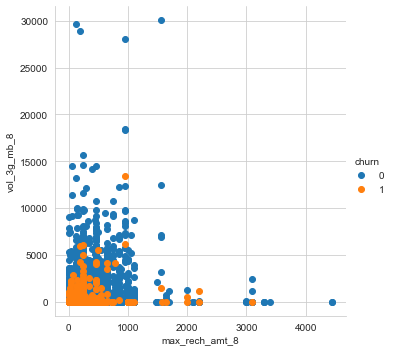

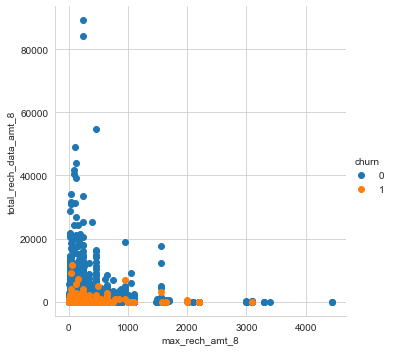

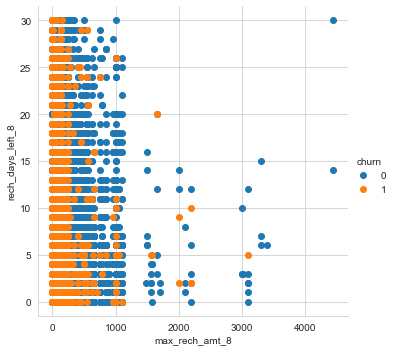

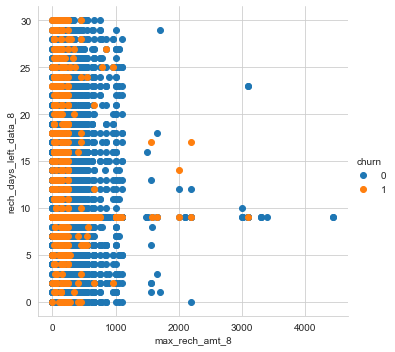

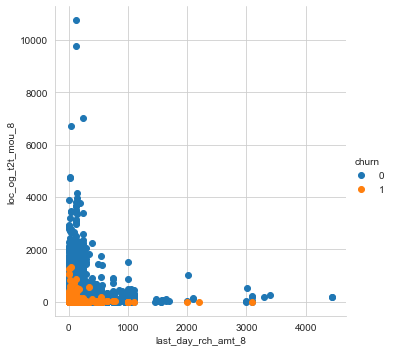

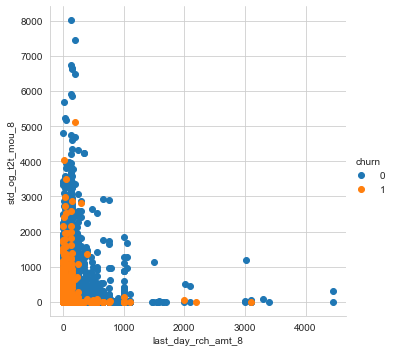

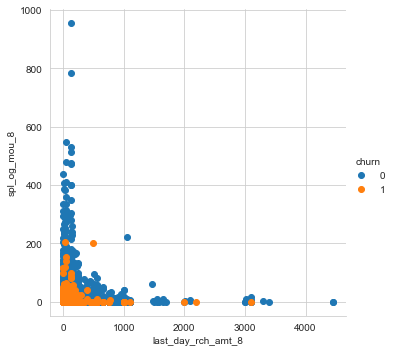

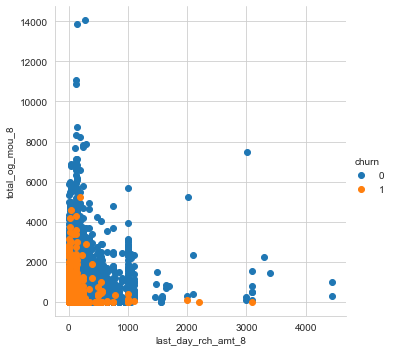

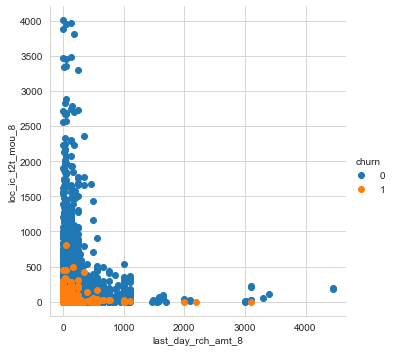

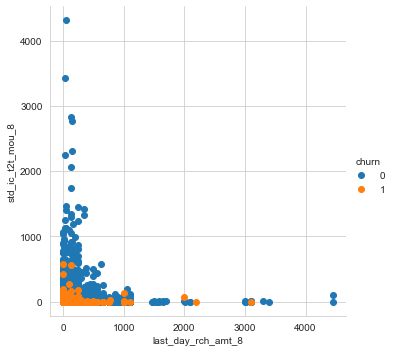

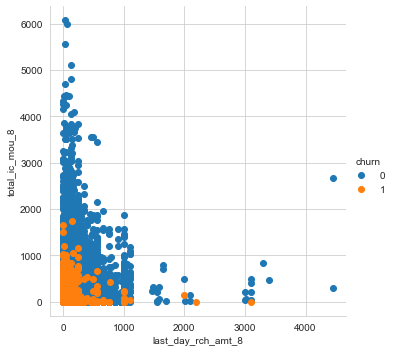

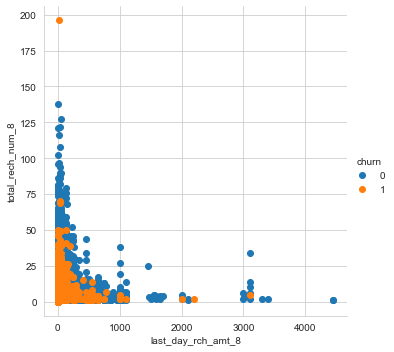

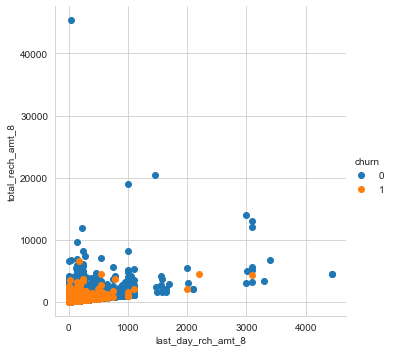

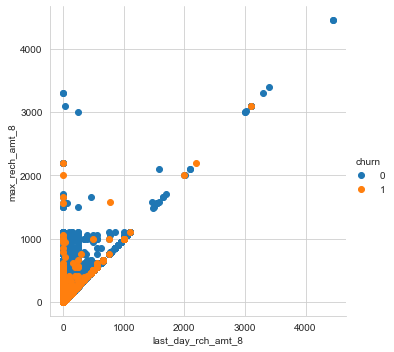

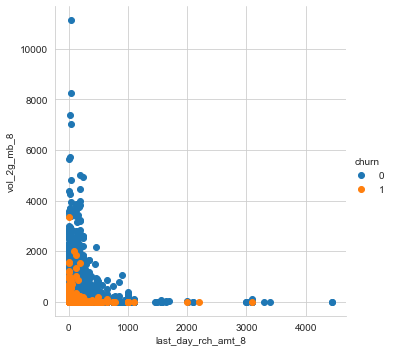

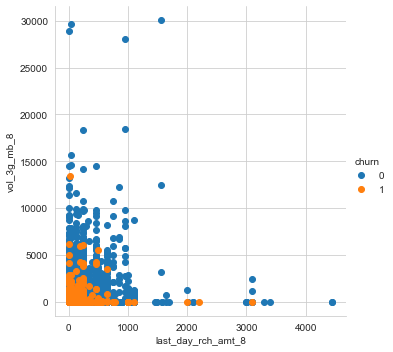

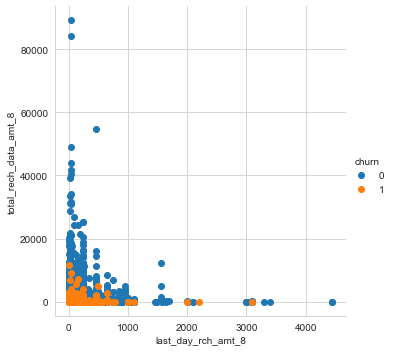

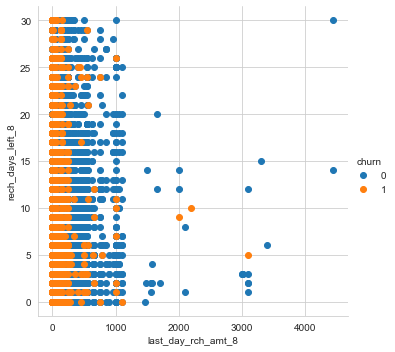

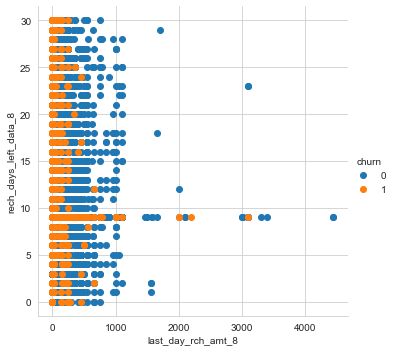

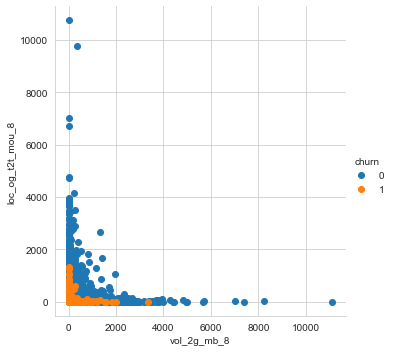

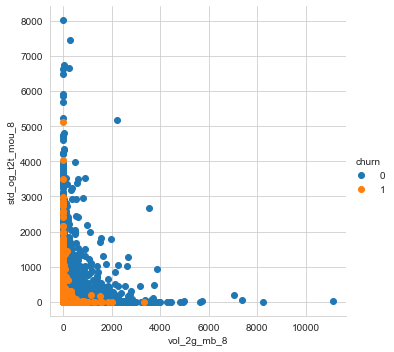

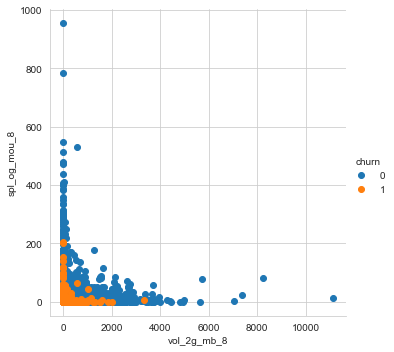

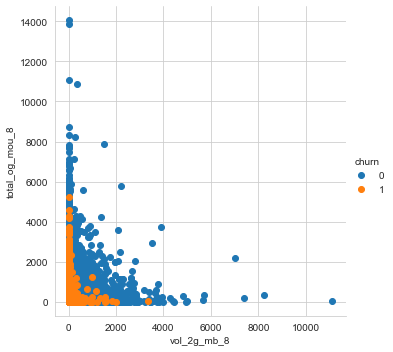

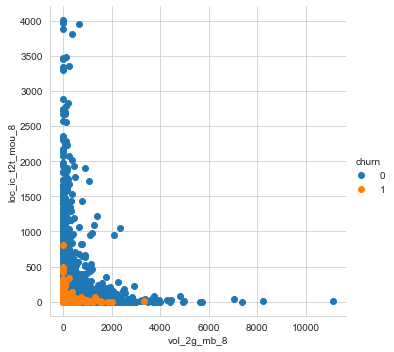

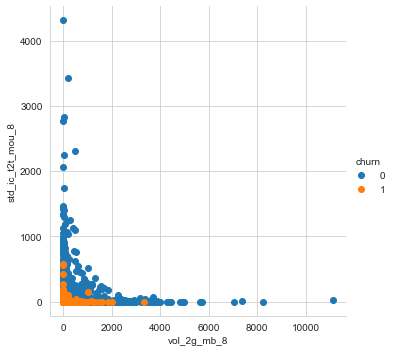

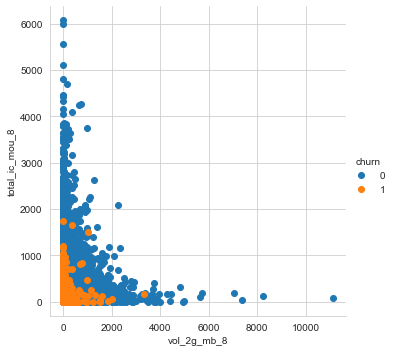

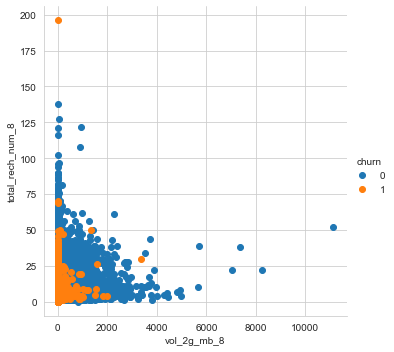

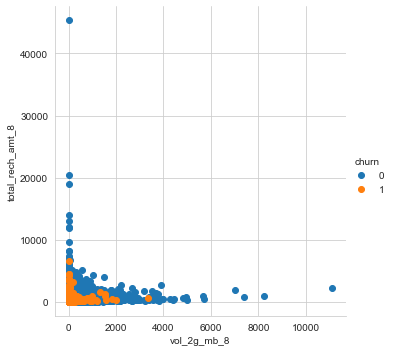

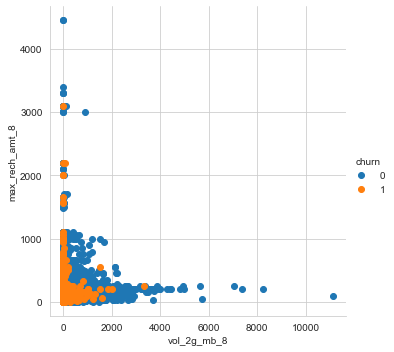

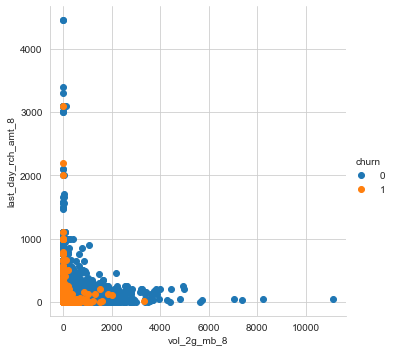

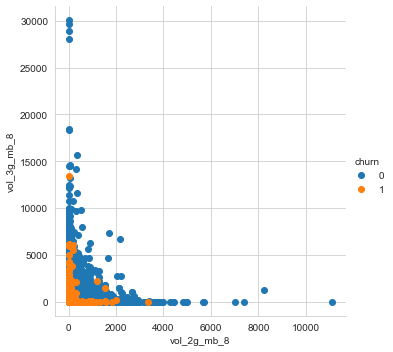

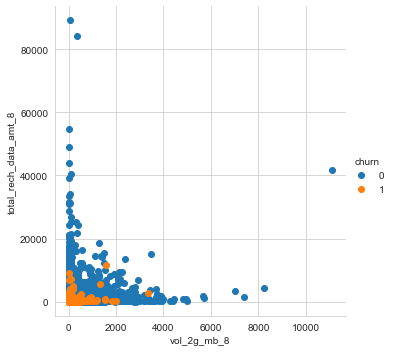

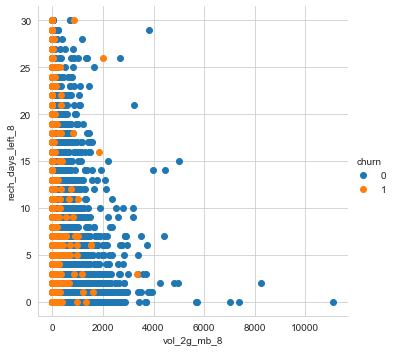

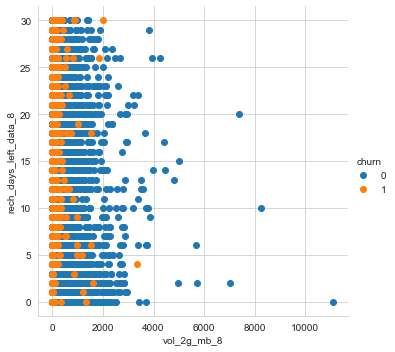

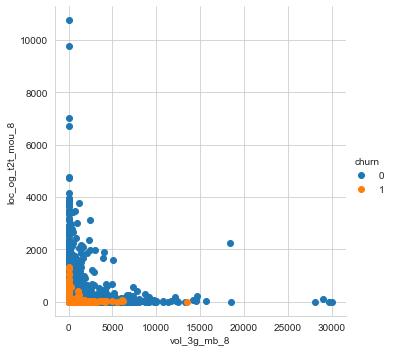

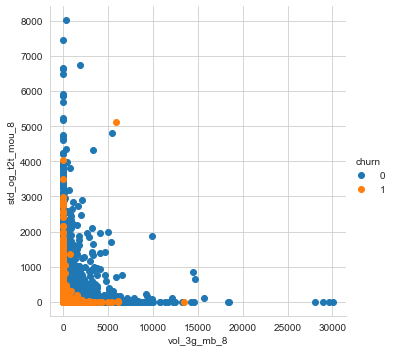

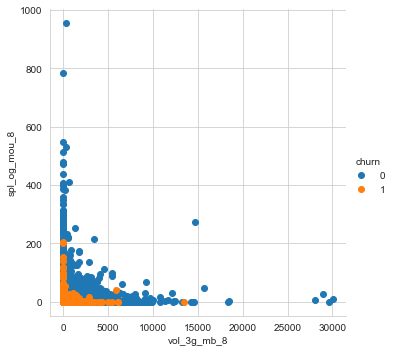

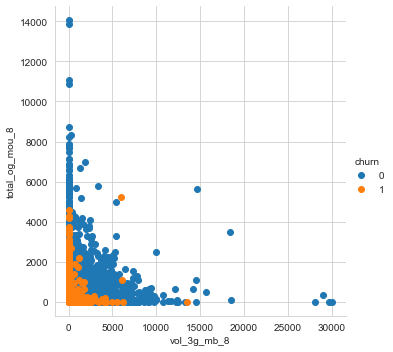

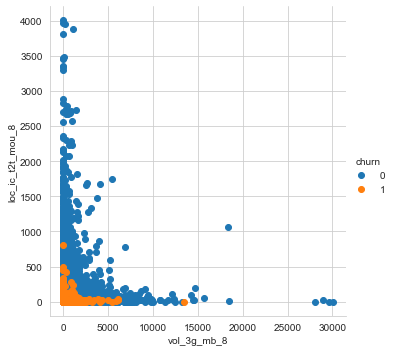

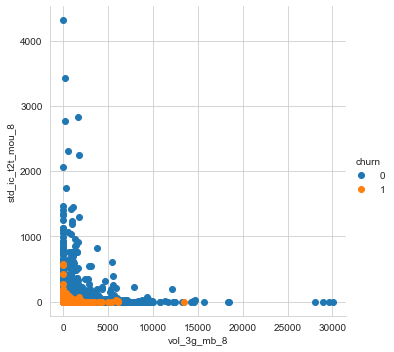

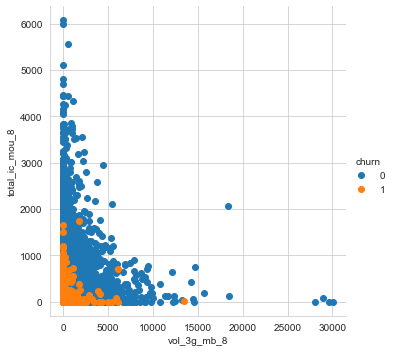

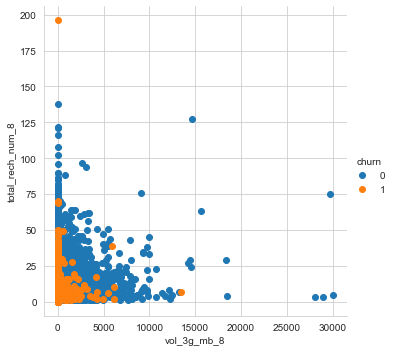

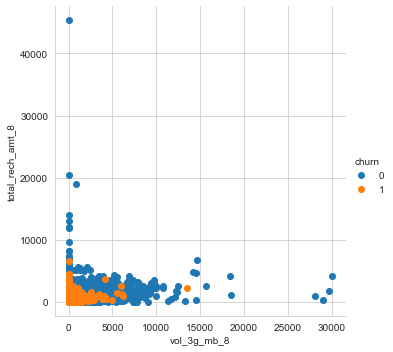

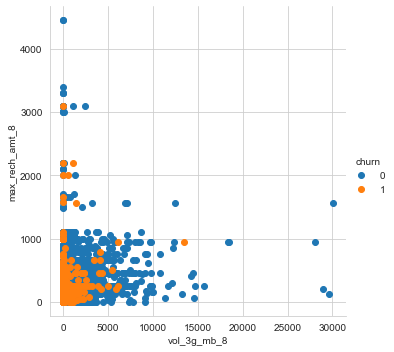

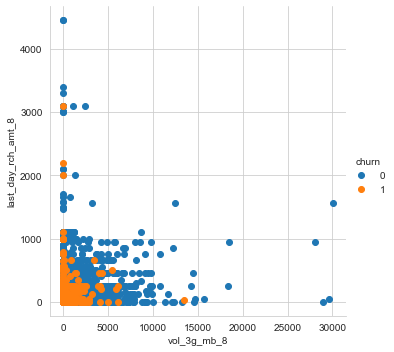

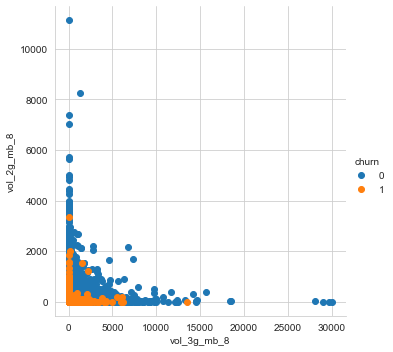

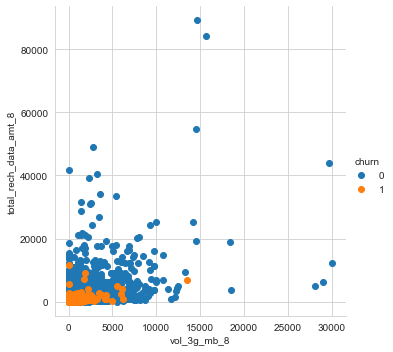

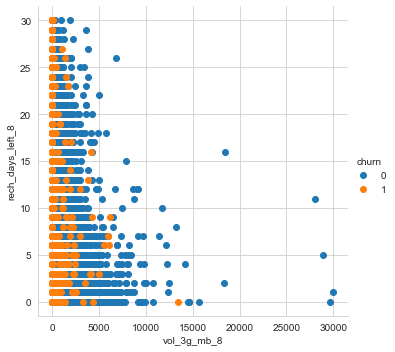

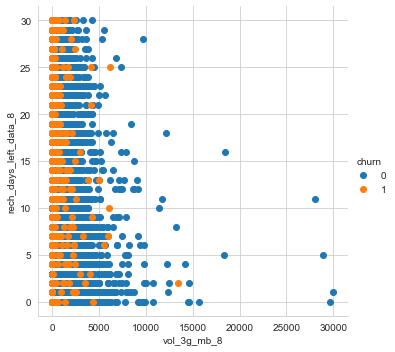

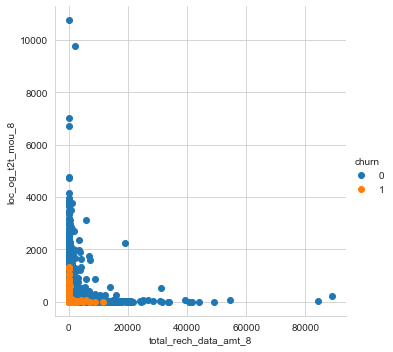

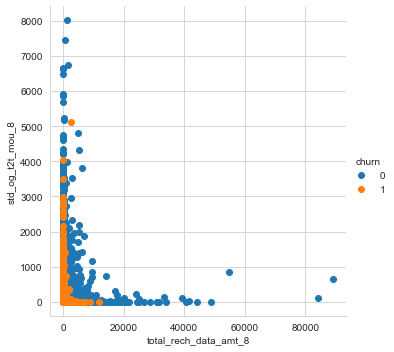

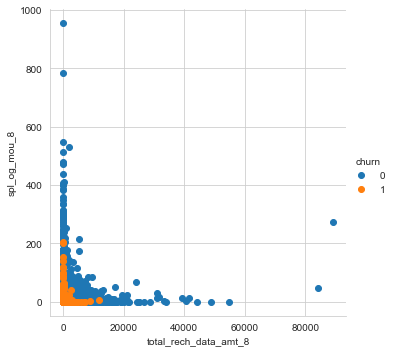

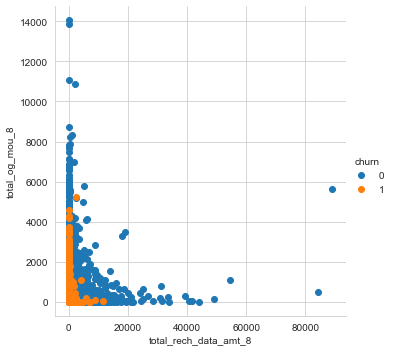

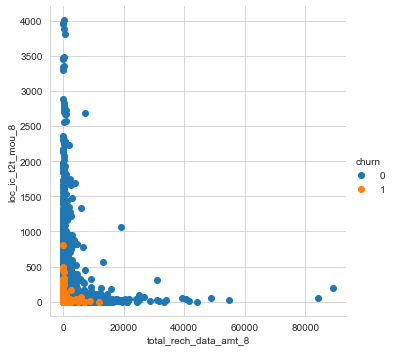

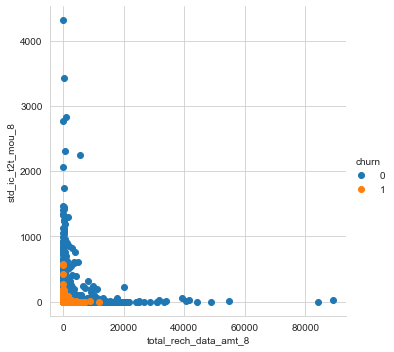

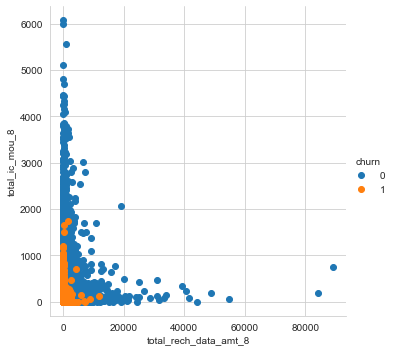

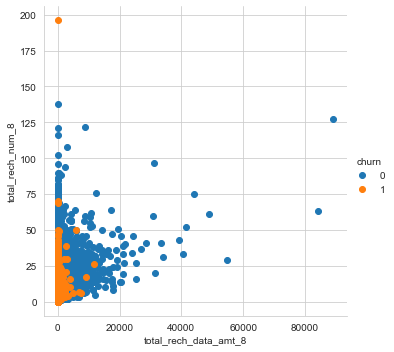

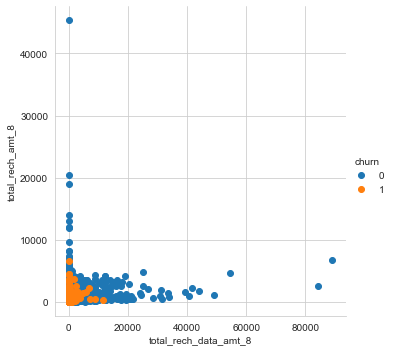

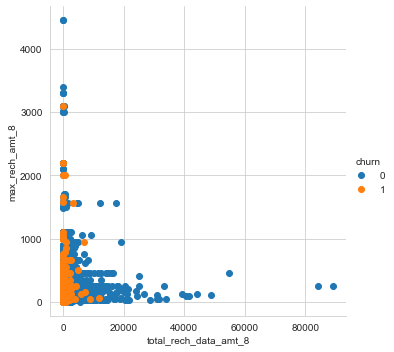

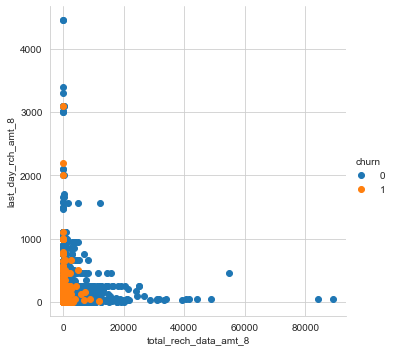

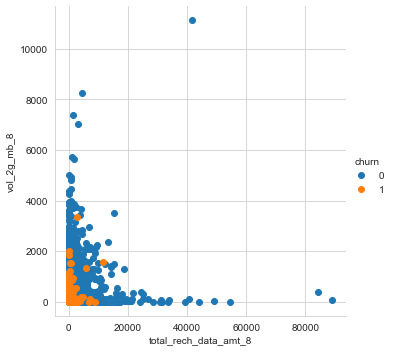

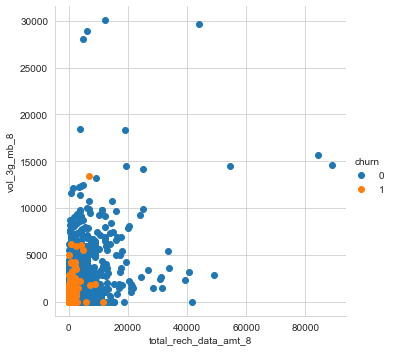

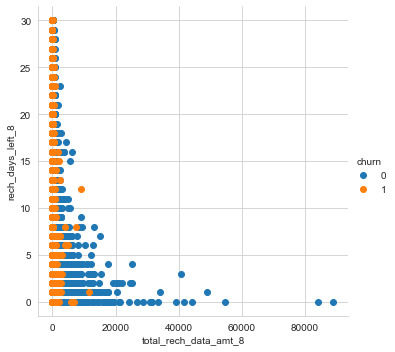

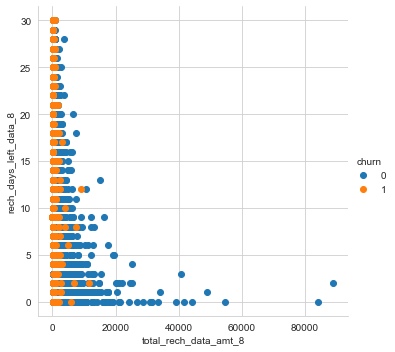

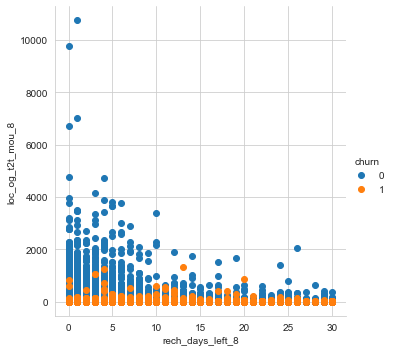

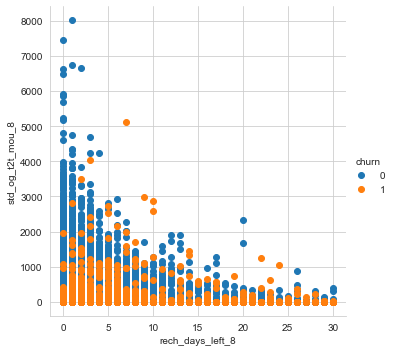

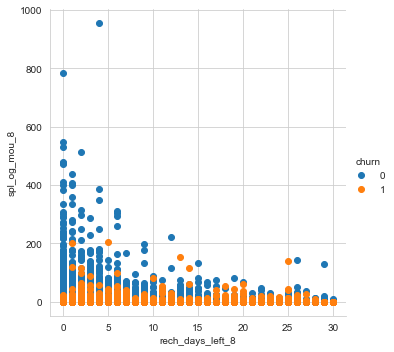

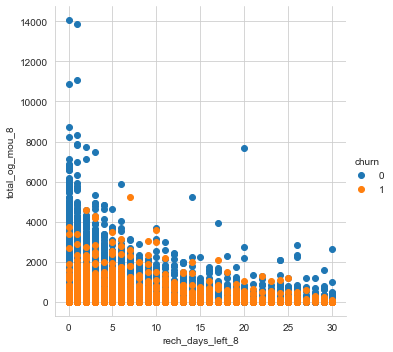

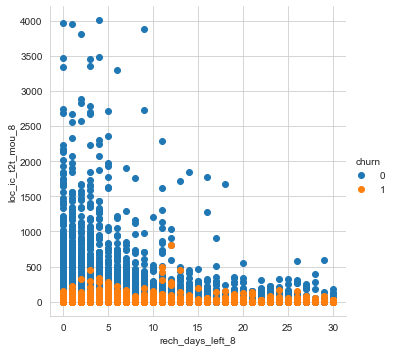

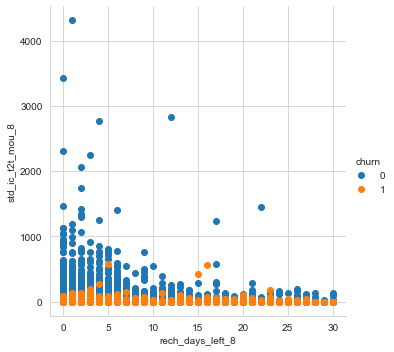

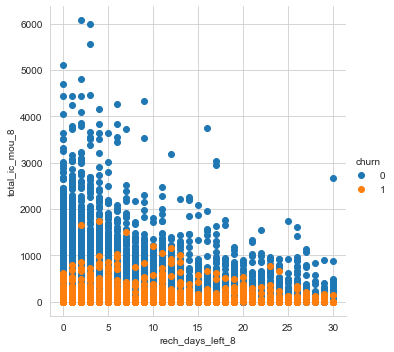

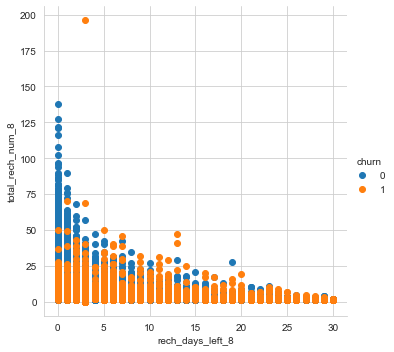

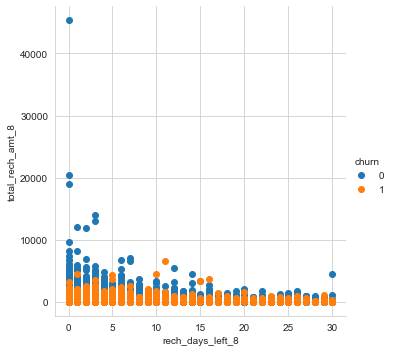

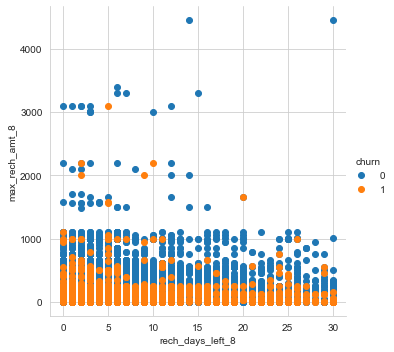

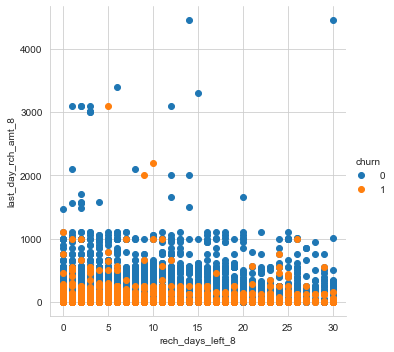

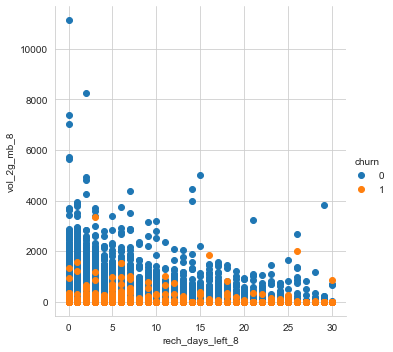

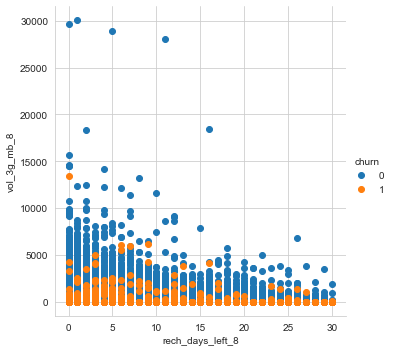

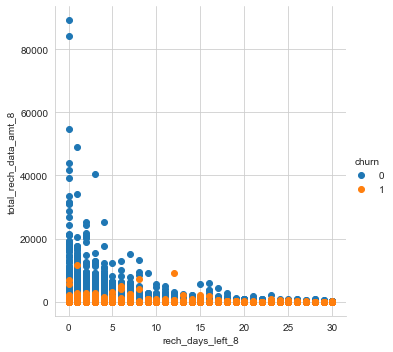

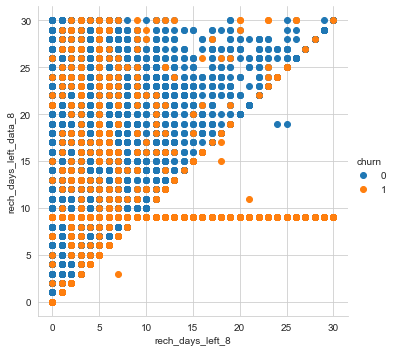

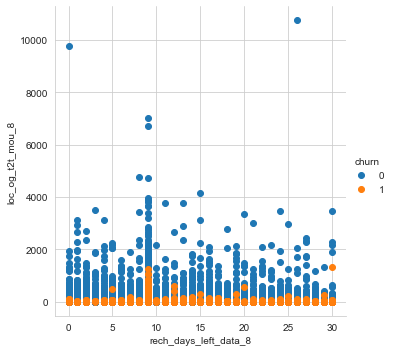

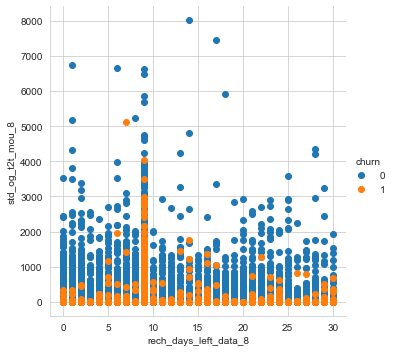

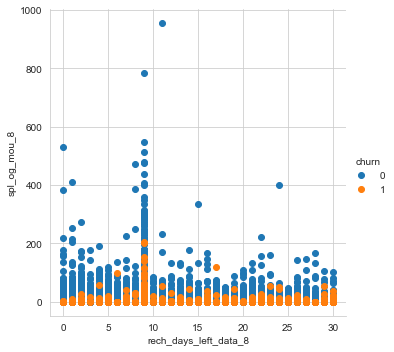

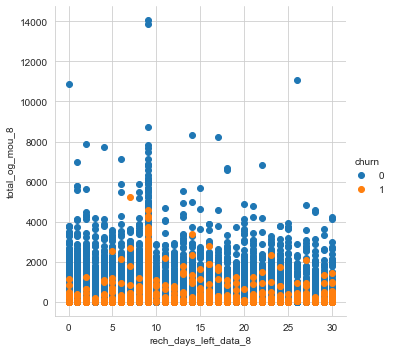

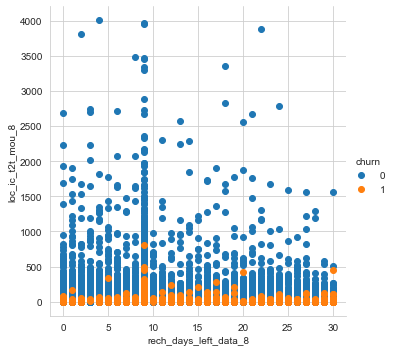

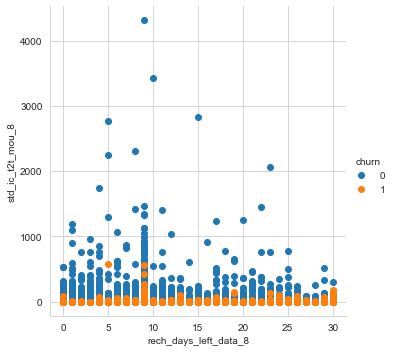

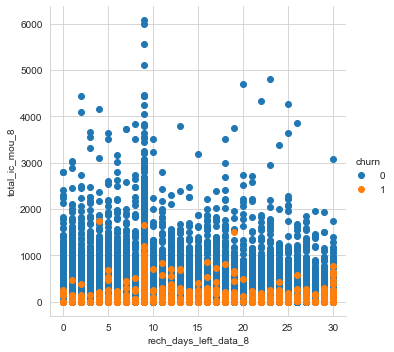

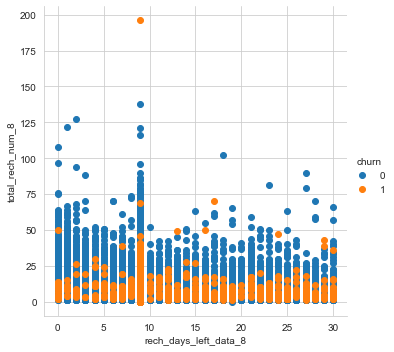

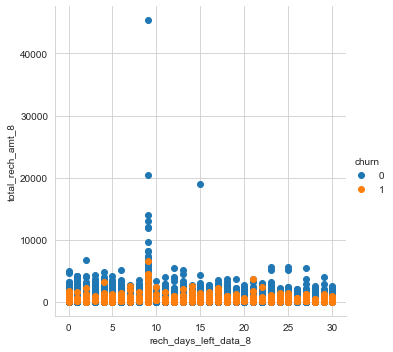

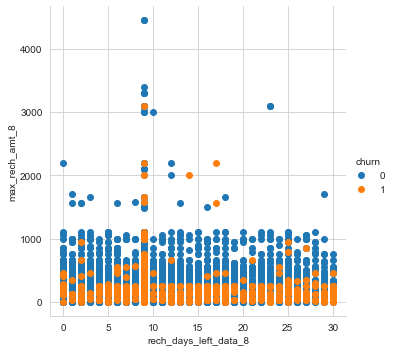

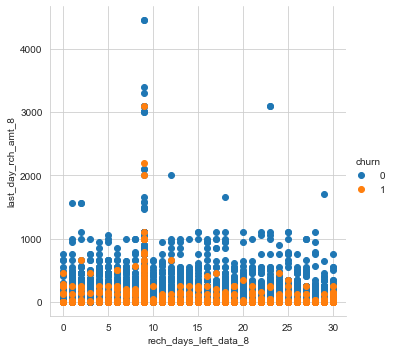

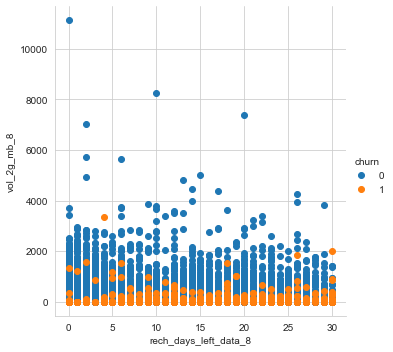

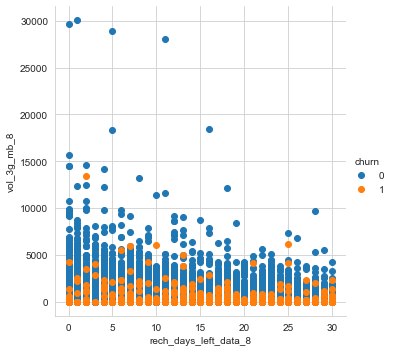

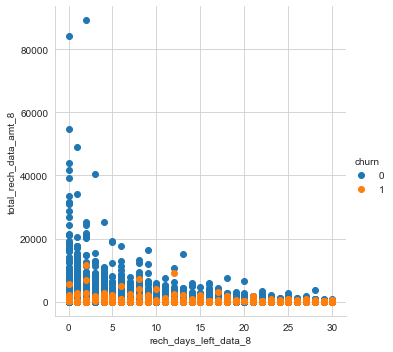

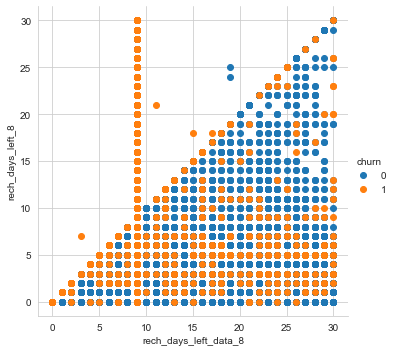

In [80]:
for i in bi_ana:
    for j in bi_ana:
        if i != j:
            sns.FacetGrid(hvc_100,hue='churn',size=5).map(plt.scatter,i,j).add_legend()
            plt.show()

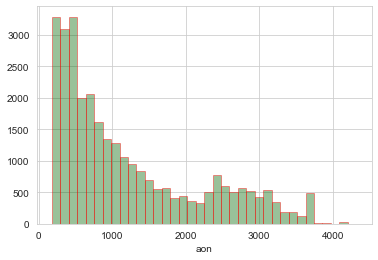

In [81]:
# Performing Analysis on AON (Age Of Network) and Churn column.  
sns.distplot(hvc_100['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

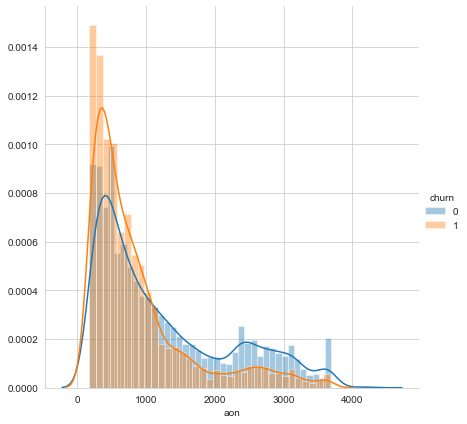

In [82]:
# Performing Analysis on AON (Age Of Network) and Churn column.
sns.set_style('whitegrid')
sns.FacetGrid(hvc_100,hue='churn',size=6).map(sns.distplot,'aon').add_legend()

### Observations for Bivariate Analysis of top 30 important features 

#### Customer is likely to churn if:
1. Minutes of usage (mou) is less 
2. Total Recharge amount is low
3. Use of Internet/Data pack services has reduced
4. User has not recharged for Data pack services 
5. Total number of recharge is low
6. User has not recharged for any services for a long time

#### Useful Insights

1. There are few customers for whom maximum recharge amount is high upto 3000 but still churned. This might be due to bad user experience or user might be travlling to area where services (for which recharge is done) are not working. We can approach such user to track the issue and try solving it.

2. Churn rate is high if Age of Network is less. 

### Heatmap

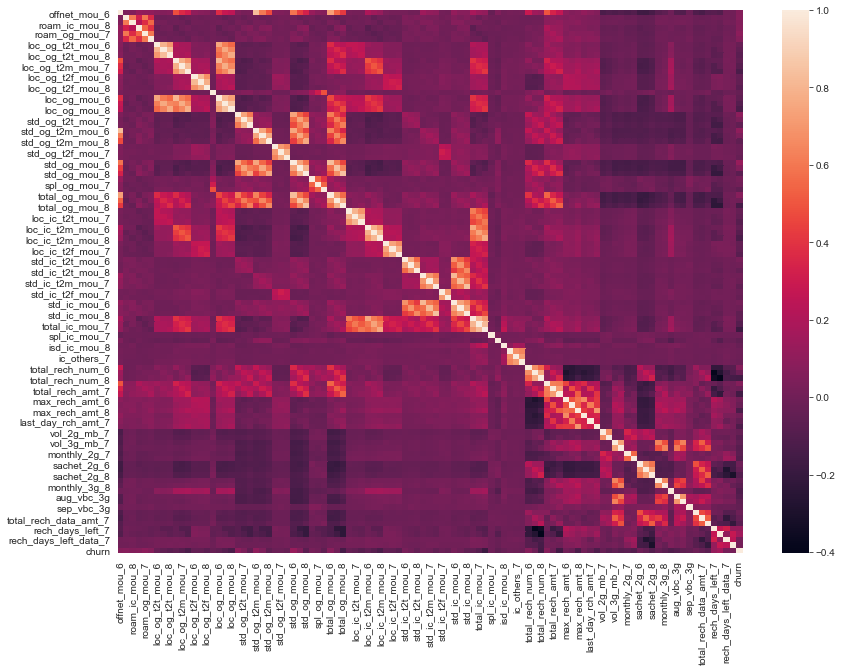

In [83]:
# Visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(hvc_100.corr())
plt.show()

In [84]:
# Observing pairs with high correlation
hvc_100.corr().unstack().sort_values(ascending=False).drop_duplicates().head(20)

churn             churn               1.000000
std_og_mou_8      total_og_mou_8      0.850509
std_og_mou_7      total_og_mou_7      0.849098
std_ic_t2m_mou_8  std_ic_mou_8        0.845717
loc_og_mou_7      loc_og_mou_8        0.841097
std_og_mou_6      total_og_mou_6      0.833454
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.832959
offnet_mou_6      std_og_t2m_mou_6    0.830484
loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.822952
total_ic_mou_8    total_ic_mou_7      0.820529
std_ic_t2m_mou_7  std_ic_mou_7        0.819442
std_ic_t2m_mou_6  std_ic_mou_6        0.814074
loc_ic_t2m_mou_8  loc_ic_t2m_mou_7    0.811339
loc_og_t2f_mou_7  loc_og_t2f_mou_6    0.809065
loc_ic_t2t_mou_8  loc_ic_t2t_mou_7    0.806638
loc_og_mou_7      loc_og_mou_6        0.806321
loc_og_mou_6      loc_og_t2m_mou_6    0.803429
total_ic_mou_7    total_ic_mou_6      0.803042
std_og_t2t_mou_8  std_og_t2t_mou_7    0.802104
loc_ic_t2t_mou_6  loc_ic_t2t_mou_7    0.801663
dtype: float64

### Observations for Correlation Matrix 
Maximum correlation among features is 0.85 in the hvc_100 dataframe. <br>
We should take care of Collinearity while modelling using this data.

## <font color=brown> Data Imbalance Check </font>

In [85]:
# Checking whether data is imbalanced or not
churn  = hvc_100["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 2441
Total Not-Churn Count = 27560
Churn Rate            = 8.14%


### Observations for Data Imbalance Check 
Data is highly imbalanced and hence we need to take of it during modelling.

## <font color=brown> Outlier Analysis </font>

In [86]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
hvc_100.describe(percentiles=[.25,.5,.75,.90,.95,.99])

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count  30001.000000   30001.000000   30001.000000   30001.000000   
mean     377.865524      12.642504      12.500551      26.571547   
std      480.262085      75.785903      74.125281     116.205525   
min        0.000000       0.000000       0.000000       0.000000   
25%       80.710000       0.000000       0.000000       0.000000   
50%      229.635000       0.000000       0.000000       0.000000   
75%      487.940000       0.000000       0.000000       0.000000   
90%      895.830000      14.290000      15.010000      50.430000   
95%     1256.610000      55.640000      56.350000     145.410000   
99%     2326.360000     280.460000     282.190000     530.710000   
max     8362.360000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.949441         86.135734   
std        96.100428     104.719009        228.647866        240.385875   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.240000          5.530000   
50%         0.000000       0.000000         25.580000         25.780000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        190.840000   
95%       104.240000     100.510000        322.740000        324.390000   
99%       438.590000     427.030000       1006.360000       1018.530000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.986541        164.700941        164.472076        154.673714   
std          227.105814        249.393839        240.831704        232.208945   
min            0.000000          0.000000          0.000000          0.000000   
25%            4.360000         21.840000         23.680000         19.090000   
50%           23.240000         80.240000         81.685000         74.540000   
75%           72.040000        208.930000        208.410000        196.960000   
90%          178.840000        419.480000        421.880000        398.510000   
95%          298.780000        604.380000        600.460000        574.760000   
99%          913.330000       1136.960000       1111.480000       1088.310000   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           6.346113          6.427442          5.886385          1.707746   
std           22.122993         21.943100         19.502281          7.208138   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.110000          0.210000          0.000000          0.000000   
75%            4.230000          4.380000          3.930000          0.010000   
90%           16.130000         16.290000         15.160000          4.580000   
95%           30.430000         31.130000         28.390000          9.380000   
99%           87.640000         87.340000         82.240000         28.210000   
max         1466.030000       1196.430000        928.490000        351.830000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
count  30001.000000  30001.000000  30001.000000      30001.000000   
mean     256.430168    257.492080    240.457671        165.946334   
std      377.153512    374.215004    361.050292        403.807140   
min        0.000000      0.000000      0.000000          0.000000  

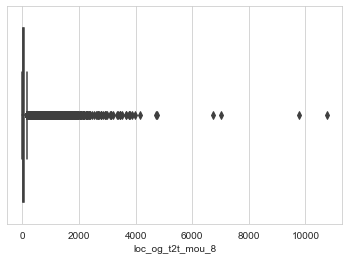

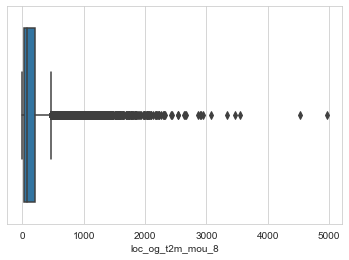

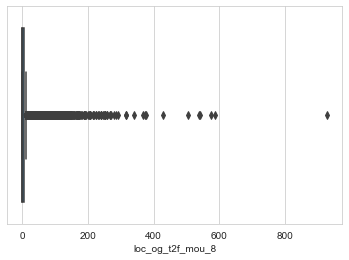

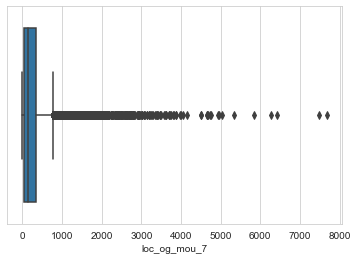

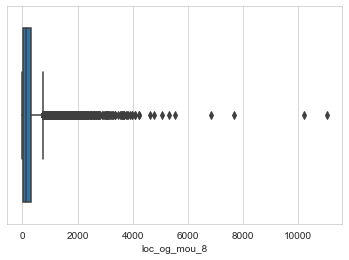

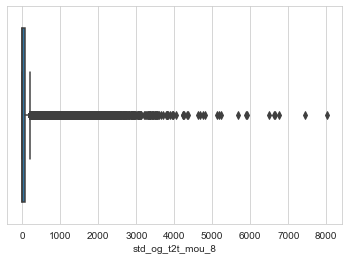

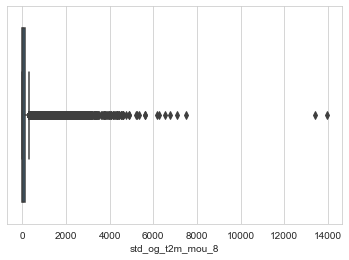

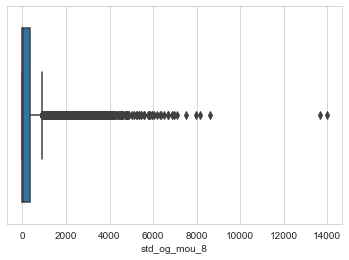

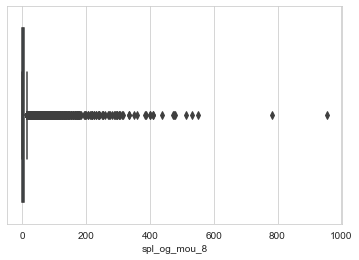

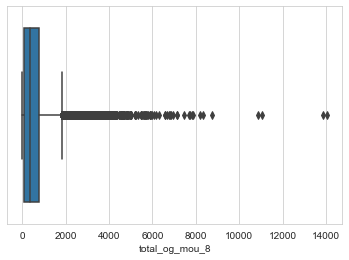

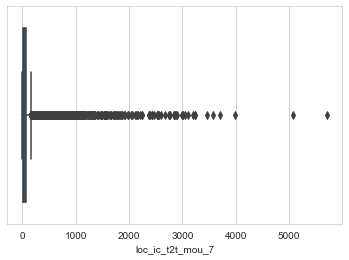

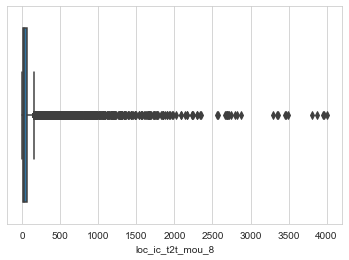

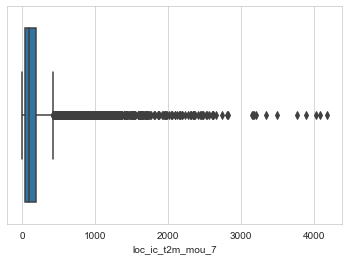

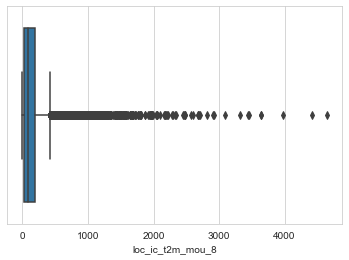

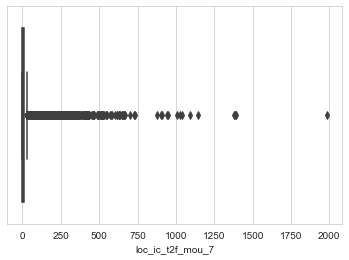

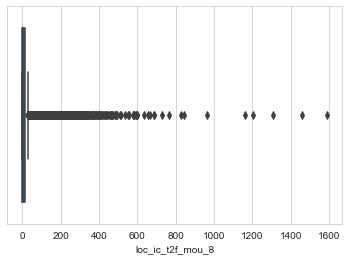

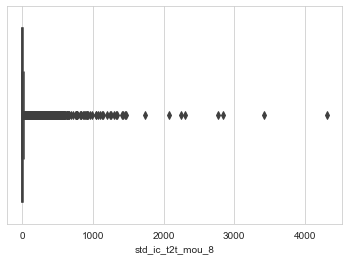

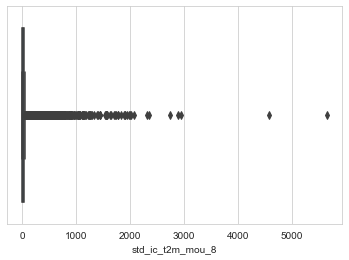

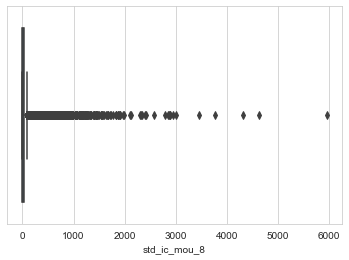

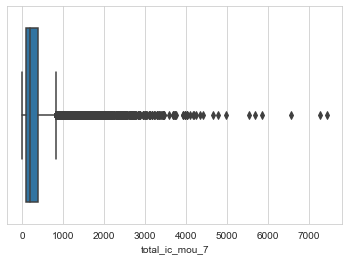

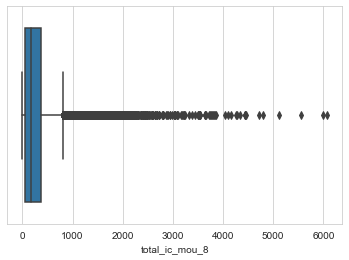

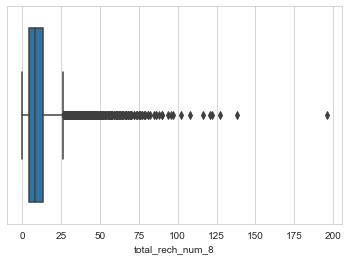

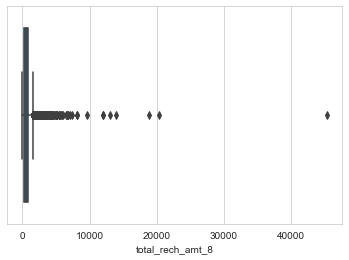

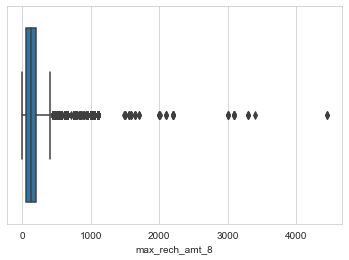

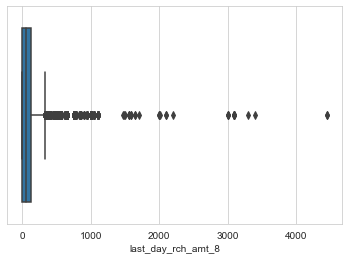

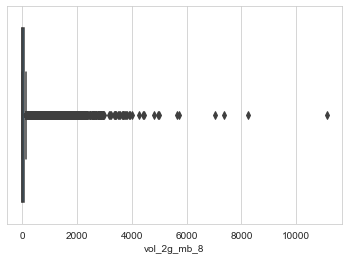

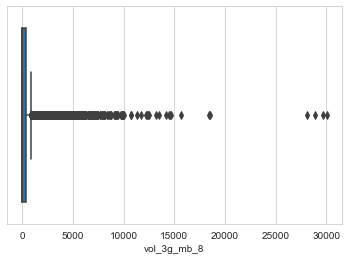

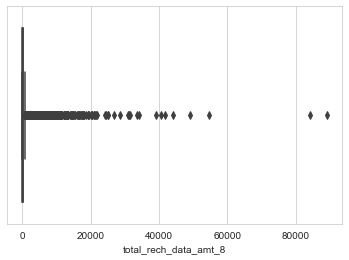

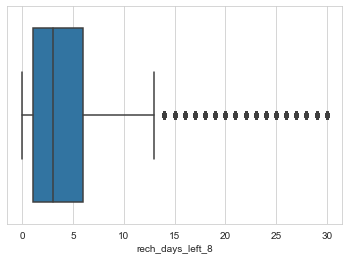

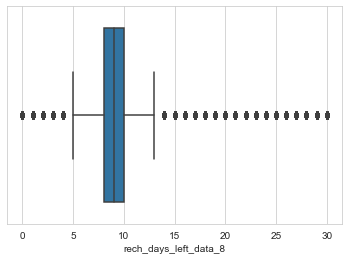

In [87]:
# Boxplot visualisation for Outlier analysis
for col in top_30:
    sns.boxplot(hvc_100[col])
    plt.show()

### Observations from Box Plots
1. Most of the Outliers are present in the revenue based columns.
2. These outliers are genuine outliers and present for a reason.
3. We are going to build model on the usage basis and hence we decide to keep these outliers as it is.

## <font color=brown> Data Modelling </font>

In [88]:
hvc_100.shape

(30001, 101)

#### *Note for all the Models: Data Imbalance is handled during model creation using "Class weight technique for handling Imbalanced datasets"

### <font color=purple> Model 1: Logistic Regression using RFE </font>

#### Create X, y variables

In [89]:
lrm = hvc_100.copy()

In [90]:
lrm.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0        229.635           0.00           0.00           0.00           0.00   
7        453.430          33.49          31.64          23.74          12.59   
8         94.660           0.00           0.00           0.00           0.00   
21       757.930           0.00           0.00           0.00           0.00   
23        85.410           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             25.58             25.78              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              80.24            81.685              0.00              0.11   
7             308.63           447.380            162.28             62.13   
8              80.96            70.580             50.54              0.00   
21             91.81            87.930            104.81              0.75   
23             82.94            83.010            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.21              0.00              0.00        129.35   
7              55.14             53.23              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              1.58              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         50.035          0.00          0.31          0.81          0.00   
7         75.140         77.84          4.50          0.00          6.50   
8        143.480         98.28          0.00          0.00         10.23   
21       934.690        938.79          0.00          0.00          0.00   
23         6.350         39.61          0.10          0.00         17.71   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0             0.00            0.00            0.00             26.03   
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
21          860.34         1028.79         1068.54              2.48   
23    

In [91]:
lrm.shape

(30001, 101)

In [92]:
X = lrm.drop(['churn'],axis=1)
y = lrm['churn']

#### Scaling the Data

In [93]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

#### Spliting the Data 

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)

(21000, 100)
(9001, 100)


#### Feature Selection using RFE 

In [96]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [97]:
X_train

array([[-0.76381553, -0.16682145, -0.16864367, ..., -0.43790998,
         1.06607097, -0.14025518],
       [ 0.89541035,  0.57580925,  0.86381482, ..., -0.82087299,
        -0.17041268, -0.14025518],
       [-0.35003456, -0.16682145, -0.16864367, ..., -0.62939148,
        -0.63409405, -1.39607924],
       ...,
       [ 0.45104141, -0.16682145,  0.04356817, ..., -0.82087299,
        -0.17041268, -0.14025518],
       [-0.13889632, -0.16682145, -0.16864367, ..., -0.43790998,
        -0.17041268, -0.14025518],
       [ 0.73976358,  2.66435913, -0.16864367, ...,  0.51949753,
        -0.17041268, -0.14025518]])

In [98]:
X_train = pd.DataFrame(X_train)

In [99]:
X_train

0         1         2         3         4         5         6  \
0     -0.763816 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707 -0.219072   
1      0.895410  0.575809  0.863815 -0.228664  1.629447  1.637021 -0.162084   
2     -0.350035 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707  0.079515   
3      1.029922 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707 -0.245313   
4     -0.681692 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707 -0.371536   
...         ...       ...       ...       ...       ...       ...       ...   
20995 -0.786803 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707  7.393328   
20996  0.903573 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707 -0.219072   
20997  0.451041 -0.166821  0.043568 -0.212485 -0.209702  0.074146  0.533758   
20998 -0.138896 -0.166821 -0.168644 -0.228664 -0.209702 -0.189707  0.170398   
20999  0.739764  2.664359 -0.168644 -0.040115  1.754318 -0.189707  1.277490   

              7         8         9        10        11        12        13  \
0     -0.084972 -0.245469 -0.616148 -0.639179 -0.345099 -0.286861 -0.166226   
1     -0.132189 -0.189591 -0.310843 -0.329041 -0.336486 -0.286861 -0.292919   
2      0.092745  0.135197 -0.017607 -0.143638 -0.095750  0.743306  0.497320   
3     -0.344684 -0.330145 -0.319544 -0.524201 -0.603620 -0.286861 -0.292919   
4     -0.344975 -0.347802 -0.574566 -0.572534 -0.629029 -0.286861 -0.292919   
...         ...       ...       ...       ...       ...       ...       ...   
20995  1.638952 -0.245469 -0.660416  0.407710 -0.345099 -0.286861 -0.292919   
20996 -0.194506 -0.066034 -0.079277 -0.089409  0.373404 -0.286861 -0.292919   
20997  0.662297  0.317009  0.664338  0.763276  0.330597  0.385754  0.289506   
20998  0.307445  0.633211  0.587270  1.177140  1.628329 -0.286861 -0.280158   
20999  0.314185  0.659851  0.868035  0.058996  0.747642  0.447229  0.398882   

             14        15        16        17        18        19        20  \
0     -0.301836 -0.236923 -0.558191 -0.476878 -0.331255 -0.384884 -0.404320   
1     -0.301836 -0.236923 -0.321758 -0.315070 -0.354465  0.036438 -0.251480   
2      1.098537 -0.173105  0.079040 -0.004896  0.080329 -0.370075 -0.407573   
3     -0.301836 -0.236923 -0.377970 -0.577170 -0.614683  0.329776 -0.142542   
4     -0.301836  0.398480 -0.623152 -0.608436 -0.642159 -0.410961 -0.413841   
...         ...       ...       ...       ...       ...       ...       ...   
20995 -0.301836 -0.236923  4.027498  1.296837 -0.331255 -0.410961 -0.413841   
20996 -0.301836 -0.236923 -0.203210 -0.200856  0.179818 -0.410961 -0.413841   
20997  0.340664 -0.236923  0.784388  0.932469  0.427932  0.004170 -0.069815   
20998 -0.301836 -0.131485  0.473687  0.937439  1.426757 -0.410961 -0.413841   
20999  0.797541 -0.236923  1.373601  0.261987  0.936512 -0.406380 -0.269858   

             21        22        23        24        25        26        27  \
0     -0.369946 -0.439648 -0.430130 -0.355990 -0.150556 -0.140681 -0.144968   
1     -0.216979  1.322991  0.661467 -0.158149 -0.150556 -0.140681 -0.144968   
2     -0.373543 -0.387359 -0.394835 -0.351050 -0.038696 -0.140681 -0.144968   
3     -0.168505  1.476532  2.333233  3.059090 -0.150556 -0.112946 -0.144968   
4     -0.373543 -0.420058 -0.434236 -0.385971 -0.150556 -0.140681 -0.144968   
...         ...       ...       ...       ...       ...       ...       ...   
20995 -0.369946 -0.439648 -0.432598 -0.355990 -0.150556 -0.140681 -0.144968   
20996 -0.345722  1.191339  1.055705  1.075356 -0.150556 -0.140681 -0.144968   
20997 -0.003741 -0.096174 -0.247013 -0.173752  1.148359  0.185974  0.112085   
20998 -0.373543 -0.439648 -0.434236 -0.385971 -0.150556 -0.140681 -0.144968   
20999 -0.350903 -0.024906 -0.225167 -0.009586  9.176421  4.403214 -0.144968   

             28        29        30        31        32        33        34  \
0     -0.555011 -0.561681 -0.453648 -0.331560 -0.326998 -0.291723 -0.801066   
1      0.909889  0.279174 -0.251906 -0.331560 -0.326998 -0.3

In [100]:
X_train.columns = ['offnet_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'rech_days_left_7',
       'rech_days_left_8', 'rech_days_left_data_7', 'rech_days_left_data_8']

In [101]:
X_train

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         -0.763816      -0.166821      -0.168644      -0.228664   
1          0.895410       0.575809       0.863815      -0.228664   
2         -0.350035      -0.166821      -0.168644      -0.228664   
3          1.029922      -0.166821      -0.168644      -0.228664   
4         -0.681692      -0.166821      -0.168644      -0.228664   
...             ...            ...            ...            ...   
20995     -0.786803      -0.166821      -0.168644      -0.228664   
20996      0.903573      -0.166821      -0.168644      -0.228664   
20997      0.451041      -0.166821       0.043568      -0.212485   
20998     -0.138896      -0.166821      -0.168644      -0.228664   
20999      0.739764       2.664359      -0.168644      -0.040115   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0          -0.209702      -0.189707         -0.219072         -0.084972   
1           1.629447       1.637021         -0.162084         -0.132189   
2          -0.209702      -0.189707          0.079515          0.092745   
3          -0.209702      -0.189707         -0.245313         -0.344684   
4          -0.209702      -0.189707         -0.371536         -0.344975   
...              ...            ...               ...               ...   
20995      -0.209702      -0.189707          7.393328          1.638952   
20996      -0.209702      -0.189707         -0.219072         -0.194506   
20997      -0.209702       0.074146          0.533758          0.662297   
20998      -0.209702      -0.189707          0.170398          0.307445   
20999       1.754318      -0.189707          1.277490          0.314185   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             -0.245469         -0.616148         -0.639179         -0.345099   
1             -0.189591         -0.310843         -0.329041         -0.336486   
2              0.135197         -0.017607         -0.143638         -0.095750   
3             -0.330145         -0.319544         -0.524201         -0.603620   
4             -0.347802         -0.574566         -0.572534         -0.629029   
...                 ...               ...               ...               ...   
20995         -0.245469         -0.660416          0.407710         -0.345099   
20996         -0.066034         -0.079277         -0.089409          0.373404   
20997          0.317009          0.664338          0.763276          0.330597   
20998          0.633211          0.587270          1.177140          1.628329   
20999          0.659851          0.868035          0.058996          0.747642   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0             -0.286861         -0.166226         -0.301836         -0.236923   
1             -0.286861         -0.292919         -0.301836         -0.236923   
2              0.743306          0.497320          1.098537         -0.173105   
3             -0.286861         -0.292919         -0.301836         -0.236923   
4             -0.286861         -0.292919         -0.301836          0.398480   
...                 ...               ...               ...               ...   
20995         -0.286861         -0.292919         -0.301836         -0.236923   
20996         -0.286861         -0.292919         -0.301836         -0.236923   
20997          0.385754          0.289506          0.340664         -0.236923   
20998         -0.286861         -0.280158         -0.301836         -0.131485   
20999          0.447229          0.398882          0.797541         -0.236923   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         -0.558191     -0.476878     -0.331255         -0.384884   
1         -0.321758     -0.315070     -0.354465          0.036438   
2          0.079040     -0.004896      0.080329         -0.370075   
3         -0.377970     -0.577170     -0.614683          0.329776  

In [102]:
rfe_features = list(X_train.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g']


In [103]:
X_rfe = X_train [['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g']]

In [104]:
y_rfe = y_train

#### Model Building 

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(class_weight='balanced', random_state=1)

In [106]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

In [107]:
y_pred = lr.predict(X_test_rfe)

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6456 1844]
 [ 117  584]]


In [109]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.7821353182979669


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8300
           1       0.24      0.83      0.37       701

    accuracy                           0.78      9001
   macro avg       0.61      0.81      0.62      9001
weighted avg       0.92      0.78      0.83      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 83% and accuracy is 78%

#### Feature Importance 

In [111]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

loc_ic_t2m_mou_8    2.785901
std_ic_mou_8        2.120110
loc_ic_t2t_mou_8    2.000061
isd_ic_mou_8        1.214886
total_ic_mou_7      0.977660
std_og_mou_8        0.791232
std_og_t2t_mou_8    0.581219
loc_og_mou_8        0.548345
std_og_t2m_mou_8    0.543476
monthly_3g_8       -0.638359
monthly_2g_8       -0.663758
sachet_2g_8        -0.755953
sep_vbc_3g         -0.790799
total_og_mou_8     -2.188904
total_ic_mou_8     -7.006978
dtype: float64

### <font color=purple> Model 2: Decision Tree Classification </font>

#### Create X, y variables

In [112]:
dtm = hvc_100.copy()

In [113]:
dtm.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0        229.635           0.00           0.00           0.00           0.00   
7        453.430          33.49          31.64          23.74          12.59   
8         94.660           0.00           0.00           0.00           0.00   
21       757.930           0.00           0.00           0.00           0.00   
23        85.410           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             25.58             25.78              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              80.24            81.685              0.00              0.11   
7             308.63           447.380            162.28             62.13   
8              80.96            70.580             50.54              0.00   
21             91.81            87.930            104.81              0.75   
23             82.94            83.010            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.21              0.00              0.00        129.35   
7              55.14             53.23              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              1.58              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         50.035          0.00          0.31          0.81          0.00   
7         75.140         77.84          4.50          0.00          6.50   
8        143.480         98.28          0.00          0.00         10.23   
21       934.690        938.79          0.00          0.00          0.00   
23         6.350         39.61          0.10          0.00         17.71   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0             0.00            0.00            0.00             26.03   
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
21          860.34         1028.79         1068.54              2.48   
23    

In [114]:
dtm.shape

(30001, 101)

In [115]:
X = dtm.drop(['churn'],axis=1)
y = dtm['churn']

#### Scaling the Data 

In [116]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

#### Splitting the Data 

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [118]:
print(X_train.shape)
print(X_test.shape)

(21000, 100)
(9001, 100)


#### Model Building 

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dt_base = DecisionTreeClassifier(class_weight = 'balanced', random_state=42, max_depth=4)

In [121]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [122]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8300
           1       0.31      0.82      0.45       701

    accuracy                           0.84      9001
   macro avg       0.65      0.83      0.68      9001
weighted avg       0.93      0.84      0.87      9001



#### Plot the ROC 

In [125]:
from sklearn.metrics import plot_roc_curve

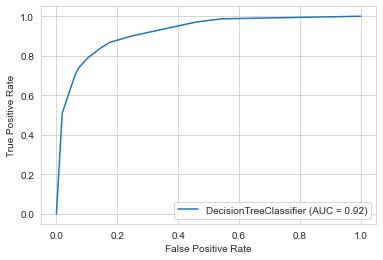

In [126]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)

In [129]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [130]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [131]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.6s finished


CPU times: user 1.49 s, sys: 155 ms, total: 1.65 s
Wall time: 36.9 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [132]:
grid_search.best_score_

0.8442528735632183

In [133]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=42)

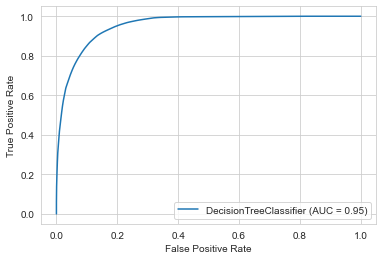

In [134]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

#### Building Model with Best estimator

In [135]:
dt_base = DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=42)

In [136]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=42)

In [137]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8300
           1       0.33      0.85      0.48       701

    accuracy                           0.86      9001
   macro avg       0.66      0.85      0.70      9001
weighted avg       0.93      0.86      0.88      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 85% and accuracy is 86%

#### Finding Important Feature

In [139]:
dt_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.80208346e-04,
       8.98391220e-03, 9.87227593e-02, 0.00000000e+00, 0.00000000e+00,
       1.32112677e-03, 1.52630463e-03, 2.00980394e-03, 0.00000000e+00,
       3.37028969e-03, 3.32801505e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.06219475e-03, 3.57505664e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.72399603e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.86811086e-04,
       1.71891928e-03, 0.00000000e+00, 4.16778281e-05, 3.84095037e-03,
       8.40080488e-04, 3.84265273e-04, 0.00000000e+00, 1.82346119e-03,
       3.31678305e-03, 0.00000000e+00, 0.00000000e+00, 1.43678783e-03,
       1.38651299e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.40848870e-03, 0.00000000e+00, 0.00000000e+00,
      

In [140]:
X_train = pd.DataFrame(X_train)

In [141]:
X_train.columns = ['offnet_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'rech_days_left_7',
       'rech_days_left_8', 'rech_days_left_data_7', 'rech_days_left_data_8']

In [142]:
X_train.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0     -0.763816      -0.166821      -0.168644      -0.228664      -0.209702   
1      0.895410       0.575809       0.863815      -0.228664       1.629447   
2     -0.350035      -0.166821      -0.168644      -0.228664      -0.209702   
3      1.029922      -0.166821      -0.168644      -0.228664      -0.209702   
4     -0.681692      -0.166821      -0.168644      -0.228664      -0.209702   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0      -0.189707         -0.219072         -0.084972         -0.245469   
1       1.637021         -0.162084         -0.132189         -0.189591   
2      -0.189707          0.079515          0.092745          0.135197   
3      -0.189707         -0.245313         -0.344684         -0.330145   
4      -0.189707         -0.371536         -0.344975         -0.347802   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0         -0.616148         -0.639179         -0.345099         -0.286861   
1         -0.310843         -0.329041         -0.336486         -0.286861   
2         -0.017607         -0.143638         -0.095750          0.743306   
3         -0.319544         -0.524201         -0.603620         -0.286861   
4         -0.574566         -0.572534         -0.629029         -0.286861   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.166226         -0.301836         -0.236923     -0.558191   
1         -0.292919         -0.301836         -0.236923     -0.321758   
2          0.497320          1.098537         -0.173105      0.079040   
3         -0.292919         -0.301836         -0.236923     -0.377970   
4         -0.292919         -0.301836          0.398480     -0.623152   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.476878     -0.331255         -0.384884         -0.404320   
1     -0.315070     -0.354465          0.036438         -0.251480   
2     -0.004896      0.080329         -0.370075         -0.407573   
3     -0.577170     -0.614683          0.329776         -0.142542   
4     -0.608436     -0.642159         -0.410961         -0.413841   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.369946         -0.439648         -0.430130         -0.355990   
1         -0.216979          1.322991          0.661467         -0.158149   
2         -0.373543         -0.387359         -0.394835         -0.351050   
3         -0.168505          1.476532          2.333233          3.059090   
4         -0.373543         -0.420058         -0.434236         -0.385971   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0         -0.150556         -0.140681         -0.144968     -0.555011   
1         -0.150556         -0.140681         -0.144968      0.909889   
2         -0.038696         -0.140681         -0.144968     -0.507800   
3         -0.150556         -0.112946         -0.144968      1.207901   
4         -0.150556         -0.140681         -0.144968     -0.559154   

   std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0     -0.561681     -0.453648     -0.331560     -0.326998     -0.291723   
1      0.279174     -0.251906     -0.331560     -0.326998     -0.324230   
2     -0.539876     -0.483893     -0.108960     -0.326998     -0.254784   
3      1.485077      1.942295     -0.104975      2.337407      0.330334   
4     -0.570737     -0.507366      0.372107     -0.063954      1.535540   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0       -0.801066       -0.757837       -0.787588         -0.256114   
1        0.617480        0.076120       -0.405143         -0.308320   
2       -0.405951       -0.492154       -0.380488         -0.234352   
3        0.854894        1.095240        1.385378         -0.304530   
4       -0.799764       -0.826576       -0.720375         

In [143]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

#### Important Features 

In [144]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
59         total_ic_mou_8  0.542557
97       rech_days_left_8  0.106678
5           roam_og_mou_8  0.098723
95  total_rech_data_amt_8  0.069136
77     last_day_rch_amt_8  0.041603
29           std_og_mou_7  0.027240
67       total_rech_num_7  0.027199
99  rech_days_left_data_8  0.014178
4           roam_og_mou_7  0.008984
66       total_rech_num_6  0.006546
62           isd_ic_mou_8  0.004414
58         total_ic_mou_7  0.004044
39       loc_ic_t2t_mou_8  0.003841
81            vol_3g_mb_8  0.003527
12       loc_og_t2f_mou_6  0.003370
44       loc_ic_t2f_mou_7  0.003317
69       total_rech_amt_6  0.002780
78            vol_2g_mb_7  0.002749
71       total_rech_amt_8  0.002595
53       std_ic_t2f_mou_8  0.002408
70       total_rech_amt_7  0.002250
18           loc_og_mou_8  0.002062
10       loc_og_t2m_mou_7  0.002010
57         total_ic_mou_6  0.001971
43       loc_ic_t2f_mou_6  0.001823
36         total_og_mou_8  0.001719
79            vol_2g_mb_8  0.001701
89                    aon  0.001595
9        loc_og_t2m_mou_6  0.001526
47       std_ic_t2t_mou_7  0.001437
8        loc_og_t2t_mou_8  0.001321
98  rech_days_left_data_7  0.000921
80            vol_3g_mb_7  0.000860
40       loc_ic_t2m_mou_6  0.000840
94  total_rech_data_amt_7  0.000452
41       loc_ic_t2m_mou_7  0.000384
19       std_og_t2t_mou_6  0.000358
13       loc_og_t2f_mou_7  0.000333
35         total_og_mou_7  0.000187
3           roam_og_mou_6  0.000180
48       std_ic_t2t_mou_8  0.000139
38       loc_ic_t2t_mou_7  0.000042
65            ic_others_8  0.000000
64            ic_others_7  0.000000
90             aug_vbc_3g  0.000000
93  total_rech_data_amt_6  0.000000
96       rech_days_left_7  0.000000
68       total_rech_num_8  0.000000
92             sep_vbc_3g  0.000000
91             jul_vbc_3g  0.000000
63            ic_others_6  0.000000
72         max_rech_amt_6  0.000000
82           monthly_2g_7  0.000000
88           monthly_3g_8  0.000000
73         max_rech_amt_7  0.000000
74         max_rech_amt_8  0.000000
87           monthly_3g_7  0.000000
86            sachet_2g_8  0.000000
75     last_day_rch_amt_6  0.000000
85            sachet_2g_7  0.000000
84            sachet_2g_6  0.000000
83           monthly_2g_8  0.000000
76     last_day_rch_amt_7  0.000000
0            offnet_mou_6  0.000000
61           spl_ic_mou_8  0.000000
60           spl_ic_mou_7  0.000000
26       std_og_t2f_mou_7  0.000000
25       std_og_t2f_mou_6  0.000000
24       std_og_t2m_mou_8  0.000000
23       std_og_t2m_mou_7  0.000000
22       std_og_t2m_mou_6  0.000000
21       std_og_t2t_mou_8  0.000000
20       std_og_t2t_mou_7  0.000000
17           loc_og_mou_7  0.000000
16           loc_og_mou_6  0.000000
15       loc_og_t2c_mou_8  0.000000
14       loc_og_t2f_mou_8  0.000000
11       loc_og_t2m_mou_8  0.000000
7        loc_og_t2t_mou_7  0.000000
6        loc_og_t2t_mou_6  0.000000
2           roam_ic_mou_8  0.000000
27       std_og_t2f_mou_8  0.000000
28           std_og_mou_6  0.000000
30           std_og_mou_8  0.000000
49       std_ic_t2m_mou_6  0.000000
56           std_ic_mou_8  0.000000
55           std_ic_mou_7  0.000000
54           std_ic_mou_6  0.000000
52       std_ic_t2f_mou_7  0.000000
51       std_ic_t2m_mou_8  0.000000
1           roam_ic_mou_7  0.000000
46       std_ic_t2t_mou_6  0.000000
31           spl_og_mou_6  0.000000
45       loc_ic_t2f_mou_8  0.000000
42       loc_ic_t2m_mou_8  0.000000
37       loc_ic_t2t_mou_6  0.000000
34         total_og_mou_6  0.000000
33           spl_og_mou_8  0.000000
32           spl_og_mou_7  0.000000
50       std_ic_t2m_mou_7  0.000000

### <font color=purple> Model 3: Random Forest Classification </font>

#### Create X, y variables

In [145]:
rfm = hvc_100.copy()

In [146]:
rfm.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0        229.635           0.00           0.00           0.00           0.00   
7        453.430          33.49          31.64          23.74          12.59   
8         94.660           0.00           0.00           0.00           0.00   
21       757.930           0.00           0.00           0.00           0.00   
23        85.410           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             25.58             25.78              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              80.24            81.685              0.00              0.11   
7             308.63           447.380            162.28             62.13   
8              80.96            70.580             50.54              0.00   
21             91.81            87.930            104.81              0.75   
23             82.94            83.010            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.21              0.00              0.00        129.35   
7              55.14             53.23              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              1.58              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         50.035          0.00          0.31          0.81          0.00   
7         75.140         77.84          4.50          0.00          6.50   
8        143.480         98.28          0.00          0.00         10.23   
21       934.690        938.79          0.00          0.00          0.00   
23         6.350         39.61          0.10          0.00         17.71   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0             0.00            0.00            0.00             26.03   
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
21          860.34         1028.79         1068.54              2.48   
23    

In [147]:
rfm.shape

(30001, 101)

In [148]:
X = rfm.drop(['churn'],axis=1)
y = rfm['churn']

#### Scaling the Data

In [149]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

#### Splitting the Data 

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [151]:
print(X_train.shape)
print(X_test.shape)

(21000, 100)
(9001, 100)


#### Model Building 

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf = RandomForestClassifier(class_weight = 'balanced', n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [154]:
%%time
rf.fit(X_train, y_train)

CPU times: user 305 ms, sys: 16.6 ms, total: 321 ms
Wall time: 324 ms


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [155]:
rf.oob_score_

0.8611428571428571

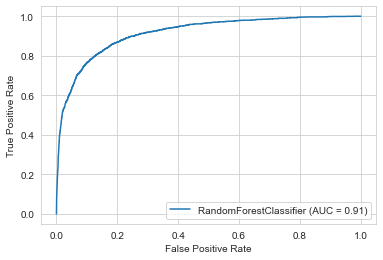

In [156]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyperparameter tuning 

In [157]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)

In [158]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [159]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [160]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.8min finished


CPU times: user 11.9 s, sys: 250 ms, total: 12.2 s
Wall time: 6min 49s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [161]:
grid_search.best_score_

0.7931034482758621

In [162]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_jobs=-1, random_state=42)

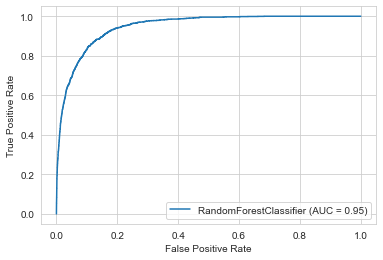

In [163]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### Building model with best estimators

In [164]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_jobs=-1, random_state=42)

In [165]:
%%time
rf.fit(X_train, y_train)

CPU times: user 10.6 s, sys: 51.3 ms, total: 10.7 s
Wall time: 2.93 s


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_jobs=-1, random_state=42)

In [166]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      8300
           1       0.39      0.79      0.52       701

    accuracy                           0.89      9001
   macro avg       0.68      0.84      0.73      9001
weighted avg       0.93      0.89      0.90      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 79% and accuracy is 89%

### <font color=purple> PCA (Principle Component Analysis) </font>

#### Creating X and y variables 

In [168]:
pcat = hvc_100.copy()

In [169]:
pcat.head()

offnet_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0        229.635           0.00           0.00           0.00           0.00   
7        453.430          33.49          31.64          23.74          12.59   
8         94.660           0.00           0.00           0.00           0.00   
21       757.930           0.00           0.00           0.00           0.00   
23        85.410           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             25.58             25.78              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              80.24            81.685              0.00              0.11   
7             308.63           447.380            162.28             62.13   
8              80.96            70.580             50.54              0.00   
21             91.81            87.930            104.81              0.75   
23             82.94            83.010            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.21              0.00              0.00        129.35   
7              55.14             53.23              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              1.58              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         132.73          0.00              3.36              3.30   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00            18.185             17.75              0.00   
7              12.01            49.890             31.76             49.14   
8              22.58            13.690             10.04             75.69   
21             61.79           665.360            808.74            876.99   
23              0.00             2.360              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00        50.795   
7               6.66             20.08             16.68        60.860   
8               0.00              0.00              0.00       130.260   
21              0.00              0.00              0.00       763.290   
23              0.00              0.00              0.00         2.360   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         50.035          0.00          0.31          0.81          0.00   
7         75.140         77.84          4.50          0.00          6.50   
8        143.480         98.28          0.00          0.00         10.23   
21       934.690        938.79          0.00          0.00          0.00   
23         6.350         39.61          0.10          0.00         17.71   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0             0.00            0.00            0.00             26.03   
7           487.53          609.24          350.16             58.14   
8           508.36          431.66          171.56             23.84   
21          860.34         1028.79         1068.54              2.48   
23    

In [170]:
pcat.shape

(30001, 101)

In [171]:
X = pcat.drop(['churn'],axis=1)
y = pcat['churn']

In [172]:
X.shape

(30001, 100)

In [173]:
y.shape

(30001,)

#### Scaling the Data 

In [174]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

#### Splitting the Data 

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [176]:
print(X_train.shape)
print(X_test.shape)

(21000, 100)
(9001, 100)


#### PCA

In [177]:
from sklearn.decomposition import PCA

In [178]:
pca = PCA(random_state=42)

In [179]:
pca.fit(X_train)

PCA(random_state=42)

In [180]:
# Checking PCA components 
pca.components_

array([[ 1.78632471e-01,  1.26889966e-02,  1.99483063e-02, ...,
        -4.21131573e-02,  1.24061863e-02,  1.38607375e-02],
       [ 1.13691645e-01,  1.57772617e-03,  7.29889410e-03, ...,
        -7.25641401e-02, -3.11868557e-02, -2.34677224e-02],
       [-5.77362010e-02,  5.00370953e-02,  5.16175737e-02, ...,
         3.78041112e-02,  1.46895312e-02,  8.30410703e-03],
       ...,
       [ 7.73739490e-07, -9.92399042e-08, -2.19521677e-08, ...,
         1.78626435e-07,  1.26382491e-07,  3.29047218e-08],
       [-1.27636542e-06, -2.14905574e-07,  1.77992640e-07, ...,
        -8.78559132e-08,  4.32607848e-08,  2.68924631e-08],
       [-2.70702987e-07, -1.32717442e-07,  1.26670883e-07, ...,
        -2.46134507e-07,  6.85073364e-09, -3.54577013e-08]])

In [181]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.05309774e-01, 8.81698762e-02, 5.69405675e-02, 5.32441872e-02,
       4.57818815e-02, 3.19623993e-02, 3.06928027e-02, 2.92466724e-02,
       2.68690091e-02, 2.56051396e-02, 2.38511499e-02, 2.26176272e-02,
       2.19793668e-02, 2.09207680e-02, 1.98427755e-02, 1.79776411e-02,
       1.70314107e-02, 1.60579075e-02, 1.46161236e-02, 1.39579138e-02,
       1.23550412e-02, 1.22416534e-02, 1.18546139e-02, 1.13347226e-02,
       1.06460136e-02, 1.01690865e-02, 9.95823895e-03, 9.74130588e-03,
       9.49268483e-03, 9.29093512e-03, 9.03302766e-03, 8.46173984e-03,
       8.12875045e-03, 7.87168608e-03, 7.80096978e-03, 7.61000209e-03,
       7.47517396e-03, 7.11788471e-03, 7.02078753e-03, 6.69675175e-03,
       6.39862067e-03, 5.81613106e-03, 5.48403755e-03, 4.97578171e-03,
       4.85351779e-03, 4.76498414e-03, 4.63286097e-03, 4.40003669e-03,
       4.23277262e-03, 4.09092227e-03, 4.05374442e-03, 3.92302942e-03,
       3.86718922e-03, 3.83726134e-03, 3.70821904e-03, 3.63212937e-03,
      

In [182]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

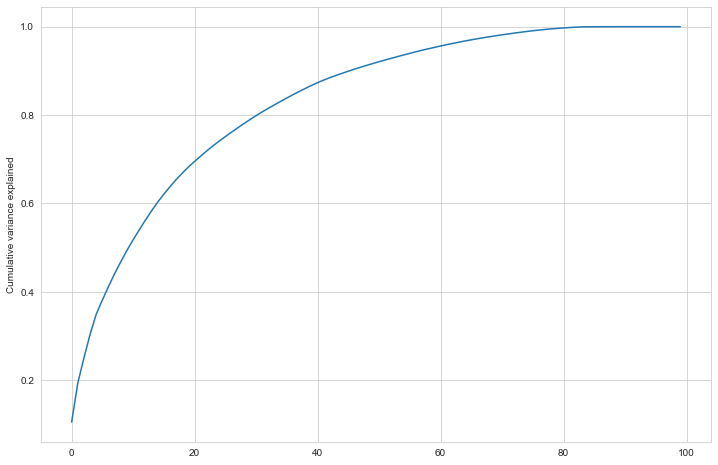

In [183]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Observation from Scree Plot
We can observe that 50 variables explain almost 90% of variance in Dataset.

#### Perform PCA with 50 components

In [184]:
from sklearn.decomposition import IncrementalPCA

In [185]:
pca_final = IncrementalPCA(n_components=50)

In [186]:
df_train_pca = pca_final.fit_transform(X_train)

In [187]:
df_train_pca.shape

(21000, 50)

In [188]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [189]:
corrmat.shape

(50, 50)

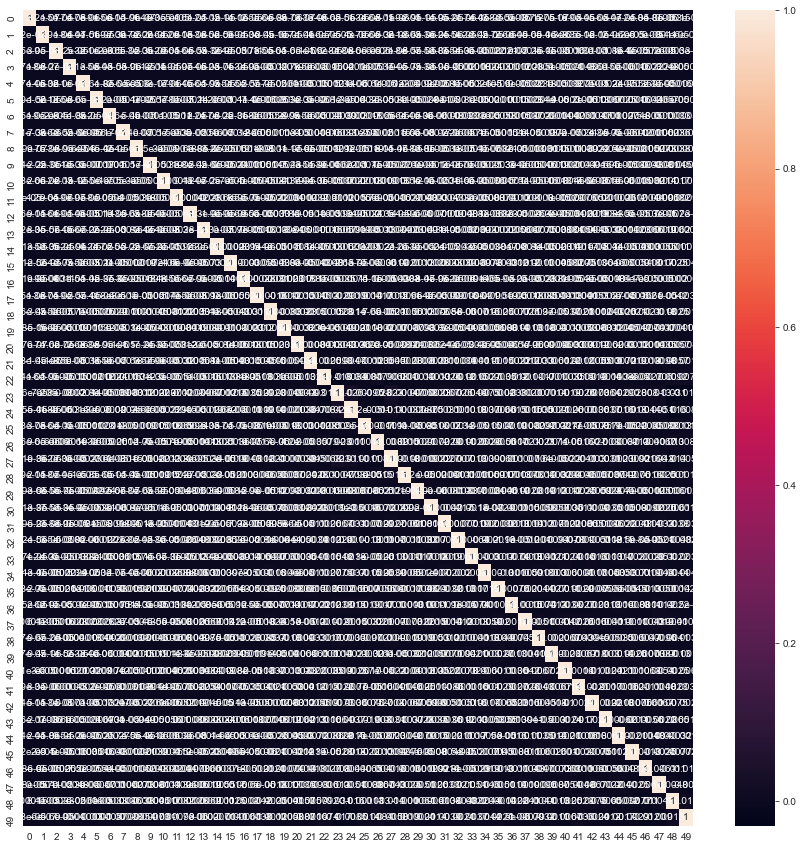

In [190]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Observation
The issue of Multicollinearity is totally resolved using PCA.

In [191]:
# Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 50)

### <font color=purple> Model 4: Logistic Regression using PCA </font>

In [192]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lrpca = LogisticRegression(class_weight='balanced', random_state=1)
lrpca.fit(df_train_pca, y_train)

LogisticRegression(class_weight='balanced', random_state=1)

In [193]:
# Predicted probabilities
y_pred_pca = lrpca.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_pca)

In [194]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_df)
print(confusion_matrix)

[[6746 1554]
 [ 119  582]]


In [195]:
# Checking classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_df))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8300
           1       0.27      0.83      0.41       701

    accuracy                           0.81      9001
   macro avg       0.63      0.82      0.65      9001
weighted avg       0.93      0.81      0.85      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 83% and accuracy is 81%

### <font color=purple> Model 5: Decision Tree Classification using PCA </font>

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
dt_base = DecisionTreeClassifier(class_weight = 'balanced', random_state=42, max_depth=4)

In [198]:
dt_base.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [199]:
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [200]:
from sklearn.metrics import classification_report

In [201]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8300
           1       0.23      0.77      0.35       701

    accuracy                           0.78      9001
   macro avg       0.60      0.77      0.61      9001
weighted avg       0.92      0.78      0.82      9001



#### Plot the ROC

In [202]:
from sklearn.metrics import plot_roc_curve

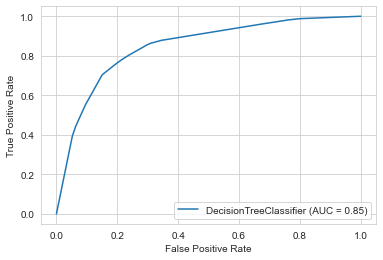

In [203]:
plot_roc_curve(dt_base, df_train_pca, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
dt = DecisionTreeClassifier(class_weight = 'balanced',random_state=42)

In [206]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [207]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [208]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   29.0s finished


CPU times: user 1.01 s, sys: 56.5 ms, total: 1.06 s
Wall time: 29.8 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [209]:
grid_search.best_score_

0.7850574712643679

In [210]:
dt_best=grid_search.best_estimator_

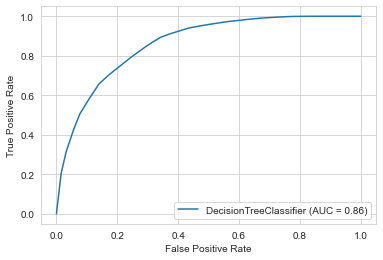

In [211]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

#### Building model with best estimator 

In [212]:
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, random_state=42)

In [213]:
dt_base = DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, random_state=42)

In [214]:
dt_base.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, random_state=42)

In [215]:
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [216]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      8300
           1       0.19      0.82      0.31       701

    accuracy                           0.71      9001
   macro avg       0.58      0.76      0.56      9001
weighted avg       0.92      0.71      0.78      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 82% and accuracy is 71%

### <font color=purple> Model 6: Random Forest Classification using PCA </font>

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
rf = RandomForestClassifier(class_weight = 'balanced', n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [219]:
%%time
rf.fit(df_train_pca, y_train)

CPU times: user 416 ms, sys: 4.16 ms, total: 420 ms
Wall time: 430 ms


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [220]:
rf.oob_score_

0.7692380952380953

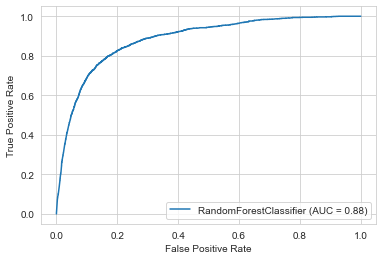

In [221]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

#### Hyperparameter tuning

In [222]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)

In [223]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [224]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [225]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.2min finished


CPU times: user 4.34 s, sys: 239 ms, total: 4.58 s
Wall time: 8min 11s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [226]:
grid_search.best_score_

0.7695402298850575

In [227]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_estimators=25, n_jobs=-1,
                       random_state=42)

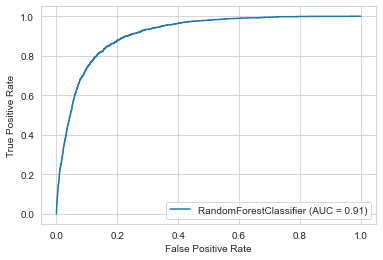

In [228]:
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

#### Building Model with best estimators

In [229]:
best = RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_estimators=25, n_jobs=-1,
                       random_state=42)

In [230]:
%%time
best.fit(df_train_pca, y_train)

CPU times: user 3.11 s, sys: 18.8 ms, total: 3.13 s
Wall time: 948 ms


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_estimators=25, n_jobs=-1,
                       random_state=42)

In [231]:
y_train_pred = best.predict(df_train_pca)
y_test_pred = best.predict(df_test_pca)

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8300
           1       0.30      0.75      0.43       701

    accuracy                           0.84      9001
   macro avg       0.64      0.80      0.67      9001
weighted avg       0.92      0.84      0.87      9001



#### Recall / Sensitivity of the model for predicting churn (1) is 75% and accuracy is 84%

## <font color=brown> Model Summary </font>

Dataset was cleaned and approx 30k samples were filtered and named as High Value Customers (HVC). Later modelling was performed on HVC.<br>

Hyperparameter Tuning with the Scoring parameter as 'Recall' is performed for all the models.<br>

As per Problem Statement, we are expected to build models that would serve two purposes:<br>
1. To identify important variables that are strong predictors of churn.<br>
2. Predict whether a high-value customer will churn or not.<br>

#### Models created for identifying important variables that are strong predictors of churn:
1. Logistic Regression using RFE 
2. Decision Tree Classifier 
3. Random Forest Classifier 

#### Models created for Predict whether a high-value customer will churn or not.:
1. Logistic Regression using PCA
2. Decision Tree Classifier using PCA
3. Random Forest Classifier using PCA


In [233]:
model_summary = {
  "Model_Name": ['Logistic Regression using RFE','Decision Tree Classifier','Random Forest Classifier','Logistic Regression using PCA','Decision Tree Classifier using PCA','Random Forest Classifier using PCA'], 
    "Recall(%)": ['83','85','79','83','82','75'], 
    "Accuracy(%)": ['78','86','89','81','71','84']
}

In [234]:
summary = pd.DataFrame.from_dict(model_summary)

In [235]:
summary

Model_Name Recall(%) Accuracy(%)
0       Logistic Regression using RFE        83          78
1            Decision Tree Classifier        85          86
2            Random Forest Classifier        79          89
3       Logistic Regression using PCA        83          81
4  Decision Tree Classifier using PCA        82          71
5  Random Forest Classifier using PCA        75          84

#### Observations:
1. For solving data imbalance problem, we have used 'class weights' technique to balance the dataset during modelling.
2. In case of telecom churn predictions, it is highly important to predict the fraction of relevant instances that were retrieved and hence we focus on 'Recall'/'Sensitivity' metrices for evaluating the model performance.
3. Out of the six models created, Decision Tree Classifier model performs best out of all other models by giving us Recall of 85%.
4. Random Forest Classifier gives the best accuracy but lower Recall value than Decision Tree Classifier model and hence we do not choose this model as our final model.
5. If company wants to focus on 'Recall'/'Sensitivity', they can use Decision Tree Classifier model and if company wants to focus on 'Accuracy', they can use Random Forest Classifier model.

## <font color=brown> Recommendations </font>

#### Model selected based on best Recall/Sensitivity value: Decision Tree Classifier model

#### Important features that contribute for Decision Tree Classifier model building:<br>
total_ic_mou_8, rech_days_left_8, roam_og_mou_8, total_rech_data_amt_8, last_day_rch_amt_8, 
std_og_mou_7, total_rech_num_7, rech_days_left_data_8, roam_og_mou_7, total_rech_num_6.

#### Suggestions:
1. Monitor Minutes of usage of customers, recency and frequency of recharge, Data pack/services recharge, Total number of recharges done by user. 
If you observe the decrease in any of the above mentioned factors then the customer is most likely to churn. At this point, company can roll out offers to such cutomers and retain them.

2. Company can give discounts/offers to customers on calling services within same network.
3. Provide affordable rates on roaming services so that customers continue to use company's services even when they in roaming zone.
4. Concentrate on customers who have recharged with high amounts but still churned. This might be due to bad user experience or user might be travlling to area where services (for which recharge is done) are not working. We can approach such user to track the issue and try solving it to retain them.
5. If Customers are staying longer with network, we can increase customer loyalty points and offer some special discounts to them.
6. Always keep an eye on competitor's rates and discounts. This will help in planning various strategies for retaining customers. 